# IDS 575 Final Project- Milestone Report (Stock Performance Prediction )
<b>Group 3 - Juhi Anand, Krutika Kulkarni, Parneet Narang, Apoorv Verma </b>


Columns
Date - Trade Data

Symbol - Name of stock

Series - Type of security

Prev Close - Previous data closing price

Open - Opening price for the day

High - Highest price for the day

Low - Lowest price for the day

Last - Last trade price

Closes - Closing price

VWAP - Volume-weighted average price (a ratio of the cumulative share price to the cumulative volume traded over a given time period)

Volume - volume trades for the day

Turnover - The turnover ratio is the ratio of sellers to buyers of a stock

Trades - Number of Trades

Deliverable Volume - Amount of deliverable volume

%Deliverble - Percentage of shares that were delivered

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.dates as mdates

## DATA COLLECTION & INITIAL ANALYSIS
- Concatenate all input .csv files into one.
- 470434 rows , 18 columns
- checked column types
- Checked null values- We identified 'Symbol',' Company Name', 'Industry', and 'ISIN Code' were not populated for all records and were kind of metadata for stocks, so we stored them in a separate data frame, so that if required  we can use them in future

In [ ]:
# Define the path where your CSV files are located
path = "archive"

# Use glob to find all CSV files in the folder
all_files = glob.glob( path + "/*.csv")

# Read each CSV file and concatenate them into a single DataFrame
df = pd.concat((pd.read_csv(file) for file in all_files), ignore_index=True)

# Show the concatenated DataFrame
print(df)

              Date      Symbol Series  Prev Close     Open     High      Low  \
0       2002-02-18      BHARTI     EQ        0.00    51.90    51.90    43.50   
1       2002-02-19      BHARTI     EQ       44.35    45.15    45.15    41.30   
2       2002-02-20      BHARTI     EQ       41.70    40.60    42.80    40.25   
3       2002-02-21      BHARTI     EQ       41.25    42.85    43.40    42.15   
4       2002-02-22      BHARTI     EQ       42.40    42.65    43.60    41.10   
...            ...         ...    ...         ...      ...      ...      ...   
465124  2021-04-26  BAJFINANCE     EQ     4667.80  4690.00  4829.00  4690.00   
465125  2021-04-27  BAJFINANCE     EQ     4736.55  4747.00  4889.85  4746.55   
465126  2021-04-28  BAJFINANCE     EQ     4865.05  4915.00  5310.00  4915.00   
465127  2021-04-29  BAJFINANCE     EQ     5280.90  5350.00  5525.00  5330.00   
465128  2021-04-30  BAJFINANCE     EQ     5484.85  5350.00  5524.65  5327.70   

           Last    Close     VWAP      

/var/folders/_p/grx8h3v96pj51125b7d9j0p80000gn/T/ipykernel_5584/2642799867.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat((pd.read_csv(file) for file in all_files), ignore_index=True)


In [ ]:
#Print the shape of the dataframe
df.shape

(465129, 18)

In [ ]:
#Print the columns
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Company Name', 'Industry', 'ISIN Code'],
      dtype='object')

In [ ]:
#Print data type
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                float64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
Company Name           object
Industry               object
ISIN Code              object
dtype: object

In [ ]:
# Print missing example in each variables
df.isna().sum()

Date                      50
Symbol                     0
Series                     0
Prev Close                50
Open                      50
High                      50
Low                       50
Last                      50
Close                     50
VWAP                      50
Volume                    50
Turnover                  50
Trades                226897
Deliverable Volume     31695
%Deliverble            31695
Company Name          465079
Industry              465079
ISIN Code             465079
dtype: int64

In [ ]:
# Select the list of columns
columns_to_select = ['Symbol','Company Name', 'Industry', 'ISIN Code']

# Filter the DataFrame to include only rows where 'Company Name' is not null and select only the specified columns
company_details_df = df[df['Company Name'].notnull()][columns_to_select]

# Reset the index of the filtered DataFrame without adding the old index as a column
company_details_df.reset_index(inplace=True, drop=True)

# Print Index
company_details_df

Symbol                                  Company Name  \
0   ADANIPORTS    Adani Ports and Special Economic Zone Ltd.   
1   ASIANPAINT                             Asian Paints Ltd.   
2     AXISBANK                                Axis Bank Ltd.   
3   BAJAJ-AUTO                               Bajaj Auto Ltd.   
4   BAJAJFINSV                            Bajaj Finserv Ltd.   
5   BAJFINANCE                            Bajaj Finance Ltd.   
6   BHARTIARTL                            Bharti Airtel Ltd.   
7         BPCL             Bharat Petroleum Corporation Ltd.   
8    BRITANNIA                     Britannia Industries Ltd.   
9        CIPLA                                    Cipla Ltd.   
10   COALINDIA                               Coal India Ltd.   
11     DRREDDY                 Dr. Reddy's Laboratories Ltd.   
12   EICHERMOT                            Eicher Motors Ltd.   
13        GAIL                             GAIL (India) Ltd.   
14      GRASIM                        Grasim Industries Ltd.   
15     HCLTECH                         HCL Technologies Ltd.   
16        HDFC  Housing Development Finance Corporation Ltd.   
17    HDFCBANK                                HDFC Bank Ltd.   
18  HEROMOTOCO                            Hero MotoCorp Ltd.   
19    HINDALCO                      Hindalco Industries Ltd.   
20  HINDUNILVR                       Hindustan Unilever Ltd.   
21   ICICIBANK                               ICICI Bank Ltd.   
22  INDUSINDBK                            IndusInd Bank Ltd.   
23    INFRATEL                          Bharti Infratel Ltd.   
24        INFY                                  Infosys Ltd.   
25         IOC                   Indian Oil Corporation Ltd.   
26         ITC                                      ITC Ltd.   
27    JSWSTEEL                                JSW Steel Ltd.   
28   KOTAKBANK                      Kotak Mahindra Bank Ltd.   
29          LT                          Larsen & Toubro Ltd.   
30         M&M                      Mahindra & Mahindra Ltd.   
31      MARUTI                      Maruti Suzuki India Ltd.   
32   NESTLEIND                             Nestle India Ltd.   
33        NTPC                                     NTPC Ltd.   
34        ONGC            Oil & Natural Gas Corporation Ltd.   
35   POWERGRID          Power Grid Corporation of India Ltd.   
36    RELIANCE                      Reliance Industries Ltd.   
37        SBIN                           State Bank of India   
38    SHREECEM                             Shree Cement Ltd.   
39   SUNPHARMA            Sun Pharmaceutical Industries Ltd.   
40  TATAMOTORS                              Tata Motors Ltd.   
41   TATASTEEL                               Tata Steel Ltd.   
42         TCS                Tata Consultancy Services Ltd.   
43       TECHM                            Tech Mahindra Ltd.   
44       TITAN                            Titan Company Ltd.   
45  ULTRACEMCO                         UltraTech Cement Ltd.   
46         UPL                                      UPL Ltd.   
47        VEDL                                  Vedanta Ltd.   
48       WIPRO                                    Wipro Ltd.   
49        ZEEL            Zee Entertainment Enterprises Ltd.   

                    Industry     ISIN Code  
0                   SERVICES  INE742F01042  
1             CONSUMER GOODS  INE021A01026  
2         FINANCIAL SERVICES  INE238A01034  
3                 AUTOMOBILE  INE917I01010  
4         FINANCIAL SERVICES  INE918I01018  
5         FINANCIAL SERVICES  INE296A01024  
6                    TELECOM  INE397D01024  
7                     ENERGY  INE029A01011  
8             CONSUMER GOODS  INE216A01030  
9                     PHARMA  INE059A01026  
10                    METALS  INE522F01014  
11                    PHARMA  INE089A01023  
12                AUTOMOBILE  INE066A01013  
13                    ENERGY  INE129A01019  
14  CEMENT & CEMENT PRODUCTS  INE047A01021  
15                     

In [ ]:
# Show the count and shape of rows with null values in the 'Company Name' column
df['Company Name'].isnull().sum()
df.shape

(465129, 18)

# DATA PREPROCESSING - CLEANING
### Dropping Duplicates
### Renaming stocks whose names changed over time
### Missing Values
- Date: Drop all rows with null values

- Calculate %Deliverable only where both Deliverable Volume and Volume are present : If both Volume and Deliverable Volume are present, the formula (clean_df['Deliverable Volume'] / clean_df['Volume']) * 100 calculates the percentage of the Deliverable Volume relative to the Volume

- Then fill all null values for Trades, Deliverable Volume, %Deliverble: Used 3-NN Imputer with label encoding (as KNN works better with numerical data) to handle missing values for these columns.

### Transforming Data Types
 - apart from label encoding on Symbol and Series column which we did with KNN Imputation we also transformed date column from object to Datetime datatype

## Dropping Duplicates

In [ ]:
# Print the shape of the dataset before dropping duplicates
print(f"Shape before dropping duplicates: {df.shape}")

# Drop duplicate rows while keeping the first occurrence
df = df.drop_duplicates()

# Print the shape of the dataset after dropping duplicates
print(f"Shape after dropping duplicates: {df.shape}")

#Create a new df for cleaning for easier code execution
clean_df =df.copy()

Shape before dropping duplicates: (465129, 18)
Shape after dropping duplicates: (257010, 18)


### Renaming stocks that got renamed overtime

In [ ]:
# Get the unique stock symbols from the 'Symbol' column in 'clean_df'
stocks = clean_df["Symbol"].unique()

# Print lists of unique Stock Symbol
print(stocks)

# Print number of unique Stock Symbol
print("Unique stock values: ", len(stocks))

# Count the occurrences of each unique stock symbol in the 'Symbol' column
unique_counts = clean_df["Symbol"].value_counts()

# Print for to 60 stocks
unique_counts.head(60)
print(unique_counts)

['BHARTI' 'BHARTIARTL' 'TISCO' 'TATASTEEL' 'TITAN' 'M&M' 'COALINDIA'
 'JSWSTL' 'JSWSTEEL' 'NESTLEIND' 'ICICIBANK' 'MARUTI' 'ULTRACEMCO' 'WIPRO'
 'MUNDRAPORT' 'ADANIPORTS' 'ASIANPAINT' 'UTIBANK' 'AXISBANK' 'BAJAJ-AUTO'
 'BAJAJFINSV' 'BAJAUTOFIN' 'BAJFINANCE' 'BPCL' 'BRITANNIA' 'CIPLA'
 'DRREDDY' 'EICHERMOT' 'GAIL' 'GRASIM' 'HCLTECH' 'HDFC' 'HDFCBANK'
 'HEROHONDA' 'HEROMOTOCO' 'HINDALC0' 'HINDALCO' 'HINDLEVER' 'HINDUNILVR'
 'INDUSINDBK' 'INFOSYSTCH' 'INFY' 'IOC' 'ITC' 'KOTAKMAH' 'KOTAKBANK' 'LT'
 'NTPC' 'ONGC' 'POWERGRID' 'RELIANCE' 'SBIN' 'SHREECEM' 'SUNPHARMA'
 'TELCO' 'TATAMOTORS' 'TCS' 'TECHM' 'UNIPHOS' 'UPL' 'SESAGOA' 'SSLT'
 'VEDL' 'ZEETELE' 'ZEEL' 'INFRATEL']
Unique stock values:  66
Symbol
ICICIBANK    5966
SBIN         5945
RELIANCE     5945
TITAN        5931
IOC          5882
             ... 
TELCO        1061
KOTAKMAH      572
SSLT          431
JSWSTL        134
INFRATEL        1
Name: count, Length: 66, dtype: int64


In [ ]:
# Dictionary to map old stock names to current names
replace_lists = {
    'BHARTI': 'BHARTIARTL',
    'TISCO': 'TATASTEEL',
    'JSWSTL':'JSWSTEEL',
    'UTIBANK': 'AXISBANK',
    'HEROHONDA': 'HEROMOTOCO',
    'HINDLEVER': 'HINDUNILVR',
    'INFOSYSTCH': 'INFY',
    'MUNDRAPORT': 'ADANIPORTS',
    'TELCO': 'TATAMOTORS',
    'SESAGOA': 'VEDL',
    'SSLT': 'VEDL',
    'KOTAKMAH': 'KOTAKBANK',
    'UNIPHOS': 'UPL',
    'HINDALC0': 'HINDALCO',
    'ZEETELE': 'ZEEL',
    'BAJAUTOFIN': 'BAJFINANCE'
}

# Replace old stock names with current names in 'clean_df'
clean_df['Symbol'] = clean_df['Symbol'].replace(replace_lists)

# Display the DataFrame to confirm replacements
print("DataFrame after replacing old stock names:")
print(clean_df.head())

# Recalculate and display the counts for the top 60 most common stock symbols after replacements
unique_counts = clean_df["Symbol"].value_counts()
unique_counts.head(60)


DataFrame after replacing old stock names:
         Date      Symbol Series  Prev Close   Open   High    Low   Last  \
0  2002-02-18  BHARTIARTL     EQ        0.00  51.90  51.90  43.50  44.70   
1  2002-02-19  BHARTIARTL     EQ       44.35  45.15  45.15  41.30  41.35   
2  2002-02-20  BHARTIARTL     EQ       41.70  40.60  42.80  40.25  41.20   
3  2002-02-21  BHARTIARTL     EQ       41.25  42.85  43.40  42.15  42.20   
4  2002-02-22  BHARTIARTL     EQ       42.40  42.65  43.60  41.10  43.35   

   Close   VWAP      Volume      Turnover  Trades  Deliverable Volume  \
0  44.35  46.00  10381190.0  4.775431e+13     NaN           6503775.0   
1  41.70  42.58   3552660.0  1.512609e+13     NaN           1741184.0   
2  41.25  41.56   2512964.0  1.044348e+13     NaN                 NaN   
3  42.40  42.76   1338196.0  5.722681e+12     NaN            485969.0   
4  43.30  42.75    811327.0  3.468413e+12     NaN            399133.0   

   %Deliverble Company Name Industry ISIN Code  
0       0.62

Symbol
ICICIBANK     5966
VEDL          5956
TATAMOTORS    5952
SBIN          5945
RELIANCE      5945
AXISBANK      5932
TITAN         5931
HINDALCO      5902
TATASTEEL     5886
IOC           5882
EICHERMOT     5872
BPCL          5866
INFY          5823
ZEEL          5800
GRASIM        5795
ASIANPAINT    5795
BAJFINANCE    5789
HEROMOTOCO    5774
ONGC          5766
SUNPHARMA     5759
WIPRO         5752
DRREDDY       5748
CIPLA         5739
HCLTECH       5739
M&M           5733
ITC           5710
HDFC          5637
HINDUNILVR    5618
HDFCBANK      5604
INDUSINDBK    5515
KOTAKBANK     5509
GAIL          5405
SHREECEM      5395
BRITANNIA     5306
BHARTIARTL    5234
MARUTI        4955
LT            4764
UPL           4642
TCS           4534
ULTRACEMCO    4414
NTPC          4368
JSWSTEEL      4362
TECHM         3972
ADANIPORTS    3677
POWERGRID     3596
BAJAJFINSV    3511
BAJAJ-AUTO    3471
NESTLEIND     2969
COALINDIA     2794
INFRATEL         1
Name: count, dtype: int64

In [ ]:
unique_counts.count()

50

### Consider only that data for the dates which have values for all the stocks

In [ ]:
# Convert the 'Date' column to datetime format if it's not already
clean_df['Date'] = pd.to_datetime(clean_df['Date'], errors='coerce')  # This also handles any parsing errors

# Check if the conversion introduced any NaT values which indicate parsing errors
if clean_df['Date'].isnull().any():
    print("Warning: Some dates couldn't be parsed and are set to Null")

# Now, grouping by 'Symbol' and getting the min and max dates safely
grouped = clean_df.groupby('Symbol')['Date'].agg(['min', 'max'])

# Find the latest start date (max of the minimum dates) and earliest end date (min of the maximum dates) across all symbols
latest_start = grouped['min'].max()
earliest_end = grouped['max'].min()

print(f"Latest start date where all stocks have data: {latest_start}")
print(f"Earliest end date where all stocks have data: {earliest_end}")

# Filter the DataFrame to include only data within the date range
clean_df = clean_df[(clean_df['Date'] >= latest_start) & (clean_df['Date'] <= earliest_end)]

print("Filtered data summary:")
print(clean_df.describe())
print(f"Data range from {clean_df['Date'].min()} to {clean_df['Date'].max()}")
print(clean_df.shape)



Latest start date where all stocks have data: 2010-11-04 00:00:00
Earliest end date where all stocks have data: 2021-04-30 00:00:00
Filtered data summary:
                                Date     Prev Close           Open  \
count                         139449  139449.000000  139449.000000   
mean   2016-02-11 09:46:03.720069888    1746.510091    1748.482262   
min              2010-11-04 00:00:00      60.000000      59.400000   
25%              2013-06-19 00:00:00     332.400000     332.800000   
50%              2016-02-16 00:00:00     703.850000     704.750000   
75%              2018-10-08 00:00:00    1739.750000    1741.000000   
max              2021-04-30 00:00:00   32861.950000   33399.950000   
std                              NaN    3356.188906    3361.611422   

                High            Low           Last          Close  \
count  139449.000000  139449.000000  139449.000000  139449.000000   
mean     1771.685647    1723.644641    1746.889966    1747.136768   
min    

### Missing Values

In [ ]:
#Drop all rows where date is null
clean_df.dropna(subset=['Date'],inplace=True)

# Reset the index after dropping rows to maintain a continuous index without gaps
clean_df.reset_index(drop=True, inplace=True)

#Drop company details colums as all rows are nulls
cols_to_drop =['Company Name','Industry','ISIN Code']

# Drop the specified columns from 'clean_df' as they contain all null values
clean_df.drop(columns=cols_to_drop, inplace= True)

# Print the count of null values in each column to check for any remaining missing data
clean_df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                7607
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [ ]:
# Filter the DataFrame to display rows where 'Trades' are less than 100
clean_df[clean_df['Trades'] < 100]

Date      Symbol Series  Prev Close     Open     High      Low  \
15919  2012-03-03   NESTLEIND     EQ     4419.85  4442.90  4442.90  4396.00   
23751  2012-04-28  ULTRACEMCO     EQ     1418.80  1433.15  1433.15  1403.00   
31468  2012-01-07  ASIANPAINT     EQ     2660.60  2688.00  2688.00  2660.00   
41850  2011-12-26  BAJFINANCE     EQ      631.55   630.10   639.90   630.10   
41899  2012-03-03  BAJFINANCE     EQ      781.65   780.05   783.80   776.80   
41937  2012-04-28  BAJFINANCE     EQ      863.25   846.25   866.85   846.25   
42030  2012-09-08  BAJFINANCE     EQ     1070.55  1070.00  1075.00  1057.00   
42412  2014-03-22  BAJFINANCE     EQ     1673.30  1680.00  1689.00  1680.00   
47294  2012-01-07   BRITANNIA     EQ      443.15   443.05   445.95   443.00   
47371  2012-04-28   BRITANNIA     EQ      560.45   565.00   566.00   558.00   
47629  2013-05-11   BRITANNIA     EQ      571.10   574.80   574.80   568.10   
55174  2011-07-28   EICHERMOT     EQ     1314.85  1310.15  1325.00  1310.00   
55283  2012-01-07   EICHERMOT     EQ     1493.70  1507.90  1507.90  1490.00   
55322  2012-03-03   EICHERMOT     EQ     1696.55  1726.15  1726.15  1685.50   
55453  2012-09-08   EICHERMOT     EQ     2083.00  2065.00  2084.95  2065.00   
55618  2013-05-11   EICHERMOT     EQ     3064.90  3065.00  3074.80  3027.00   
108420 2011-06-06    SHREECEM     EQ     1795.55  1782.25  1799.85  1780.05   
108423 2011-06-09    SHREECEM     EQ     1768.45  1761.05  1775.00  1751.15   
108424 2011-06-10    SHREECEM     EQ     1767.05  1766.50  1779.75  1762.00   
108457 2011-07-27    SHREECEM     EQ     1794.95  1801.00  1801.00  1761.05   
108467 2011-08-10    SHREECEM     EQ     1723.40  1712.60  1738.70  1700.00   
108518 2011-10-26    SHREECEM     EQ     1871.40  1820.00  1900.00  1820.00   
108539 2011-11-29    SHREECEM     EQ     2050.40  2050.00  2050.00  2016.00   
108567 2012-01-07    SHREECEM     EQ     2135.30  2085.00  2148.00  2075.00   
108568 2012-01-09    SHREECEM     EQ     2085.80  2133.75  2133.75  2076.50   
108570 2012-01-11    SHREECEM     EQ     2080.60  2099.95  2100.00  2057.65   
108571 2012-01-12    SHREECEM     EQ     2066.55  2068.60  2094.75  2050.00   
108572 2012-01-13    SHREECEM     EQ     2070.80  2097.95  2098.00  2050.00   
108573 2012-01-16    SHREECEM     EQ     2075.95  2057.60  2084.95  2051.20   
108606 2012-03-03    SHREECEM     EQ     2799.75  2795.00  2795.00  2773.50   
108634 2012-04-16    SHREECEM     EQ     2876.85  2850.00  2903.80  2835.50   
108644 2012-04-28    SHREECEM     EQ     2779.20  2852.00  2852.00  2773.00   
108646 2012-05-02    SHREECEM     EQ     2834.00  2850.00  2850.00  2805.00   
108702 2012-07-19    SHREECEM     EQ     2925.75  2929.65  2954.85  2920.05   
108705 2012-07-24    SHREECEM     EQ     2890.35  2878.45  2903.00  2875.00   
108721 2012-08-16    SHREECEM     EQ     3219.15  3244.95  3244.95  3200.00   
108737 2012-09-08    SHREECEM     EQ     3406.00  3410.00  3410.00  3370.15   
108902 2013-05-11    SHREECEM     EQ     4600.65  4639.90  4639.95  4580.00   
109023 2013-11-03    SHREECEM     EQ     4400.30  4396.00  4450.00  4396.00   
109119 2014-03-22    SHREECEM     EQ     5084.10  5134.25  5148.95  5111.05   
121953 2012-04-28  ULTRACEMCO     EQ     1418.80  1433.15  1433.15  1403.00   
133494 2011-07-28   EICHERMOT     EQ     1314.85  1310.15  1325.00  1310.00   
138176 2011-11-29    SHREECEM     EQ     2050.40  2050.00  2050.00  2016.00   
138181 2012-05-02    SHREECEM     EQ     2834.00  2850.00  2850.00  2805.00   
138202 2013-11-03    SHREECEM     EQ     4400.30  4396.00  4450.00  4396.00   

           Last    Close     VWAP   Volume      Turnover  Trades  \
15919   4400.00  4403.20  4402.49    442.0  1.945898e+11    63.0   
23751   1410.05  1410.35  1410.73   1626.0  2.293841e+11    97.0   
31468   2669.95  2662.80  2662.66    624.0  1.661499e+11    70.0   
41850    630.60   633.35   633.92    872.0  5.527756e+10    69.0   
41899    776.80   778.30   780.47    5

In [ ]:
# Filter the DataFrame to display rows where 'Deliverable Volume' is null
clean_df[clean_df['Deliverable Volume'].isna()]

Empty DataFrame
Columns: [Date, Symbol, Series, Prev Close, Open, High, Low, Last, Close, VWAP, Volume, Turnover, Trades, Deliverable Volume, %Deliverble]
Index: []

In [ ]:
# Calculate %Deliverable only where both Deliverable Volume and Volume are present
clean_df['%Deliverble'] = np.where(clean_df['Volume'].notna() & clean_df['Deliverable Volume'].notna(),
                              (clean_df['Deliverable Volume'] / clean_df['Volume']) * 100,
                              np.nan)

In [ ]:
# Print the count of null values in each column to check for any remaining missing data
clean_df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                7607
Deliverable Volume       0
%Deliverble              0
dtype: int64

### Using KNN to fill missing values for columns 'Trades', 'Deliverable Volume', '%Deliverble'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Label encode the 'Symbol' and 'Series' columns
le_symbol = LabelEncoder()
le_series = LabelEncoder()

# Add encoded columns
clean_df['Symbol_encoded'] = le_symbol.fit_transform(clean_df['Symbol'])
clean_df['Series_encoded'] = le_series.fit_transform(clean_df['Series'])

# Select columns for KNN imputation, including numeric features and encoded categorical variables
#cols_to_impute = ['Trades']
#features_for_imputation = ['Volume', 'Turnover', 'VWAP', 'High', 'Low', 'Close', 'Symbol_encoded', 'Series_encoded','Deliverable Volume', '%Deliverble'] + cols_to_impute
cols_to_impute = ['Trades','Deliverable Volume', '%Deliverble']
features_for_imputation = ['Volume', 'Turnover', 'VWAP', 'High', 'Low', 'Close', 'Symbol_encoded', 'Series_encoded'] + cols_to_impute

df_impute = clean_df[features_for_imputation].copy()

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(df_impute)

# Convert imputed array back to DataFrame
df_imputed = pd.DataFrame(imputed_array, columns=df_impute.columns)

# Replace the imputed values back into the original DataFrame
clean_df[cols_to_impute] = df_imputed[cols_to_impute]

# Display the DataFrame with imputed values
clean_df[['Trades', 'Deliverable Volume', '%Deliverble', 'Symbol_encoded', 'Series_encoded']].head()

Trades  Deliverable Volume  %Deliverble  Symbol_encoded  Series_encoded
0  32186.4           1997206.0    69.641715               6               0
1   8088.2            415053.0    74.061854               6               0
2  58635.2           4119914.0    75.519621               6               0
3  45695.0           3848442.0    61.455308               6               0
4  88037.8           3471393.0    33.974625               6               0

In [ ]:
# Print the count of null values in each column to check for any remaining missing data
clean_df.isna().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Symbol_encoded        0
Series_encoded        0
dtype: int64

In [ ]:
# Print top 20 stocks
clean_df.shape

(139449, 17)

In [ ]:
# Save the DataFrame to a CSV file
clean_df.to_csv('knn_imputed_data_new_logic.csv')

In [ ]:
# Reload the DataFrame from the CSV file
clean_df = pd.read_csv('knn_imputed_data_new_logic.csv',index_col=0)

In [ ]:
# Print the shape
clean_df.shape

(139449, 17)

### drop unwanted columns

In [ ]:
# Drop the 'Series_encoded' column, as it is unnecessary and was generated during KNN imputation
clean_df= clean_df.drop(columns=['Series_encoded']) #Drop Unecessary Columns generated in KNN Imputation

In [ ]:
# Load the dataset
data = clean_df.copy()

In [ ]:
# Print top stocks
data.head()

Date      Symbol Series  Prev Close   Open   High     Low    Last  \
0  2010-11-04  BHARTIARTL     EQ      328.40  330.2  331.8  325.25  327.50   
1  2010-11-05  BHARTIARTL     EQ      326.15  330.0  331.0  328.55  329.25   
2  2010-11-08  BHARTIARTL     EQ      329.50  331.0  334.7  327.50  328.80   
3  2010-11-09  BHARTIARTL     EQ      328.05  330.5  335.5  329.30  333.80   
4  2010-11-10  BHARTIARTL     EQ      334.55  335.0  345.6  325.55  327.00   

    Close    VWAP      Volume      Turnover   Trades  Deliverable Volume  \
0  326.15  326.87   2867830.0  9.374047e+13  32186.4           1997206.0   
1  329.50  329.64    560414.0  1.847327e+13   8088.2            415053.0   
2  328.05  329.50   5455422.0  1.797549e+14  58635.2           4119914.0   
3  334.55  332.89   6262180.0  2.084622e+14  45695.0           3848442.0   
4  327.05  332.78  10217605.0  3.400251e+14  88037.8           3471393.0   

   %Deliverble  Symbol_encoded  
0    69.641715               6  
1    74.061854               6  
2    75.519621               6  
3    61.455308               6  
4    33.974625               6

In [ ]:
data.shape

(139449, 16)

## Feature Creation

### Target Variable Distribution

Explanation:
Future_Close: Calculated by shifting the Close prices forward by a defined time horizon = 10 trading days, which gives the predicted future closing price of the stock at that future date.

Price_Change_%: Determined by comparing the Future_Close with the current Close price and calculating the percentage change. This shows how much the stock price will increase or decrease over the specified time horizon.

Price_Movement: Categorized based on the Price_Change_% using predetermined thresholds. If the change exceeds +4%, it's labeled 'High' for significant gains; if it falls below -3%, it's labeled 'Low' for significant losses; changes between these values are labeled 'Medium' for moderate or no significant change.

In [ ]:
data.isna().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Symbol_encoded        0
dtype: int64

In [ ]:
print("Initial Columns in Dataset:")
print(data.columns)

# Define the time horizon for prediction (e.g., 10 trading days)
time_horizon = 10

# Calculate the future close price and percentage change
data['Future_Close'] = data['Close'].shift(-time_horizon)
data['Price_Change_%'] = ((data['Future_Close'] - data['Close']) / data['Close']) * 100

# Define bins based on percentage change thresholds
def categorize_change(change):
    if change < -3:       # Significant loss
        return 'Low'
    elif -3 <= change <= 4:  # Moderate/no change
        return 'Medium'
    elif change > 4:      # Significant gain
        return 'High'

# Apply the categorization function to create the price_movement variable
data['Price_Movement'] = data['Price_Change_%'].apply(categorize_change)

# Drop rows where the price_movement cannot be calculated (e.g., NaN from shifting)
data = data.dropna(subset=['Price_Movement'])
data.sort_values('Date', inplace=True)
data.reset_index(inplace=True, drop=True)

#remove britania stocks data for future testing
britannia_df = data[data['Symbol'] == 'BRITANNIA']

#remmove above from actual ds
data = data[data['Symbol'] != 'BRITANNIA']


# Check the distribution of price_movement variable
print("Class Distribution Before Balancing:")
print(data['Price_Movement'].value_counts())

# Balance the dataset using stratified sampling directly within the same DataFrame
min_samples = data['Price_Movement'].value_counts().min()  # Minimum class count
data = (
    data.groupby('Price_Movement')
    .apply(lambda x: x.sample(n=min_samples, random_state=42))
    .reset_index(drop=True)
)

# Check the balanced class distribution
print("\nClass Distribution After Balancing:")
print(data['Price_Movement'].value_counts())

# Display the first few rows of the balanced dataset
print("\nBalanced Dataset Sample:")
print(data.head())
print(data.shape)

Initial Columns in Dataset:
Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Symbol_encoded'],
      dtype='object')
Class Distribution Before Balancing:
Price_Movement
Medium    63343
High      37901
Low       35597
Name: count, dtype: int64

Class Distribution After Balancing:
Price_Movement
High      35597
Low       35597
Medium    35597
Name: count, dtype: int64

Balanced Dataset Sample:
         Date      Symbol Series  Prev Close    Open    High    Low   Last  \
0  2018-10-23    AXISBANK     EQ      562.05  557.00  571.40  553.5  566.3   
1  2020-12-24         UPL     EQ      451.95  454.90  456.60  448.0  449.3   
2  2011-03-24        ONGC     EQ      272.65  273.75  274.15  272.0  273.0   
3  2016-05-17  ADANIPORTS     EQ      185.80  186.60  187.35  182.7  182.8   
4  2014-03-25    RELIANCE     EQ      905.40  879.00  882.50  872.5  877.8   

    

/var/folders/_p/grx8h3v96pj51125b7d9j0p80000gn/T/ipykernel_5584/2464458470.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_samples, random_state=42))


In [ ]:
# Print the dataframe to check for target variable (class)
data.head()

Date      Symbol Series  Prev Close    Open    High    Low   Last  \
0  2018-10-23    AXISBANK     EQ      562.05  557.00  571.40  553.5  566.3   
1  2020-12-24         UPL     EQ      451.95  454.90  456.60  448.0  449.3   
2  2011-03-24        ONGC     EQ      272.65  273.75  274.15  272.0  273.0   
3  2016-05-17  ADANIPORTS     EQ      185.80  186.60  187.35  182.7  182.8   
4  2014-03-25    RELIANCE     EQ      905.40  879.00  882.50  872.5  877.8   

    Close    VWAP     Volume      Turnover    Trades  Deliverable Volume  \
0  562.75  562.48  9513054.0  5.350868e+14  150834.0           5018676.0   
1  449.40  452.19  4384445.0  1.982586e+14   51884.0            972491.0   
2  272.95  273.09  2325097.0  6.349649e+13   29617.4           1925727.0   
3  183.25  184.45  7208437.0  1.329615e+14   63213.0           4982441.0   
4  879.30  878.62  7154556.0  6.286122e+14   92718.0           4258172.0   

   %Deliverble  Symbol_encoded  Future_Close  Price_Change_% Price_Movement  
0    52.755677               2        607.45        7.943136           High  
1    22.180481              45        503.65       12.071651           High  
2    82.823512              33        291.60        6.832753           High  
3    69.119575               0        192.15        4.856753           High  
4    59.516929              35        962.15        9.422268           High

In [ ]:
# Print the variable types to check for target variable (class)
data.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                float64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
Symbol_encoded          int64
Future_Close          float64
Price_Change_%        float64
Price_Movement         object
dtype: object

## Correlation Heatmap


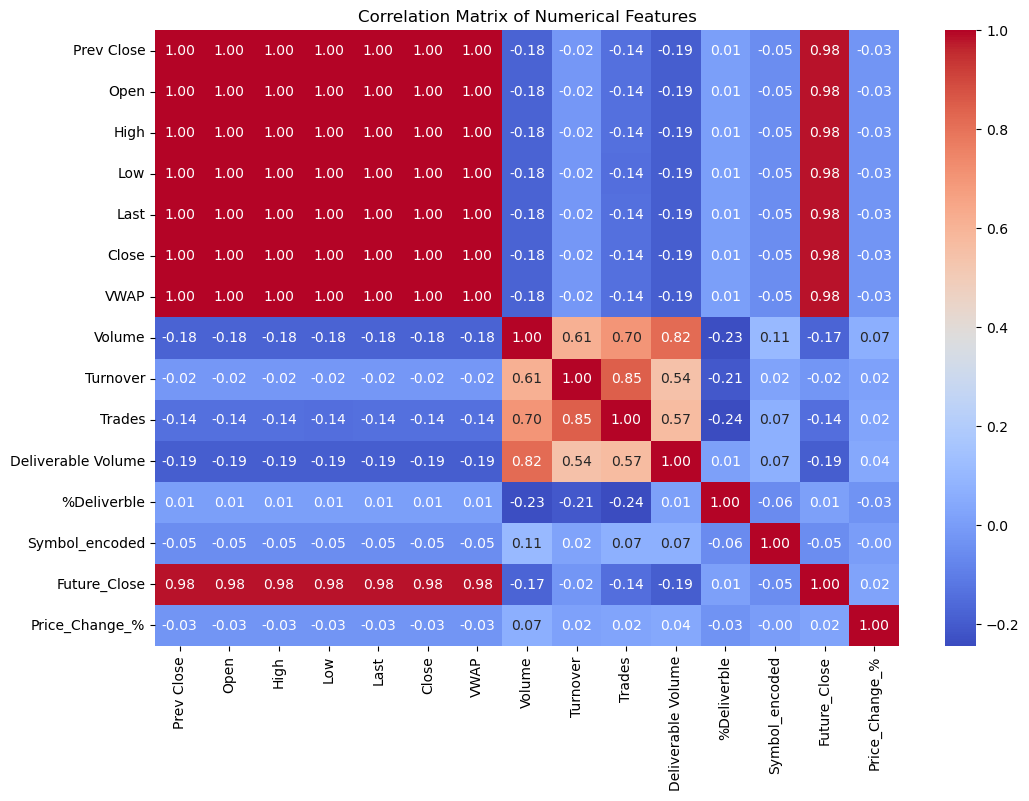

In [ ]:
# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix of numerical columns in the DataFrame
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Plot the heatmap (with annotations, a color map, and formatted to 2 decimal places)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Boxplot of Close Prices by Target

/var/folders/_p/grx8h3v96pj51125b7d9j0p80000gn/T/ipykernel_5584/2188626040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Price_Movement', y='Close', palette='Set2')


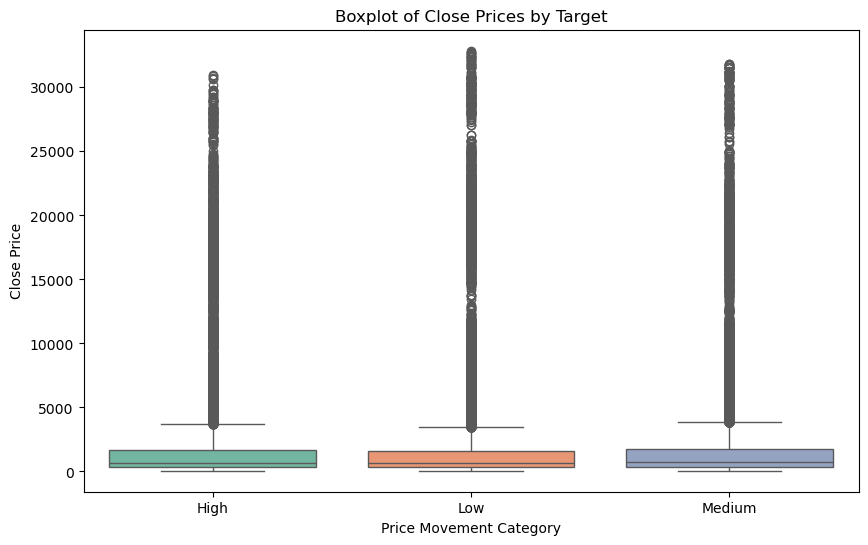

In [ ]:
# Plot a boxplot showing the distribution of 'Close' prices by target categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Price_Movement', y='Close', palette='Set2')
plt.title("Boxplot of Close Prices by Target")
plt.xlabel("Price Movement Category")
plt.ylabel("Close Price")
plt.show()

In [ ]:
# Calculate IQR (Interquartile Range)
Q1 = data['Close'].quantile(0.25)  # First quartile
Q3 = data['Close'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = data[(data['Close'] < lower_bound) | (data['Close'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])

# Group by 'Symbol' and count the number of outliers for each stock
outliers_per_stock = outliers.groupby('Symbol').size()

# Display the number of outliers for each stock
print(outliers_per_stock)


Number of outliers: 9935
Symbol
ASIANPAINT     248
BAJAJ-AUTO      42
BAJAJFINSV     931
BAJFINANCE     579
DRREDDY        315
EICHERMOT     1539
GRASIM         184
HEROMOTOCO     108
INFY            66
MARUTI        1293
NESTLEIND     1976
SHREECEM      1709
TITAN           66
ULTRACEMCO     879
dtype: int64


In [ ]:
# Calculate percentage change compared to the previous 'Close' price
outliers['Percent_Change'] = ((outliers['Close'] - outliers['Prev Close']) / outliers['Prev Close']) * 100

# Display the outliers with the calculated percentage change
print(outliers[['Symbol', 'Date', 'Close', 'Prev Close', 'Percent_Change']])


            Symbol        Date     Close  Prev Close  Percent_Change
5        NESTLEIND  2013-01-23   4503.10     4700.75       -4.204648
18       EICHERMOT  2014-02-26   5012.60     4916.15        1.961901
38      BAJAJFINSV  2020-10-23   5831.55     5873.40       -0.712534
59      ULTRACEMCO  2020-11-06   4556.00     4617.90       -1.340436
71       EICHERMOT  2014-11-03  12739.60    12772.75       -0.259537
...            ...         ...       ...         ...             ...
106739  BAJAJFINSV  2020-08-21   6282.40     6289.45       -0.112092
106754      MARUTI  2017-07-26   7565.25     7504.85        0.804813
106760  HEROMOTOCO  2017-07-03   3776.10     3701.35        2.019533
106766  BAJAJFINSV  2021-02-22  10000.60    10250.45       -2.437454
106768   EICHERMOT  2018-04-25  30746.95    31136.75       -1.251897

[9935 rows x 5 columns]


/var/folders/_p/grx8h3v96pj51125b7d9j0p80000gn/T/ipykernel_5584/1227310161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Percent_Change'] = ((outliers['Close'] - outliers['Prev Close']) / outliers['Prev Close']) * 100


## Volume Distribution

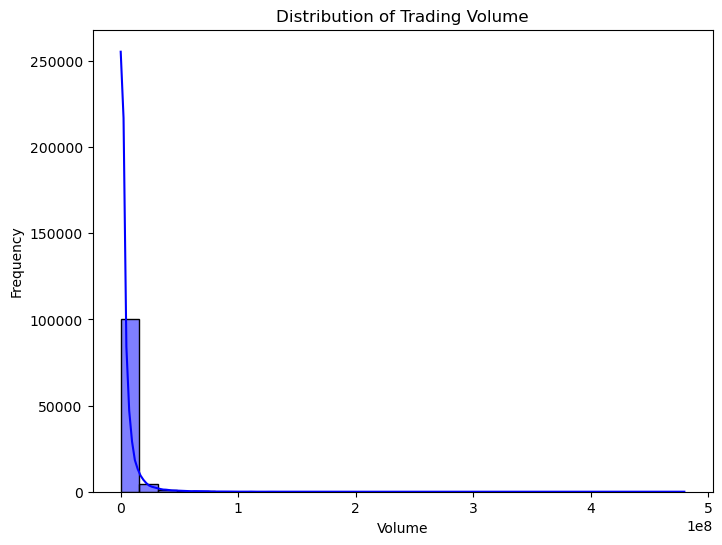

In [ ]:
# Plot a histogram showing the distribution of trading volume
plt.figure(figsize=(8, 6))
sns.histplot(data['Volume'], kde=True, bins=30, color='blue')
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

## Pairplot of Key Features

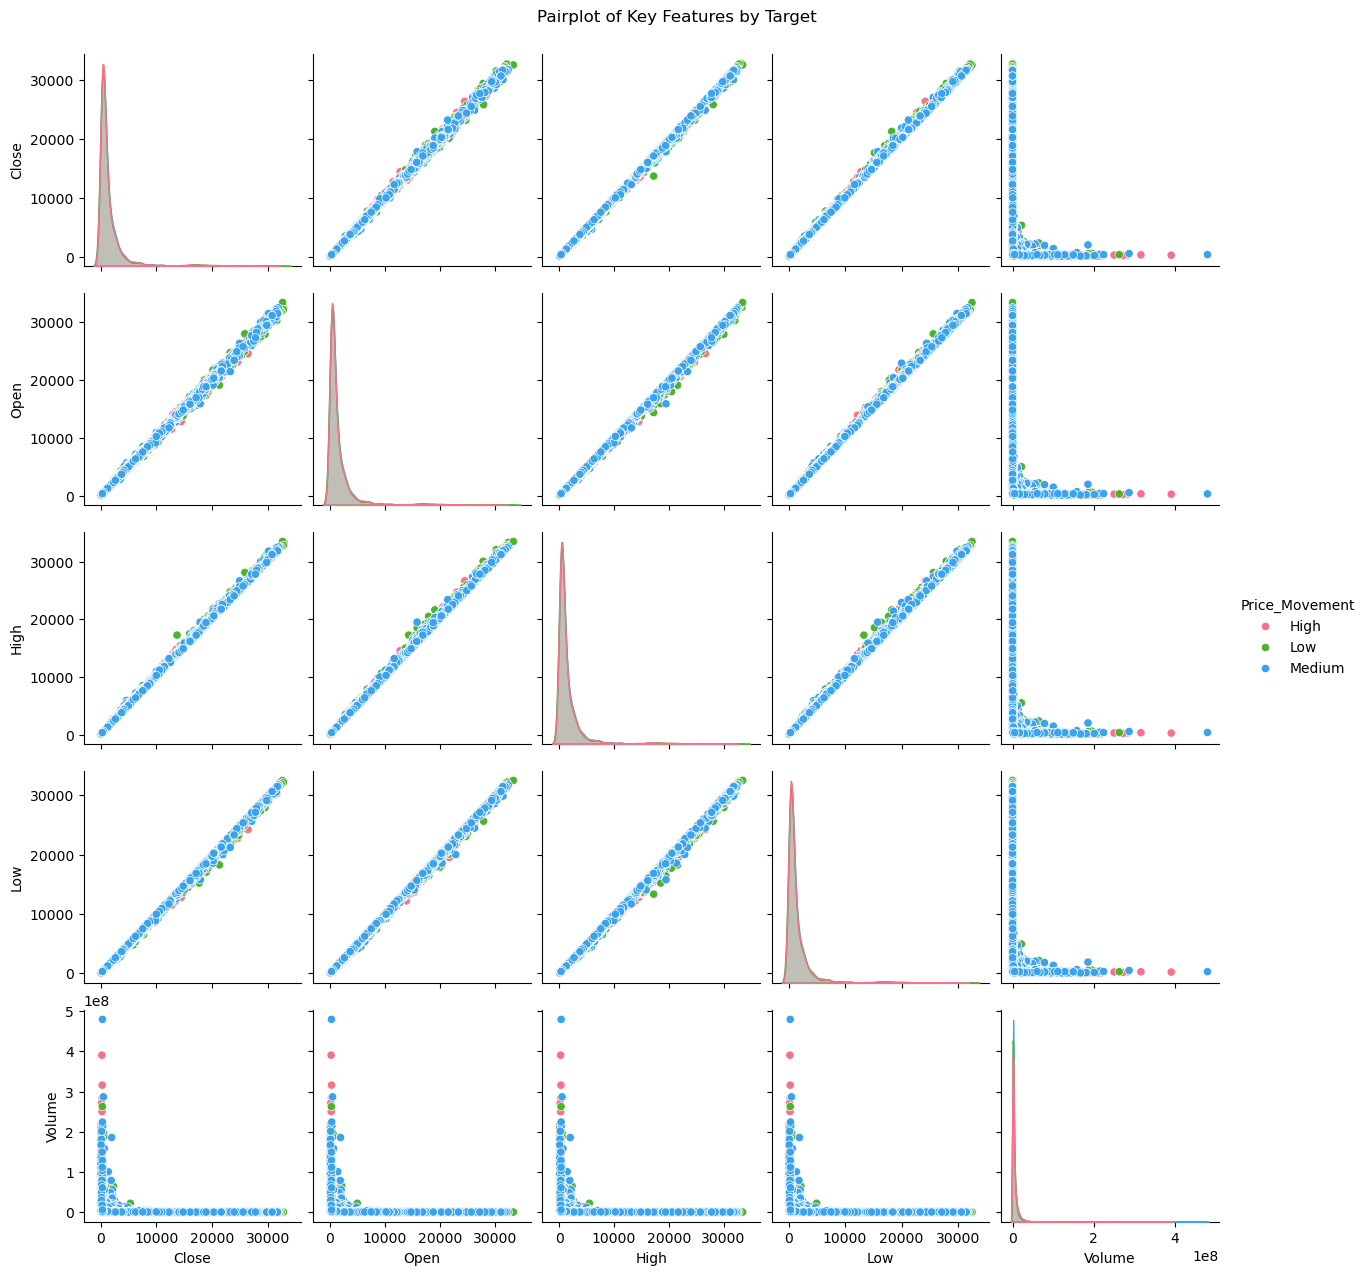

In [ ]:
# Plot pairwise relationships between selected key features, colored by target category
sns.pairplot(data[['Close', 'Open', 'High', 'Low', 'Volume', 'Price_Movement']], hue='Price_Movement', palette='husl')
plt.suptitle("Pairplot of Key Features by Target", y=1.02)
plt.show()

## Volume vs. Close Prices

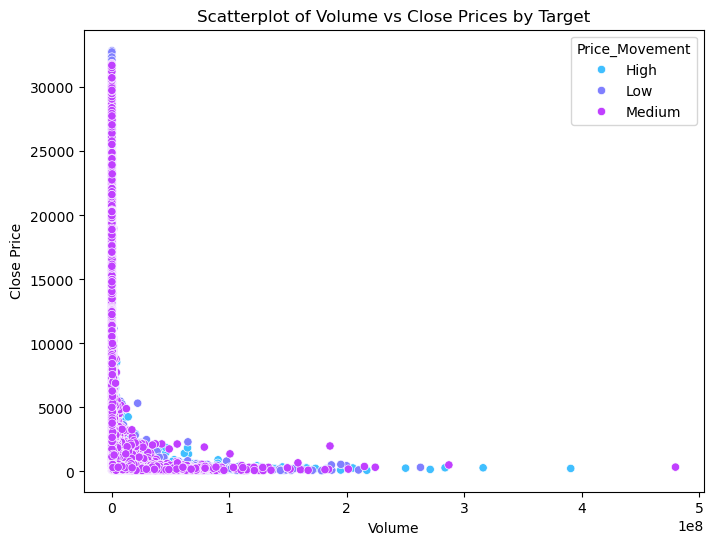

In [ ]:
# Plot a scatterplot of 'Volume' vs 'Close' prices, colored by target category
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Volume', y='Close', hue='Price_Movement', palette='cool')
plt.title("Scatterplot of Volume vs Close Prices by Target")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()


## Filter for Top-Performing Stocks
Grouping by Symbol:

The logic now groups the data by Symbol to calculate the cumulative price_change for each stock.
Aggregation:

agg() is used to calculate: sum of price_change (to measure cumulative change). last of Close (to display the latest closing price for each stock).

Sorting and Selection: Stocks are sorted by cumulative price_change in descending order. The top 20 stocks are selected using .head(20).


In [ ]:
# Aggregate target classifications for each stock
overall_performance = (
    data.groupby('Symbol', as_index=False)
    .agg({
        'Price_Movement': lambda x: x.value_counts().to_dict(),  # Count occurrences of each category
        'Price_Change_%': 'sum',  # Total cumulative price change
        'Close': 'last'         # Most recent closing price
    })
)

# Extract the most frequent target for each stock
def get_dominant_target(target_counts):
    if 'High' in target_counts and target_counts.get('High', 0) > max(target_counts.get('Medium', 0), target_counts.get('Low', 0)):
        return 'High'
    elif 'Low' in target_counts and target_counts.get('Low', 0) > max(target_counts.get('Medium', 0), target_counts.get('High', 0)):
        return 'Low'
    else:
        return 'Medium'

overall_performance['dominant_target'] = overall_performance['Price_Movement'].apply(get_dominant_target)

# Separate high-performing and low-performing stocks
high_performing_stocks = overall_performance[overall_performance['dominant_target'] == 'High'].sort_values(by='Price_Change_%', ascending=False).head(5)
low_performing_stocks = overall_performance[overall_performance['dominant_target'] == 'Low'].sort_values(by='Price_Change_%', ascending=True).head(5)

# Reset index for clean display
high_performing_stocks.reset_index(drop=True, inplace=True)
low_performing_stocks.reset_index(drop=True, inplace=True)

# Print results
print("High Performing Stocks (Overall):")
print(high_performing_stocks[['Symbol', 'dominant_target', 'Price_Change_%', 'Close']])

print("\nLow Performing Stocks (Overall):")
print(low_performing_stocks[['Symbol', 'dominant_target', 'Price_Change_%', 'Close']])


High Performing Stocks (Overall):
       Symbol dominant_target  Price_Change_%    Close
0    JSWSTEEL            High     6613.672879   925.05
1  BAJFINANCE            High     6336.127470  1148.10
2  ADANIPORTS            High     5554.496194   410.25
3  INDUSINDBK            High     5331.251646  1096.15
4       TECHM            High     5232.667805   690.65

Low Performing Stocks (Overall):
       Symbol dominant_target  Price_Change_%    Close
0          LT             Low    -1475.002544  1172.40
1  HEROMOTOCO             Low     -484.599160  3776.10
2        ONGC             Low     -415.747538   324.85
3      GRASIM             Low     -173.211984  2718.10
4   ICICIBANK             Low     1409.134535   297.70


In [ ]:
# Show entire overall_performance DataFrame
overall_performance

Symbol                             Price_Movement  Price_Change_%  \
0   ADANIPORTS   {'High': 850, 'Low': 802, 'Medium': 664}     5554.496194   
1   ASIANPAINT   {'Medium': 850, 'High': 775, 'Low': 557}     1252.024964   
2     AXISBANK   {'High': 866, 'Low': 844, 'Medium': 719}     2489.577125   
3   BAJAJ-AUTO   {'Medium': 833, 'High': 672, 'Low': 662}      -63.147918   
4   BAJAJFINSV   {'High': 884, 'Medium': 735, 'Low': 657}     4924.335844   
5   BAJFINANCE  {'High': 1058, 'Low': 622, 'Medium': 614}     6336.127470   
6   BHARTIARTL   {'Low': 802, 'High': 719, 'Medium': 711}     1711.371007   
7         BPCL   {'Low': 862, 'High': 826, 'Medium': 691}     3375.580750   
8        CIPLA   {'Medium': 883, 'Low': 644, 'High': 627}     2229.854036   
9    COALINDIA   {'Low': 867, 'Medium': 753, 'High': 560}    19283.404506   
10     DRREDDY   {'Medium': 808, 'High': 680, 'Low': 660}      578.185072   
11   EICHERMOT   {'High': 920, 'Low': 731, 'Medium': 649}     3582.114757   
12        GAIL   {'Low': 830, 'Medium': 745, 'High': 603}    14653.145653   
13      GRASIM   {'Low': 764, 'Medium': 750, 'High': 729}     -173.211984   
14     HCLTECH   {'Medium': 789, 'High': 708, 'Low': 546}     1824.785053   
15        HDFC   {'Medium': 837, 'High': 638, 'Low': 599}     1585.126144   
16    HDFCBANK   {'Medium': 962, 'High': 546, 'Low': 460}      950.760491   
17  HEROMOTOCO   {'Low': 817, 'High': 738, 'Medium': 702}     -484.599160   
18    HINDALCO  {'Low': 1034, 'High': 882, 'Medium': 575}     2699.403822   
19  HINDUNILVR   {'Medium': 924, 'High': 593, 'Low': 483}     3335.141702   
20   ICICIBANK   {'Low': 861, 'High': 793, 'Medium': 732}     1409.134535   
21  INDUSINDBK   {'High': 805, 'Medium': 747, 'Low': 688}     5331.251646   
22        INFY   {'Medium': 794, 'High': 659, 'Low': 636}     -904.592488   
23         IOC   {'Low': 928, 'Medium': 689, 'High': 667}    15445.815985   
24         ITC   {'Medium': 846, 'Low': 657, 'High': 572}     5029.736722   
25    JSWSTEEL   {'High': 917, 'Low': 814, 'Medium': 587}     6613.672879   
26   KOTAKBANK   {'Medium': 798, 'High': 755, 'Low': 609}     2433.817878   
27          LT   {'Low': 904, 'High': 726, 'Medium': 711}    -1475.002544   
28         M&M   {'Medium': 748, 'Low': 736, 'High': 675}      809.889488   
29      MARUTI   {'High': 842, 'Medium': 752, 'Low': 718}     1884.477279   
30   NESTLEIND   {'Medium': 857, 'High': 635, 'Low': 537}     1006.420175   
31        NTPC   {'Medium': 816, 'Low': 751, 'High': 497}    13032.778308   
32        ONGC   {'Low': 890, 'Medium': 731, 'High': 566}     -415.747538   
33   POWERGRID   {'Medium': 953, 'Low': 518, 'High': 505}     5168.972259   
34    RELIANCE   {'Medium': 746, 'High': 744, 'Low': 738}     2898.732755   
35        SBIN  {'Low': 1022, 'High': 779, 'Medium': 609}     3574.946667   
36    SHREECEM   {'High': 836, 'Medium': 680, 'Low': 640}     3946.550991   
37   SUNPHARMA   {'Medium': 770, 'Low': 740, 'High': 723}      385.153163   
38  TATAMOTORS  {'Low': 1075, 'High': 912, 'Medium': 546}     6426.070863   
39   TATASTEEL  {'Low': 1000, 'High': 867, 'Medium': 539}     4603.176365   
40         TCS   {'Medium': 815, 'High': 716, 'Low': 620}      752.658098   
41       TECHM   {'High': 838, 'Medium': 758, 'Low': 631}     5232.667805   
42       TITAN   {'High': 891, 'Medium': 732, 'Low': 720}     1546.692144   
43  ULTRACEMCO   {'Medium': 756, 'High': 720, 'Low': 653}     1648.876266   
44         UPL   {'High': 860, 'Low': 792, 'Medium': 640}     2405.820041   
45        VEDL  {'Low': 1042, 'High': 868, 'Medium': 524}    14637.587909   
46       WIPRO   {'Medium': 836, 'Low': 657, 'High': 583}     -702.793916   
47        ZEEL   {'Low': 777, 'High': 772, 'Medium': 691}     5818.134059   

       Close dominant_target  
0     410.25            High  
1    1113.55          Medium  
2     397.00            High  
3    2664.15          Medium  
4   10000.60            High  
5    1148.10            High  
6     337.55     

### Volatility Ananlysis

In [ ]:
# Calculate standard deviation of price changes for each stock
volatility = data.groupby('Symbol')['Price_Change_%'].std().reset_index()
volatility.columns = ['Symbol', 'Volatility']

# Sort by volatility
most_volatile_stocks = volatility.sort_values(by='Volatility', ascending=False).head(5)
least_volatile_stocks = volatility.sort_values(by='Volatility', ascending=True).head(5)

# Print most and least volatile Stocks
print("Most Volatile Stocks:")
print(most_volatile_stocks)

print("\nLeast Volatile Stocks:")
print(least_volatile_stocks)

Most Volatile Stocks:
       Symbol  Volatility
12       GAIL  113.500245
23        IOC  108.644406
9   COALINDIA  101.086318
31       NTPC   85.581067
45       VEDL   85.166588

Least Volatile Stocks:
        Symbol  Volatility
6   BHARTIARTL    8.602296
19  HINDUNILVR    9.156524
15        HDFC    9.354336
29      MARUTI   10.766980
34    RELIANCE   10.794617


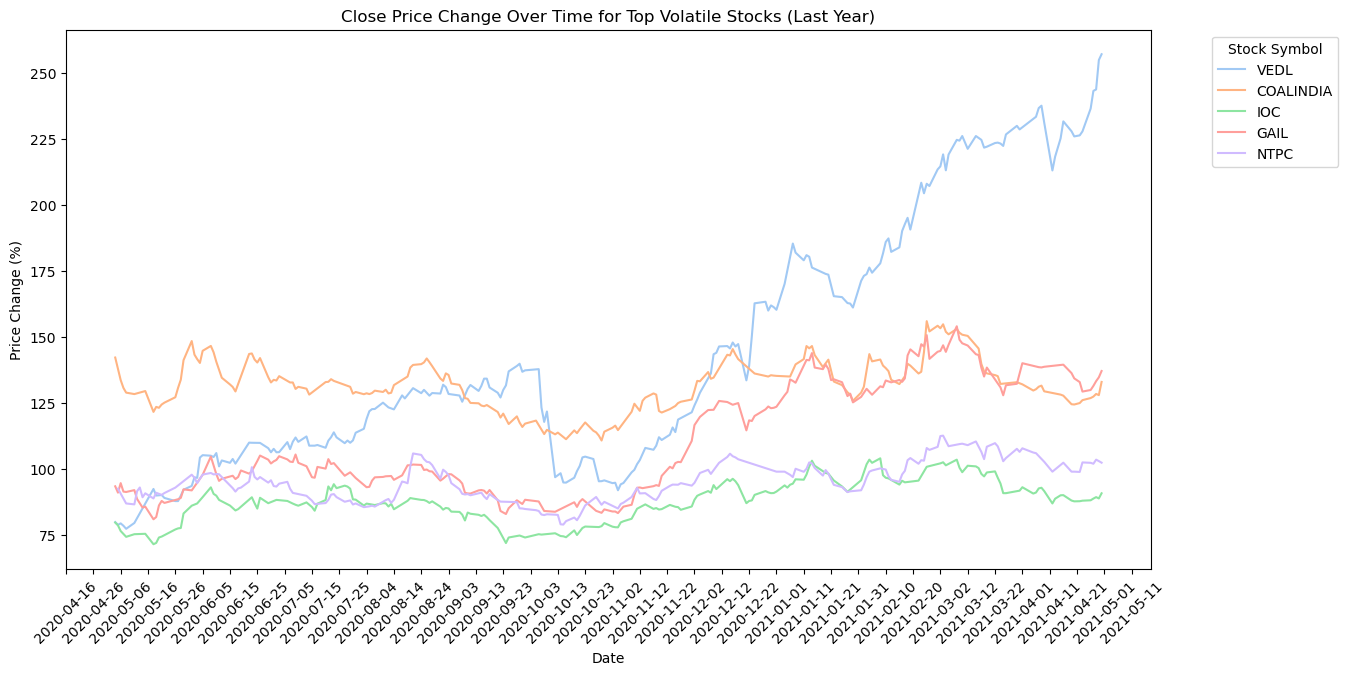

In [ ]:
# Time series analysis of price changes for most volatile_stocks
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Determine the latest date in your data
latest_date = data['Date'].max()

# Filter the data to the last one year
one_year_ago = latest_date - pd.DateOffset(years=1)
filtered_data = data[data['Date'] > one_year_ago]

# Filter data for most volatile stocks
top_volatile_stocks_data = filtered_data[filtered_data['Symbol'].isin(most_volatile_stocks.Symbol)]

# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_volatile_stocks_data.sort_values('Date'), x='Date', y='Close', hue='Symbol', palette='pastel')

# Set the locator for major ticks to every 10 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set plot title and labels
plt.title("Close Price Change Over Time for Top Volatile Stocks (Last Year)")
plt.xlabel("Date")
plt.ylabel("Price Change (%)")

# Adjust legend and tick parameters
plt.legend(title='Stock Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate ticks for better visibility

# Display the plot
plt.show()

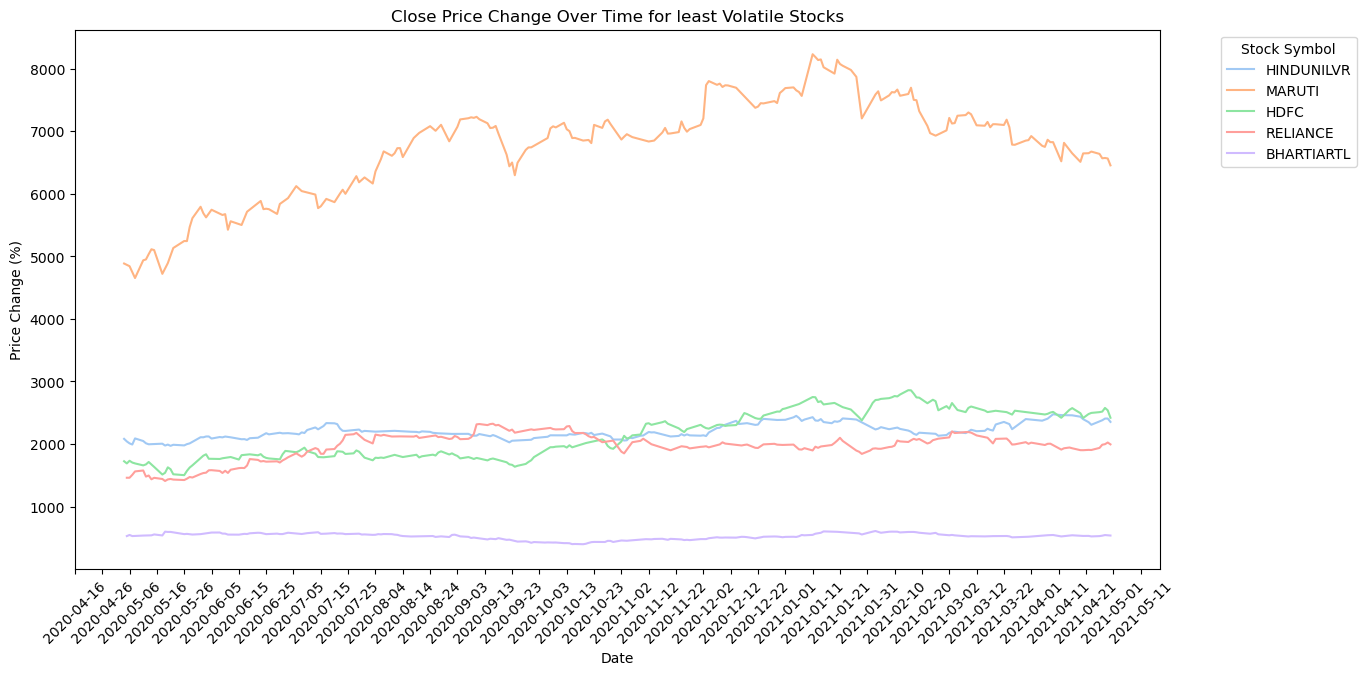

In [ ]:
import matplotlib.dates as mdates
# Time series analysis of price changes for low volatile_stocks
# Determine the latest date in your data
data['Date'] = pd.to_datetime(data['Date'])
latest_date = data['Date'].max()

# Filter the data to the last one year
one_year_ago = latest_date - pd.DateOffset(years=1)
filtered_data = data[data['Date'] > one_year_ago]
low_volatile_stocks_data = filtered_data[filtered_data['Symbol'].isin(least_volatile_stocks.Symbol)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=low_volatile_stocks_data.sort_values('Date'), x='Date', y='Close', hue='Symbol', palette='pastel')
plt.title("Close Price Change Over Time for least Volatile Stocks")
plt.xlabel("Date")
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.ylabel("Price Change (%)")
plt.legend(title='Stock Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Prepare data for model training

Data from 2010 to 2018 is used for training and data from 2019 to 2021 for testing. This method ensures that the model is validated against unseen future data.

In [ ]:
data.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                       float64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
Symbol_encoded                 int64
Future_Close                 float64
Price_Change_%               float64
Price_Movement                object
dtype: object

In [ ]:
clean_df.Date.min()

'2010-11-04'

In [ ]:
# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date
# Select features and target
X = data.drop(columns=['Price_Movement', 'Price_Change_%','Future_Close', 'Symbol'])  # Drop unnecessary columns #, 'Company Name', 'Industry', 'ISIN Code'
X = X.select_dtypes(include=[np.number])  # Select only numeric columns for features
y = data['Price_Movement']

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define a cutoff date
cutoff_date = pd.Timestamp('2015-01-01')  # Adjust the cutoff date to your specific needs

# Time-based split
train_data = data[data['Date'] < cutoff_date]
test_data = data[data['Date'] >= cutoff_date]

# Get the corresponding features and target labels for training and testing datasets
X_train = train_data.drop(columns=['Date']).select_dtypes(include=[np.number])
y_train = label_encoder.transform(train_data['Price_Movement'])

X_test = test_data.drop(columns=['Date']).select_dtypes(include=[np.number])
y_test = label_encoder.transform(test_data['Price_Movement'])

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Model
Predicting Majority Class

In [ ]:
# Baseline Model: Simple Frequency-Based Prediction
most_frequent_class = np.bincount(y_train).argmax()
y_pred_baseline = np.full_like(y_test, most_frequent_class)

# Evaluate Baseline Model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Model Performance:")
print(classification_report(y_test, y_pred_baseline))
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))

Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.33      1.00      0.49     21210
           1       0.00      0.00      0.00     21792
           2       0.00      0.00      0.00     21842

    accuracy                           0.33     64844
   macro avg       0.11      0.33      0.16     64844
weighted avg       0.11      0.33      0.16     64844

Accuracy: 0.3270927148232681


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix (Baseline Model):


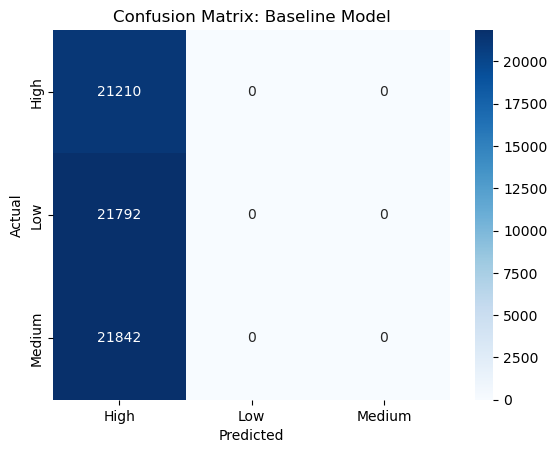

In [ ]:
# Confusion Matrix for Baseline Model
print("Confusion Matrix (Baseline Model):")
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix: Baseline Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Naive Bayes Model


Training Main Model (Naive Bayes)...
Naive Bayes Model Performance:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46     21210
           1       0.43      0.66      0.52     21792
           2       0.53      0.35      0.42     21842

    accuracy                           0.48     64844
   macro avg       0.49      0.48      0.47     64844
weighted avg       0.49      0.48      0.47     64844

Accuracy: 0.47552587749059283


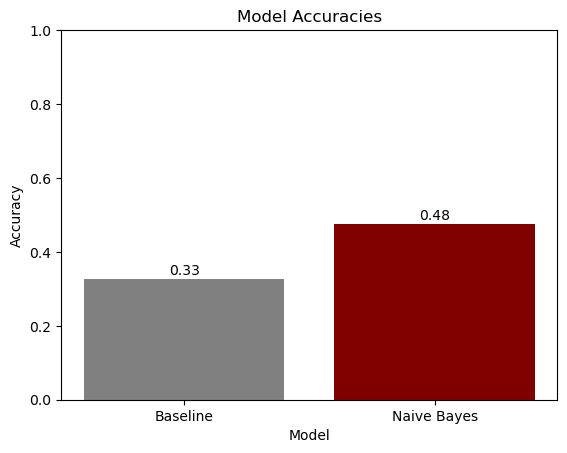

Confusion Matrix (Naive Bayes Model):


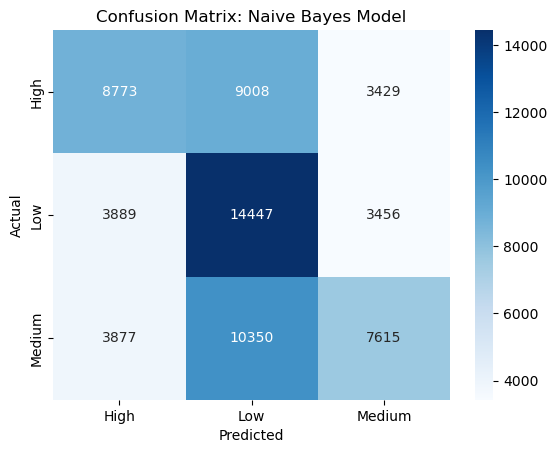

In [ ]:
# Main Model: Naive Bayes
print("\nTraining Main Model (Naive Bayes)...")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Evaluate Naive Bayes Model
y_pred_nb = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Model Performance:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", nb_accuracy)

# Plot accuracy after Naive Bayes
plt.bar(["Baseline", "Naive Bayes"], [baseline_accuracy, nb_accuracy], color=['gray', 'maroon'])
plt.ylim(0, 1)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
for i, acc in enumerate([baseline_accuracy, nb_accuracy]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.show()

# Confusion Matrix for Naive Bayes
print("Confusion Matrix (Naive Bayes Model):")
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix: Naive Bayes Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Tuning Hyperparameters...
Best Parameters: {'var_smoothing': 1e-10}

Training Optimized Naive Bayes Model...
Optimized Naive Bayes Model Performance:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46     21210
           1       0.43      0.66      0.52     21792
           2       0.53      0.35      0.42     21842

    accuracy                           0.48     64844
   macro avg       0.49      0.48      0.47     64844
weighted avg       0.49      0.48      0.47     64844

Accuracy: 0.47552587749059283


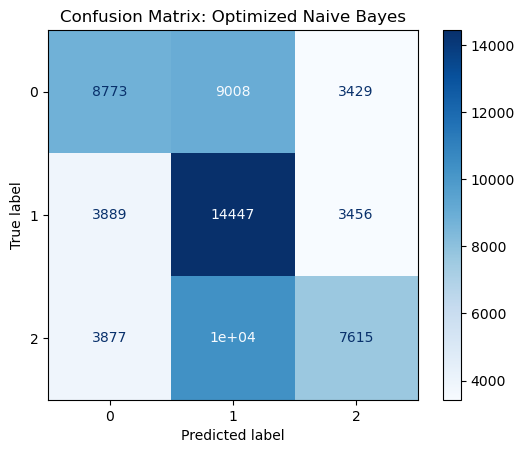

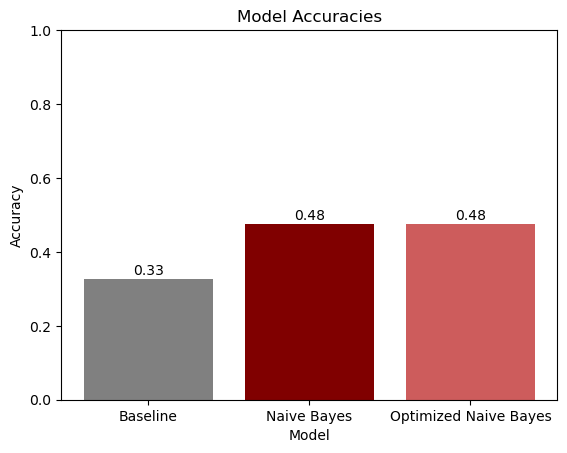

In [ ]:
# Hyperparameter Tuning for GaussianNB
print("\nTuning Hyperparameters...")
param_grid = {'var_smoothing': np.logspace(-10, -1, 10)}
grid_search = GridSearchCV(GaussianNB(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best Parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Optimized Naive Bayes Model
print("\nTraining Optimized Naive Bayes Model...")
optimized_nb_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
optimized_nb_model.fit(X_train_scaled, y_train)

# Evaluate Optimized Naive Bayes Model
y_pred_optimized = optimized_nb_model.predict(X_test_scaled)
optimized_nb_accuracy = accuracy_score(y_test, y_pred_optimized)
print("Optimized Naive Bayes Model Performance:")
print(classification_report(y_test, y_pred_optimized))
print("Accuracy:", optimized_nb_accuracy)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimized)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=optimized_nb_model.classes_)
disp.plot(cmap='Blues')  # You can change the color map if desired
plt.title("Confusion Matrix: Optimized Naive Bayes")
plt.show()

# Compare Accuracies
plt.bar(["Baseline", "Naive Bayes", "Optimized Naive Bayes"],
        [baseline_accuracy, nb_accuracy, optimized_nb_accuracy],
        color=['gray', 'maroon', 'IndianRed'])
plt.ylim(0, 1)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
for i, acc in enumerate([baseline_accuracy, nb_accuracy, optimized_nb_accuracy]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.show()


Applying PCA...
Accuracy using PCA-transformed features: 0.6284929985812103
Classification Report for Naive Bayes Model with PCA:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62     21210
           1       0.87      0.52      0.65     21792
           2       0.51      0.79      0.62     21842

    accuracy                           0.63     64844
   macro avg       0.69      0.63      0.63     64844
weighted avg       0.69      0.63      0.63     64844



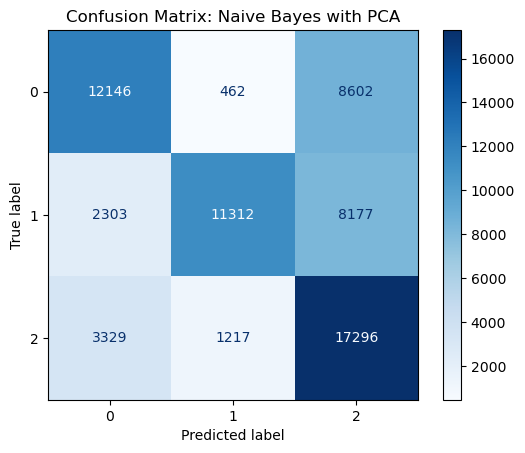

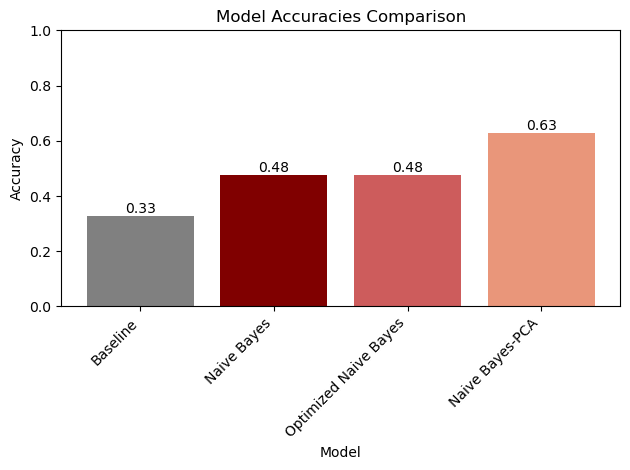

In [ ]:
# Apply PCA to reduce dimensionality
print("\nApplying PCA...")
pca = PCA(n_components=10)  # Reduce to 10 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train and Evaluate Naive Bayes Model on PCA-transformed Features
model_pca = GaussianNB()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy using PCA-transformed features:", accuracy_pca)
print("Classification Report for Naive Bayes Model with PCA:")
print(classification_report(y_test, y_pred_pca))

# Compute the confusion matrix
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

# Display the confusion matrix
disp_pca = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_pca, display_labels=model_pca.classes_)
disp_pca.plot(cmap='Blues')  # You can change the color map if desired
plt.title("Confusion Matrix: Naive Bayes with PCA")
plt.show()

# Combine model names and accuracies
models = [
    "Baseline",
    "Naive Bayes",
    "Optimized Naive Bayes",
    "Naive Bayes-PCA"
]

accuracies = [
    baseline_accuracy,  # Replace with actual value
    nb_accuracy,        # Replace with actual value
    optimized_nb_accuracy,  # Replace with actual value
    accuracy_pca        # Replace with actual value
]

# Plotting combined model accuracies
plt.bar(models, accuracies, color=['gray', 'maroon', 'IndianRed','darksalmon'])
plt.ylim(0, 1)
plt.title("Model Accuracies Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Applying PCA...

Tuning Hyperparameters...
Best Parameters: {'var_smoothing': 2.9763514416313253e-05}

Training Optimized Naive Bayes Model...
Optimized Naive Bayes Model  with PCA and Grid Search Performance:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62     21210
           1       0.88      0.51      0.64     21792
           2       0.50      0.79      0.61     21842

    accuracy                           0.62     64844
   macro avg       0.69      0.62      0.62     64844
weighted avg       0.69      0.62      0.62     64844

Accuracy: 0.47552587749059283


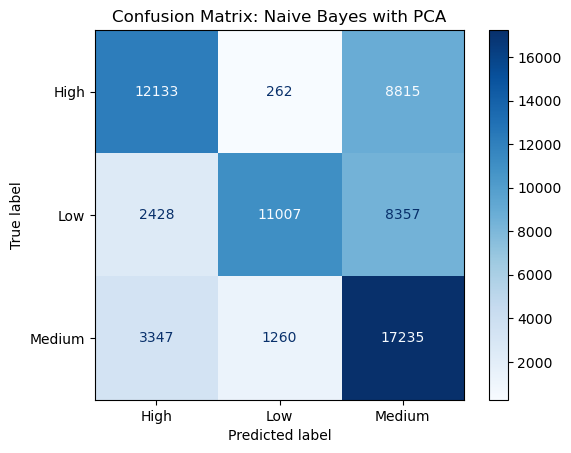

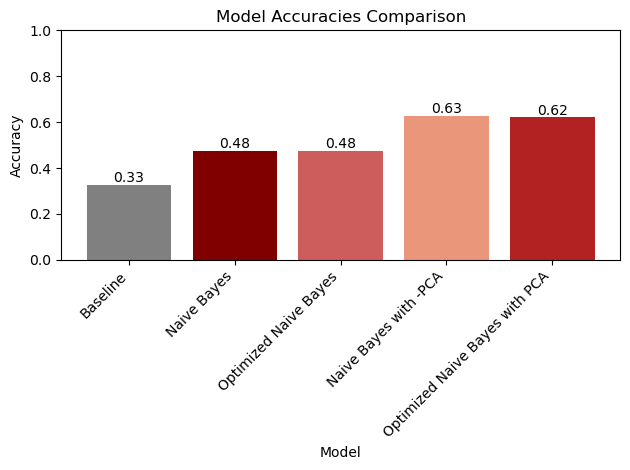

In [ ]:
# Apply PCA to reduce dimensionality
print("\nApplying PCA...")
pca = PCA(n_components=10)  # Reduce to 10 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#######

# Hyperparameter Tuning for GaussianNB
print("\nTuning Hyperparameters...")
param_grid = {'var_smoothing': np.logspace(-20,1,20)}
grid_search = GridSearchCV(GaussianNB(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_pca, y_train)

# Best Parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Optimized Naive Bayes Model
print("\nTraining Optimized Naive Bayes Model...")
optimized_nb_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
optimized_nb_model.fit(X_train_pca, y_train)

# Evaluate Optimized Naive Bayes Model
y_pred_pca = optimized_nb_model.predict(X_test_pca)
optimized_pca_nb_accuracy = accuracy_score(y_test, y_pred_pca)
print("Optimized Naive Bayes Model  with PCA and Grid Search Performance:")
print(classification_report(y_test, y_pred_pca))
print("Accuracy:", optimized_nb_accuracy)

#######




# Compute the confusion matrix
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
class_names = label_encoder.inverse_transform([0, 1, 2])

# Display the confusion matrix
disp_pca = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_pca, display_labels=class_names)
disp_pca.plot(cmap='Blues')  # You can change the color map if desired
plt.title("Confusion Matrix: Naive Bayes with PCA")
plt.show()

# Combine model names and accuracies
models = [
    "Baseline",
    "Naive Bayes",
    "Optimized Naive Bayes",
    "Naive Bayes with -PCA",
    "Optimized Naive Bayes with PCA"
]

accuracies = [
    baseline_accuracy,
    nb_accuracy,
    optimized_nb_accuracy,
    accuracy_pca,
    optimized_pca_nb_accuracy
]

# Plotting combined model accuracies
plt.bar(models, accuracies, color=['gray', 'maroon', 'IndianRed','darksalmon','FireBrick'])
plt.ylim(0, 1)
plt.title("Model Accuracies Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## SVM

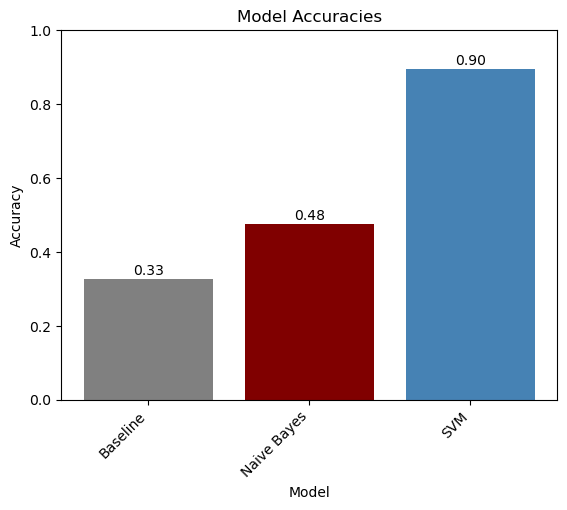

Training Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14387
           1       0.98      1.00      0.99     13805
           2       0.99      0.95      0.97     13755

    accuracy                           0.98     41947
   macro avg       0.98      0.98      0.98     41947
weighted avg       0.98      0.98      0.98     41947

Testing Data:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     21210
           1       0.93      0.89      0.91     21792
           2       0.82      0.91      0.86     21842

    accuracy                           0.90     64844
   macro avg       0.90      0.90      0.90     64844
weighted avg       0.90      0.90      0.90     64844



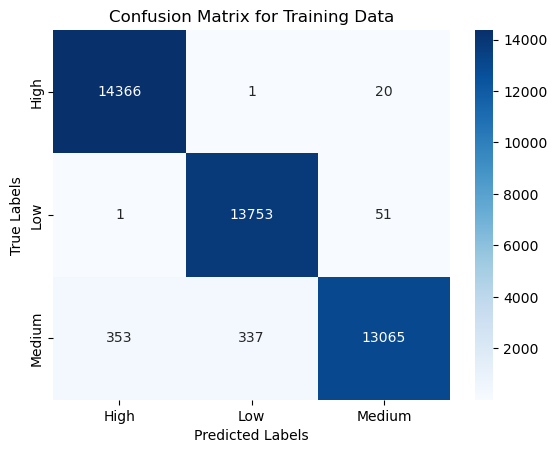

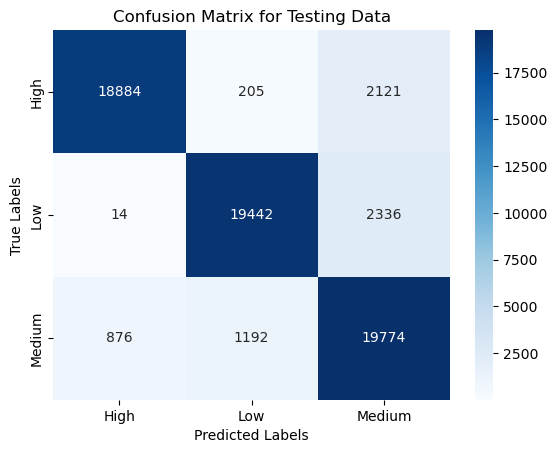

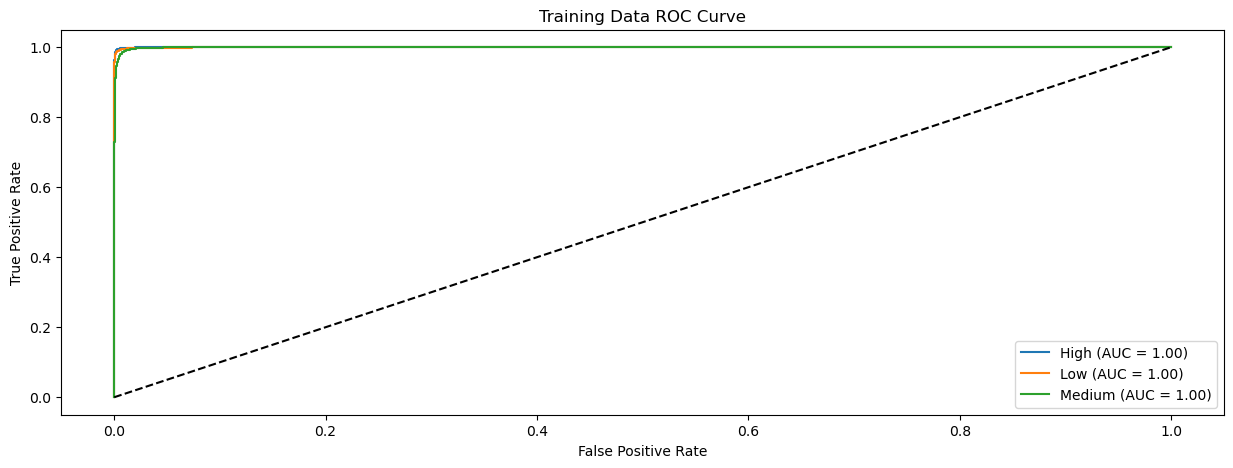

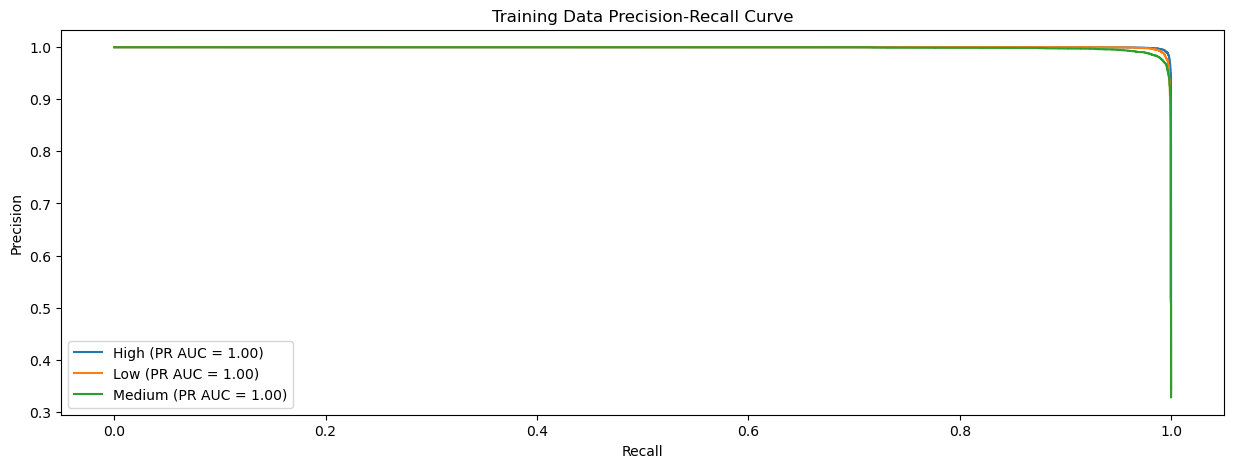

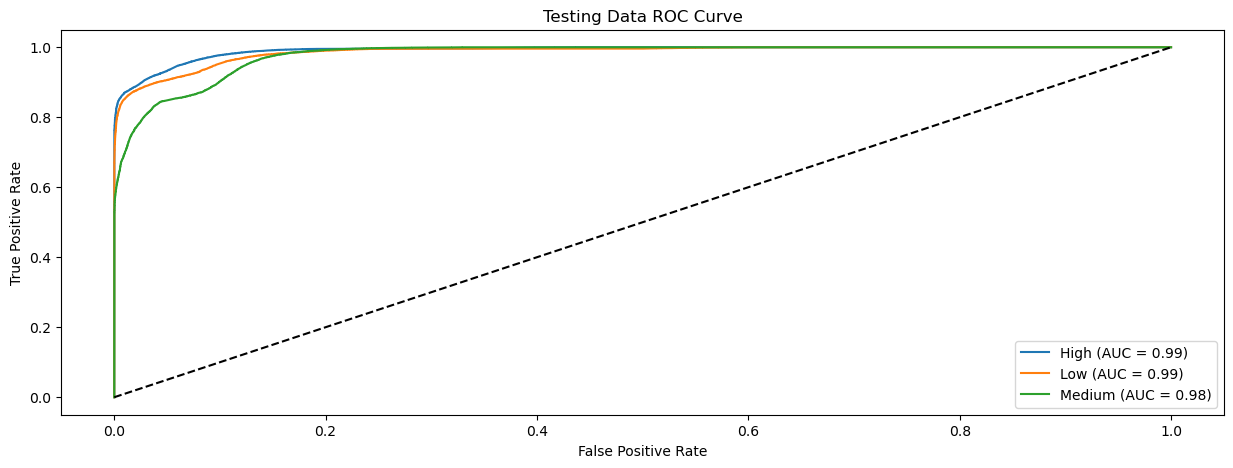

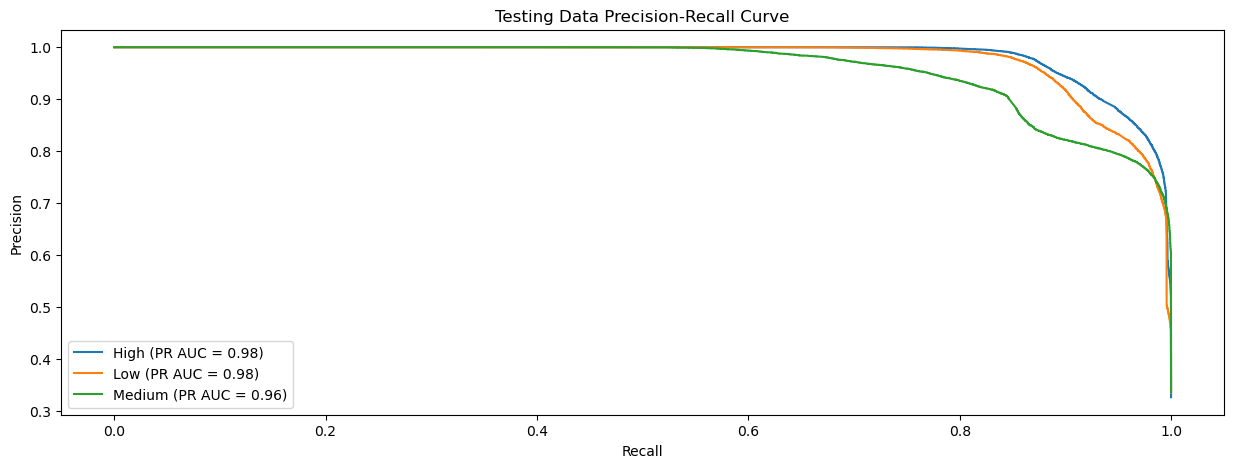

In [ ]:
# Initialize and train the SVM model
svm_model = SVC(probability=True)  # Enable probability estimates
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = svm_model.predict(X_train_scaled)
y_pred_test = svm_model.predict(X_test_scaled)
y_scores_train = svm_model.predict_proba(X_train_scaled)
y_scores_test = svm_model.predict_proba(X_test_scaled)

#Evaluation
classes = label_encoder.inverse_transform([0, 1, 2])
# Plot accuracy after Logistic Regression
svm_accuracy = accuracy_score(y_test, y_pred_test)
plt.bar(["Baseline", "Naive Bayes", "SVM"], [baseline_accuracy, nb_accuracy, svm_accuracy], color=['gray', 'maroon','steelblue'])
plt.ylim(0, 1)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
for i, acc in enumerate([baseline_accuracy, nb_accuracy, svm_accuracy]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.xticks(rotation=45, ha='right')
plt.show()


# Evaluate the model
print("Training Data:")
print(classification_report(y_train, y_pred_train))
print("Testing Data:")
print(classification_report(y_test, y_pred_test))

# Plotting Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# ROC and PR Curves
def plot_roc_pr_curves(y_true, y_scores, title, class_names):
    y_true_binarized = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true_binarized.shape[1]

    # ROC curve
    plt.figure(figsize=(15, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    plt.figure(figsize=(15, 5))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_true_binarized[:, i], y_scores[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{class_names[i]} (PR AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title + ' Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Training Data")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Testing Data")

# ROC and PR Curves function as defined previously
plot_roc_pr_curves(y_train, y_scores_train, "Training Data", label_encoder.classes_)
plot_roc_pr_curves(y_test, y_scores_test, "Testing Data", label_encoder.classes_)


## Logistic Regression Model

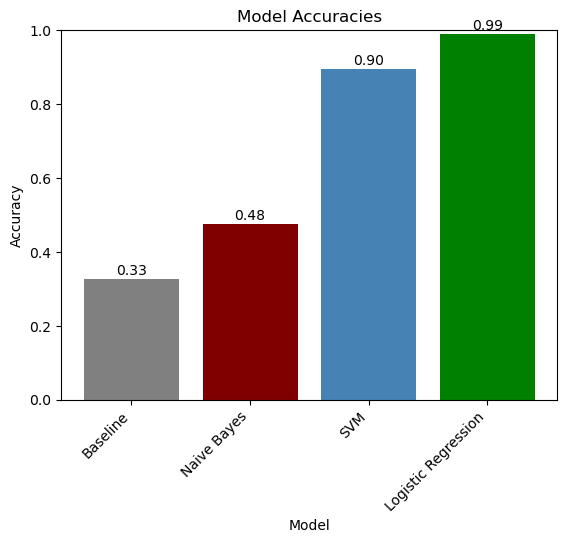

Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14387
           1       0.99      1.00      0.99     13805
           2       1.00      0.97      0.99     13755

    accuracy                           0.99     41947
   macro avg       0.99      0.99      0.99     41947
weighted avg       0.99      0.99      0.99     41947

Testing Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21210
           1       0.99      1.00      0.99     21792
           2       0.99      0.98      0.98     21842

    accuracy                           0.99     64844
   macro avg       0.99      0.99      0.99     64844
weighted avg       0.99      0.99      0.99     64844



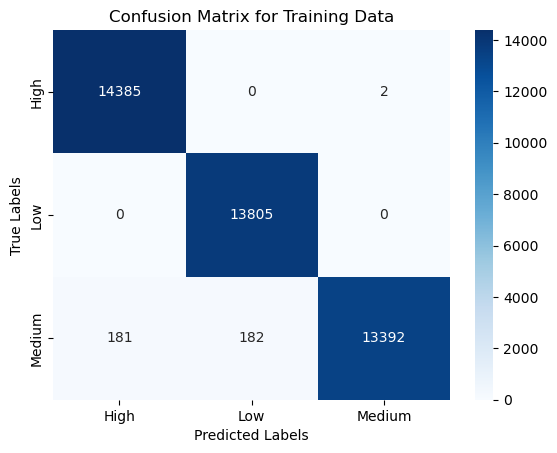

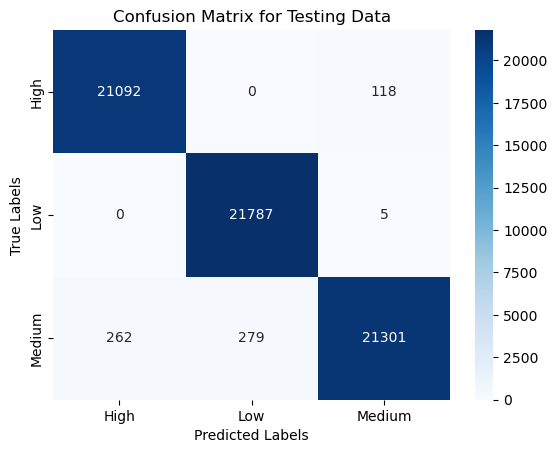

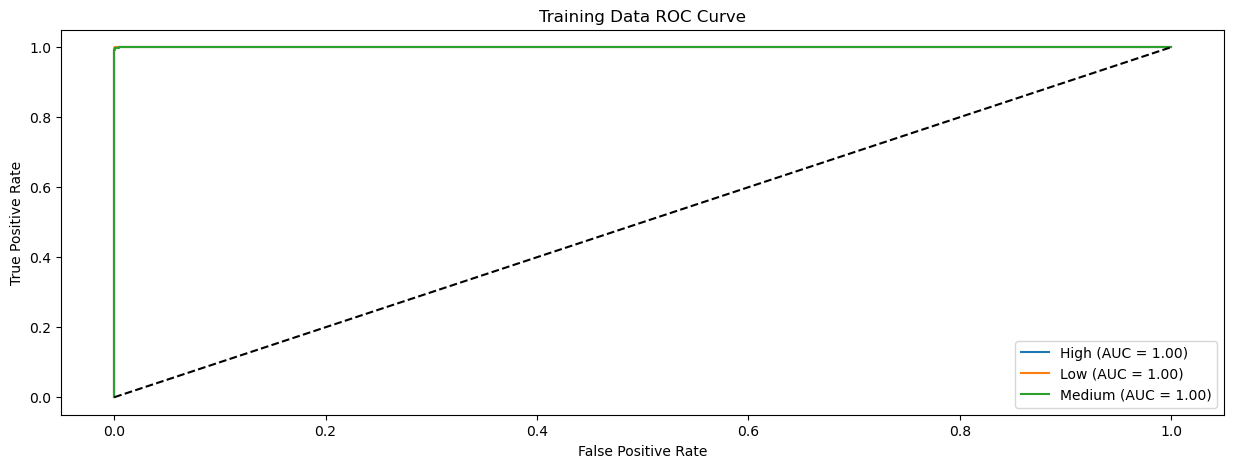

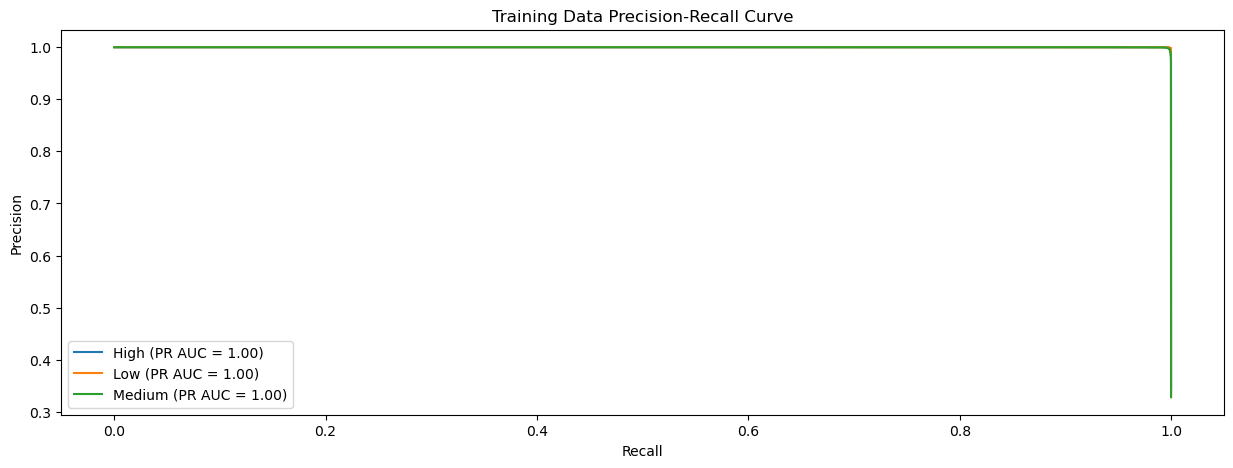

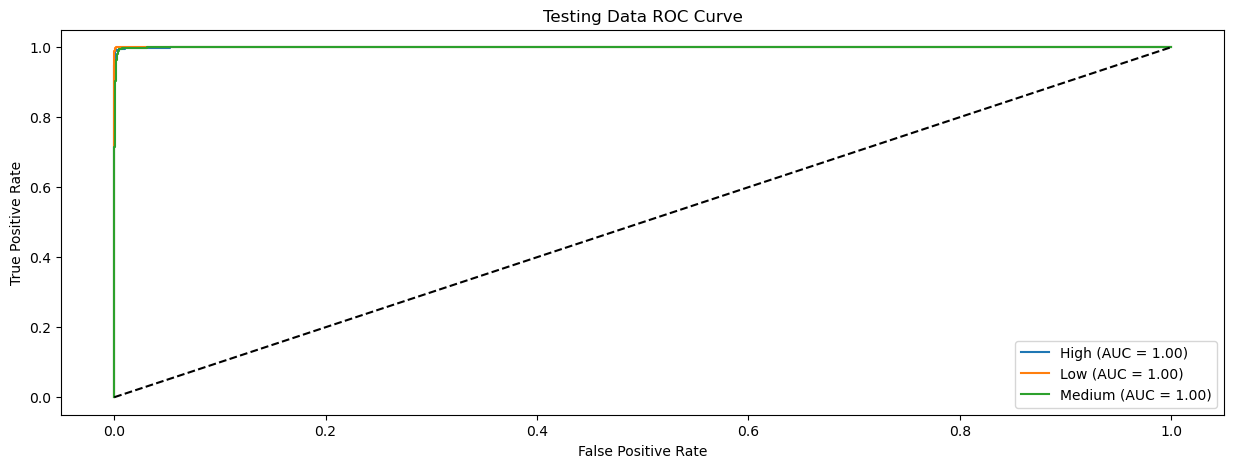

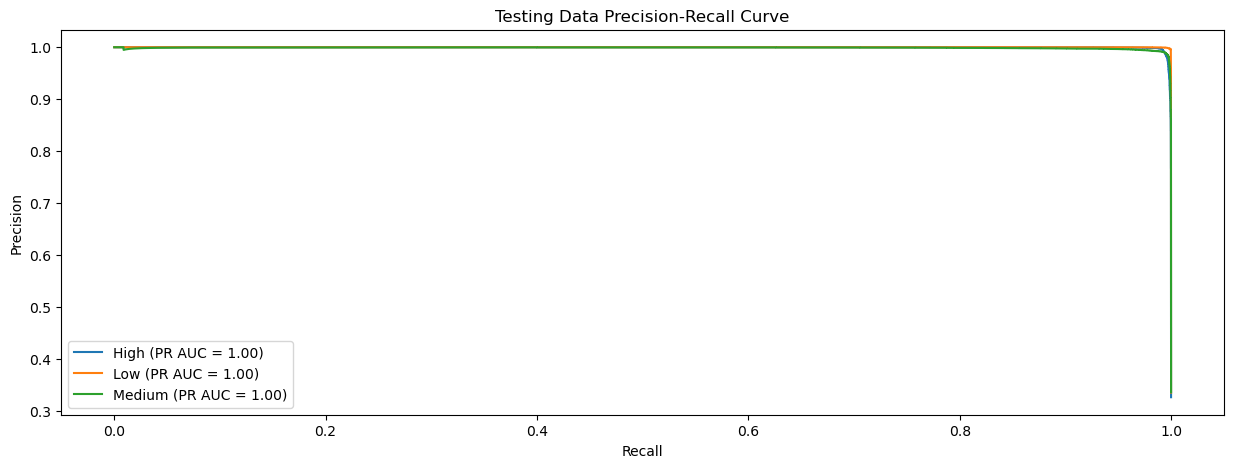

In [ ]:

# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

#Evaluation
classes = label_encoder.inverse_transform([0, 1, 2])
# Plot accuracy after Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_test)
plt.bar(["Baseline", "Naive Bayes", "SVM" ,"Logistic Regression"], [baseline_accuracy, nb_accuracy, svm_accuracy,lr_accuracy], color=['gray', 'maroon','steelblue', 'green'])
plt.ylim(0, 1)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
for i, acc in enumerate([baseline_accuracy, nb_accuracy, svm_accuracy,lr_accuracy]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluations: Accuracy and Classification Report
print("Training Data:")
print(classification_report(y_train, y_pred_train))
print("Testing Data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm_lr = confusion_matrix(y_true, y_pred)
    classes = label_encoder.inverse_transform([0, 1, 2])
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Training Data")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Testing Data")

# ROC and PR Curves
def plot_roc_pr_curves(y_true, y_scores, title, class_names):
    y_true_binarized = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true_binarized.shape[1]

    # ROC curve
    plt.figure(figsize=(15, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    plt.figure(figsize=(15, 5))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_true_binarized[:, i], y_scores[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{class_names[i]} (PR AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title + ' Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Predict probability scores
y_scores_train = lr_model.predict_proba(X_train_scaled)
y_scores_test = lr_model.predict_proba(X_test_scaled)

# Plot ROC and PR curves with class names for training data
plot_roc_pr_curves(y_train, y_scores_train, "Training Data", class_names)
# Plot ROC and PR curves with class names for testing data
plot_roc_pr_curves(y_test, y_scores_test, "Testing Data", class_names)

Cross-Validation Results:
test_accuracy: Mean = 0.99, Std = 0.00
test_precision_weighted: Mean = 0.99, Std = 0.00
test_recall_weighted: Mean = 0.99, Std = 0.00
test_f1_weighted: Mean = 0.99, Std = 0.00


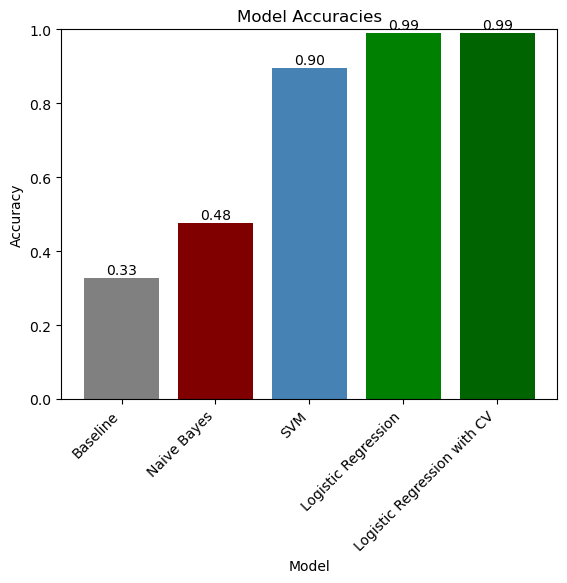

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14387
           1       0.99      1.00      0.99     13805
           2       1.00      0.97      0.99     13755

    accuracy                           0.99     41947
   macro avg       0.99      0.99      0.99     41947
weighted avg       0.99      0.99      0.99     41947

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21210
           1       0.99      1.00      0.99     21792
           2       0.99      0.98      0.98     21842

    accuracy                           0.99     64844
   macro avg       0.99      0.99      0.99     64844
weighted avg       0.99      0.99      0.99     64844



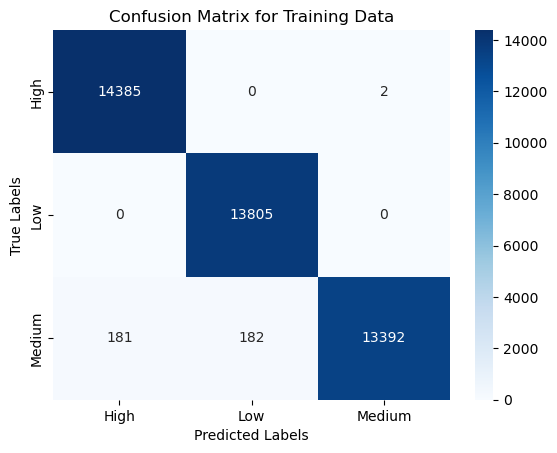

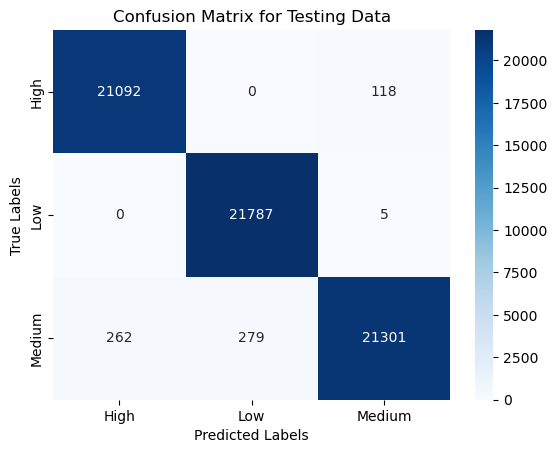

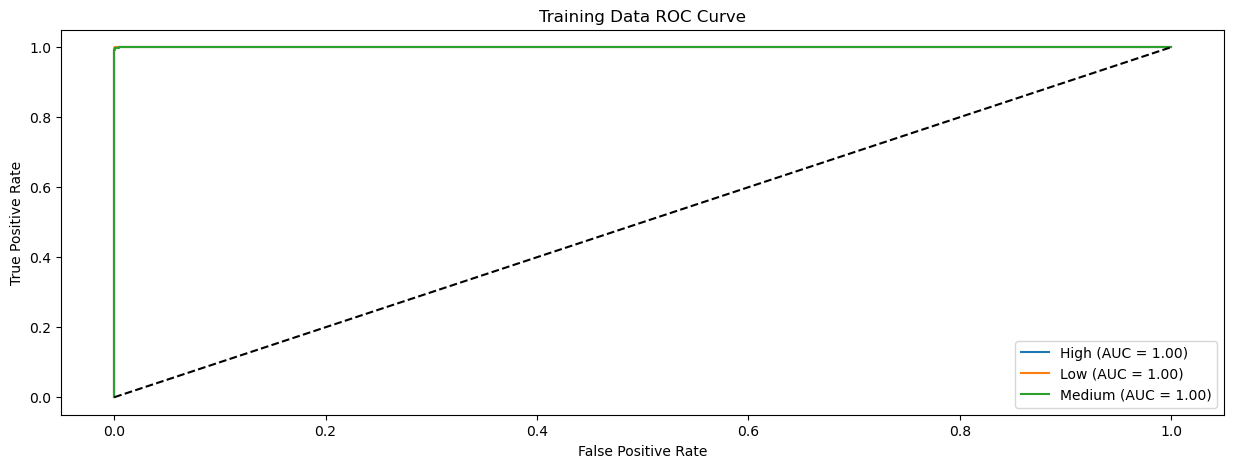

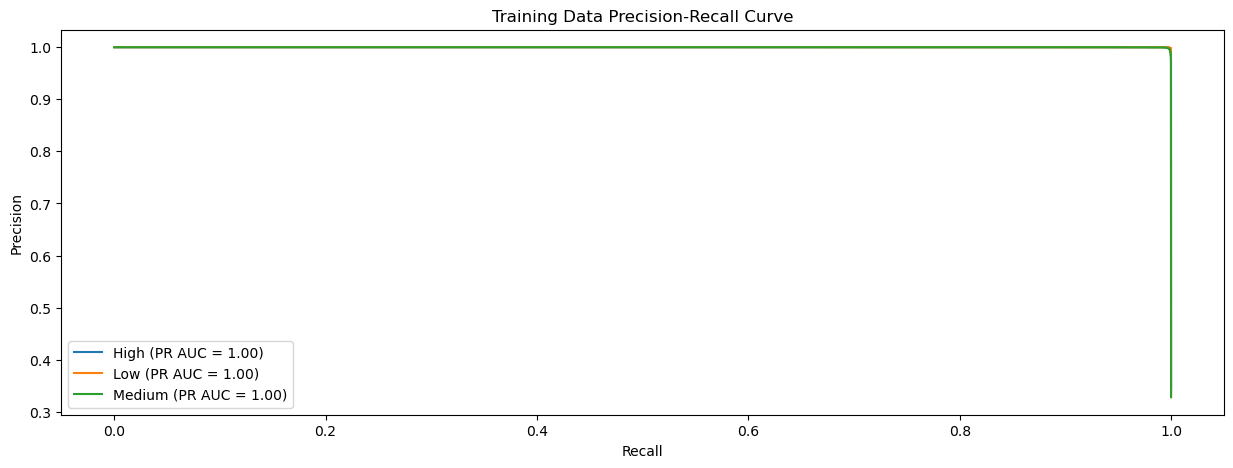

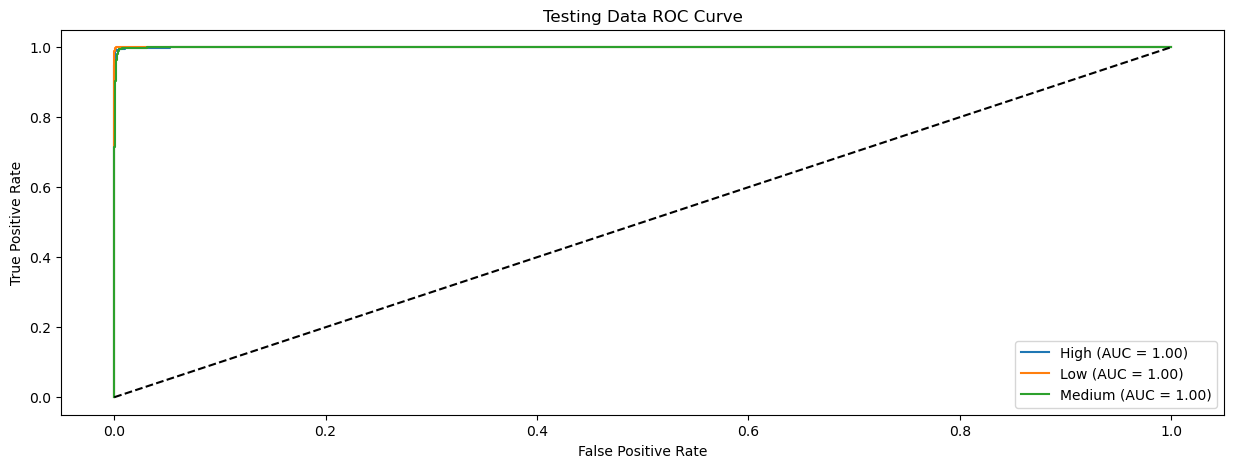

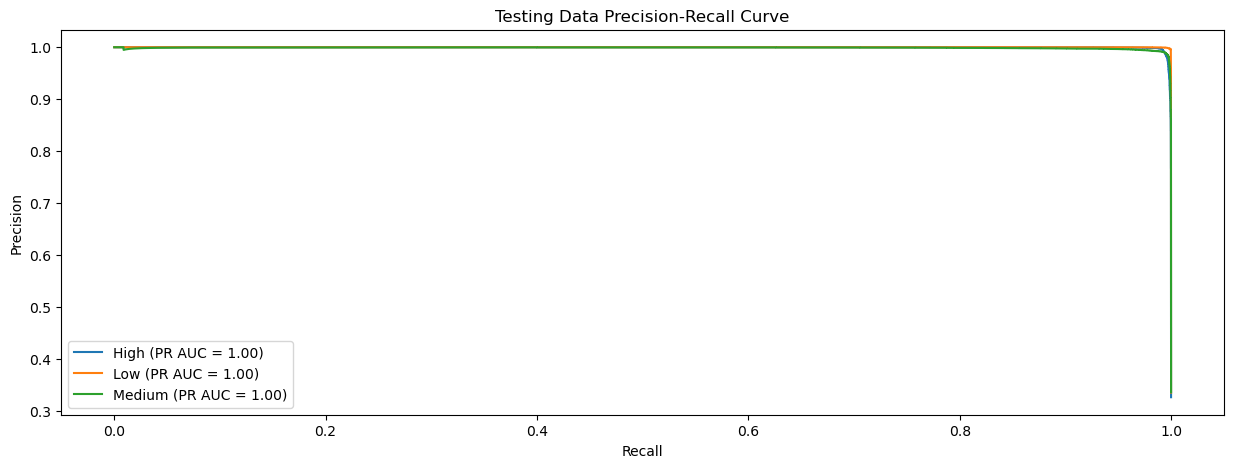

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_validate


#Train the Logistic Regression model
lr_model_cv = LogisticRegression()
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
    lr_model_cv, X_train_scaled, y_train, cv=kf,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
    return_train_score=True
)

# Display cross-validation results
print("Cross-Validation Results:")
for metric in ['test_accuracy', 'test_precision_weighted', 'test_recall_weighted', 'test_f1_weighted']:
    print(f"{metric}: Mean = {cv_results[metric].mean():.2f}, Std = {cv_results[metric].std():.2f}")

# Train the model on full training data
lr_model_cv.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = lr_model_cv.predict(X_train_scaled)
y_pred_test = lr_model_cv.predict(X_test_scaled)

# Accuracy Comparison Plot
lr_accuracy_cv = accuracy_score(y_test, y_pred_test)
plt.bar(["Baseline", "Naive Bayes", "SVM", "Logistic Regression","Logistic Regression with CV"],
        [baseline_accuracy, nb_accuracy, svm_accuracy, lr_accuracy,lr_accuracy_cv], color=['gray', 'maroon', 'steelblue', 'green','darkgreen'])
plt.ylim(0, 1)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
for i, acc in enumerate([baseline_accuracy, nb_accuracy, svm_accuracy, lr_accuracy,lr_accuracy_cv]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.xticks(rotation=45, ha='right')
plt.show()

# Classification Reports
print("Training Data Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Testing Data Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    classes = label_encoder.inverse_transform([0, 1, 2])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Training Data")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Testing Data")

# ROC and Precision-Recall Curves
def plot_roc_pr_curves(y_true, y_scores, title, class_names):
    y_true_binarized = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true_binarized.shape[1]

    # ROC Curve
    plt.figure(figsize=(15, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(15, 5))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_true_binarized[:, i], y_scores[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{class_names[i]} (PR AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title + ' Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Predict probability scores
y_scores_train = lr_model_cv.predict_proba(X_train_scaled)
y_scores_test = lr_model_cv.predict_proba(X_test_scaled)

# Plot ROC and PR Curves
plot_roc_pr_curves(y_train, y_scores_train, "Training Data", class_names)
plot_roc_pr_curves(y_test, y_scores_test, "Testing Data", class_names)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


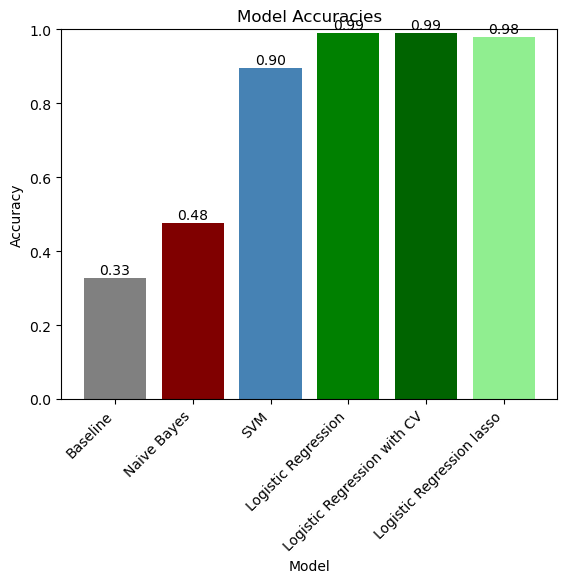

Training Data:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14387
           1       0.98      1.00      0.99     13805
           2       1.00      0.94      0.97     13755

    accuracy                           0.98     41947
   macro avg       0.98      0.98      0.98     41947
weighted avg       0.98      0.98      0.98     41947

Testing Data:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21210
           1       0.98      1.00      0.99     21792
           2       1.00      0.94      0.97     21842

    accuracy                           0.98     64844
   macro avg       0.98      0.98      0.98     64844
weighted avg       0.98      0.98      0.98     64844



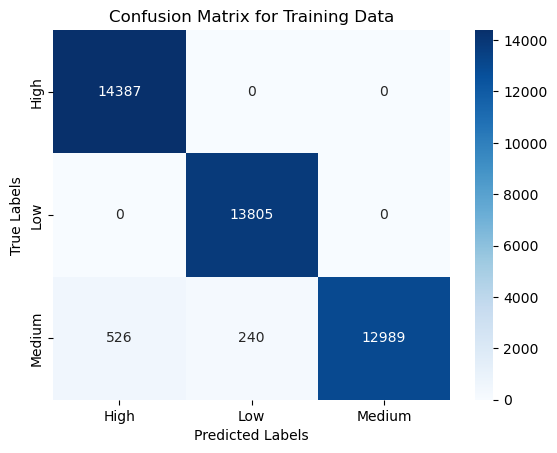

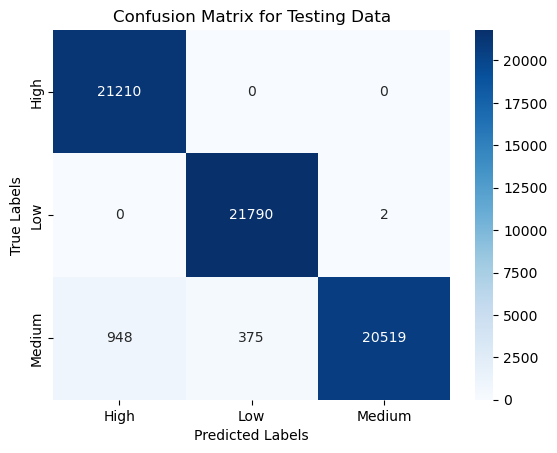

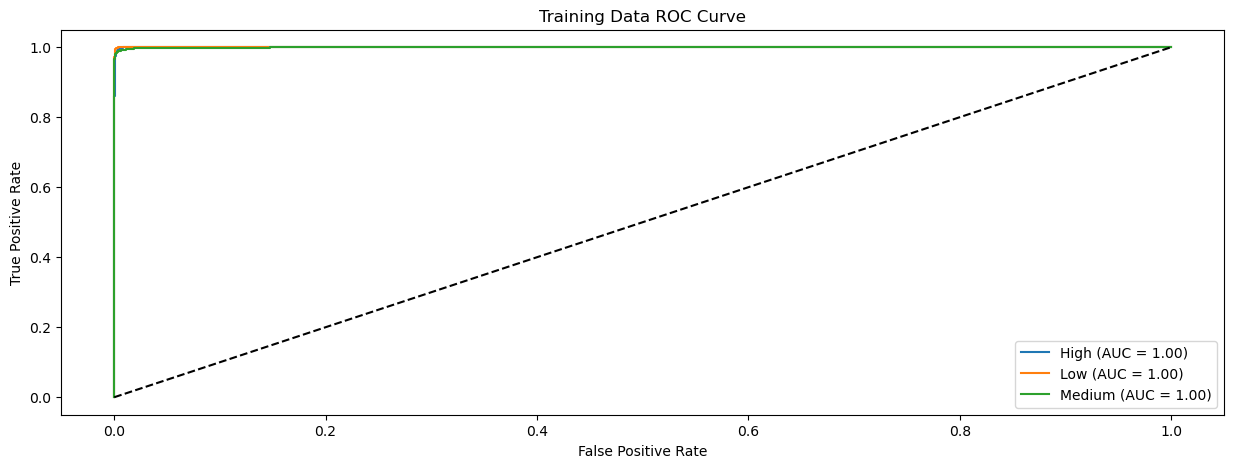

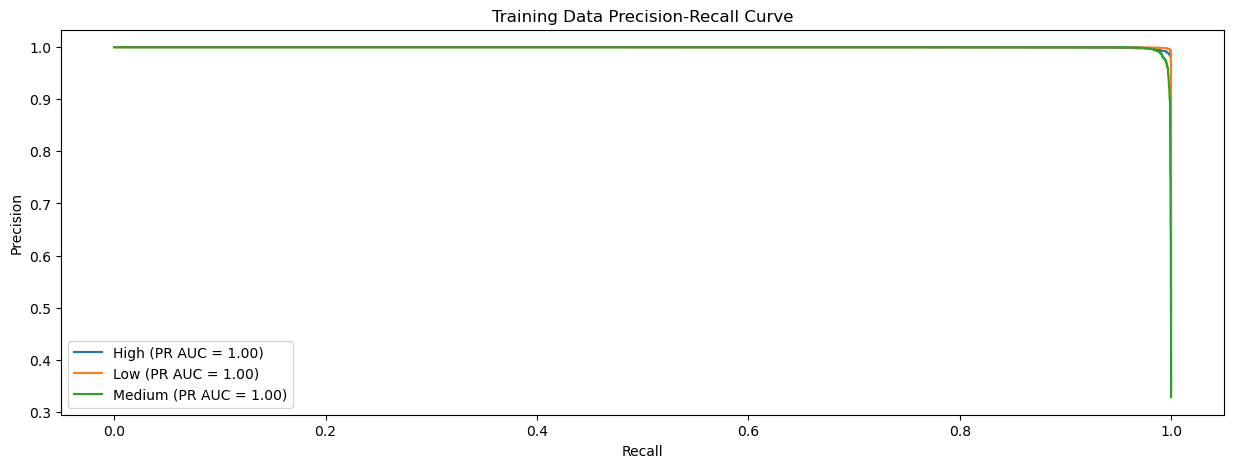

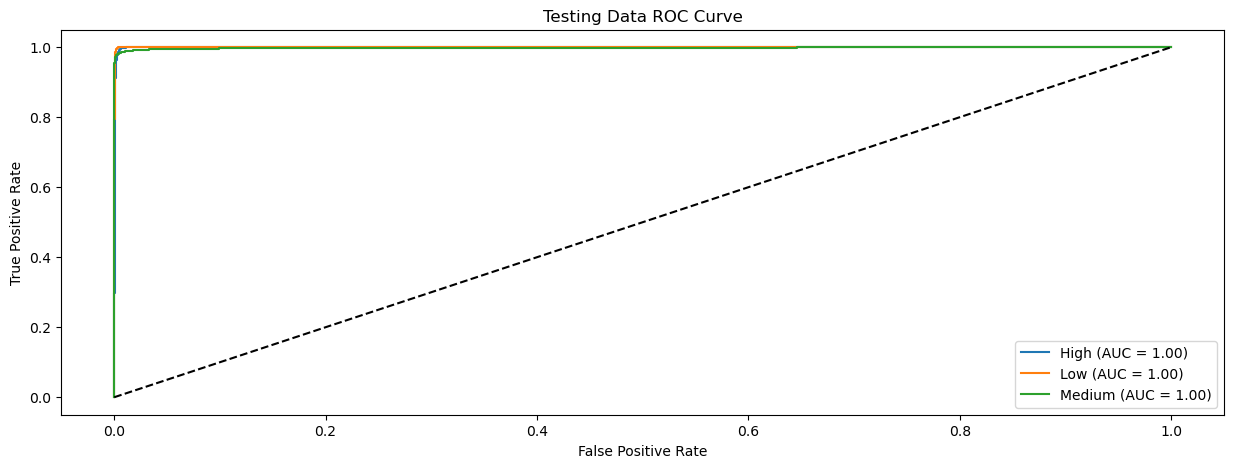

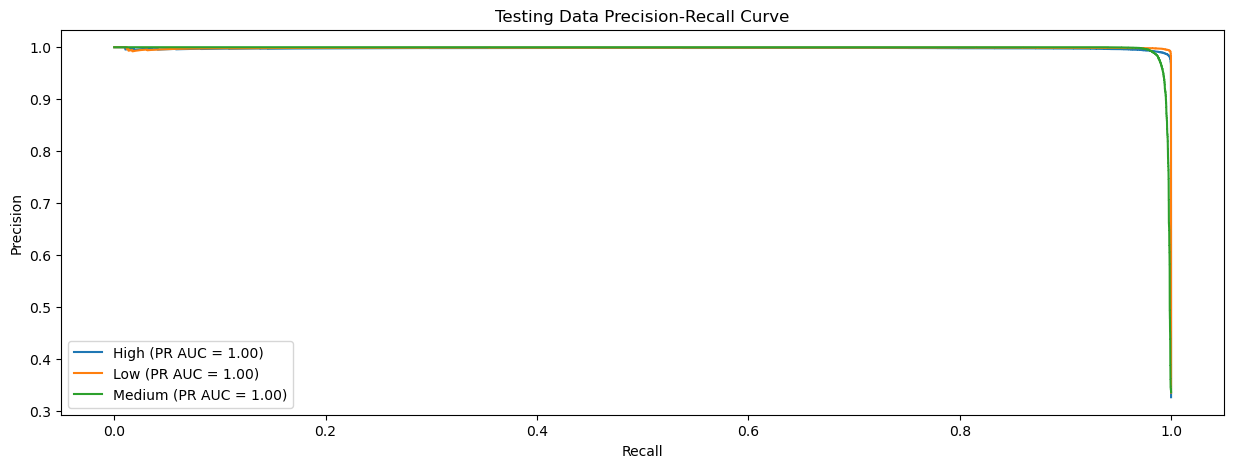

In [ ]:
# Train the Logistic Regression model
lr_model_lasso = LogisticRegression(penalty='l1', solver='liblinear')
lr_model_lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = lr_model_lasso.predict(X_train_scaled)
y_pred_test = lr_model_lasso.predict(X_test_scaled)

#Evaluation
classes = label_encoder.inverse_transform([0, 1, 2])
# Plot accuracy after Logistic Regression
lr_accuracy_lasso = accuracy_score(y_test, y_pred_test)
plt.bar(["Baseline", "Naive Bayes", "SVM" ,"Logistic Regression","Logistic Regression with CV","Logistic Regression lasso"], [baseline_accuracy, nb_accuracy, svm_accuracy,lr_accuracy,lr_accuracy_cv,lr_accuracy_lasso], color=['gray', 'maroon','steelblue', 'green', 'darkgreen','lightgreen'])
plt.ylim(0, 1)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
for i, acc in enumerate([baseline_accuracy, nb_accuracy, svm_accuracy,lr_accuracy, lr_accuracy_cv,lr_accuracy_lasso]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluations: Accuracy and Classification Report
print("Training Data:")
print(classification_report(y_train, y_pred_train))
print("Testing Data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm_lr = confusion_matrix(y_true, y_pred)
    classes = label_encoder.inverse_transform([0, 1, 2])
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Training Data")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Testing Data")

# ROC and PR Curves
def plot_roc_pr_curves(y_true, y_scores, title, class_names):
    y_true_binarized = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true_binarized.shape[1]

    # ROC curve
    plt.figure(figsize=(15, 5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall curve
    plt.figure(figsize=(15, 5))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_true_binarized[:, i], y_scores[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'{class_names[i]} (PR AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title + ' Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Predict probability scores
y_scores_train = lr_model_lasso.predict_proba(X_train_scaled)
y_scores_test = lr_model_lasso.predict_proba(X_test_scaled)

# Plot ROC and PR curves with class names for training data
plot_roc_pr_curves(y_train, y_scores_train, "Training Data", class_names)
# Plot ROC and PR curves with class names for testing data
plot_roc_pr_curves(y_test, y_scores_test, "Testing Data", class_names)

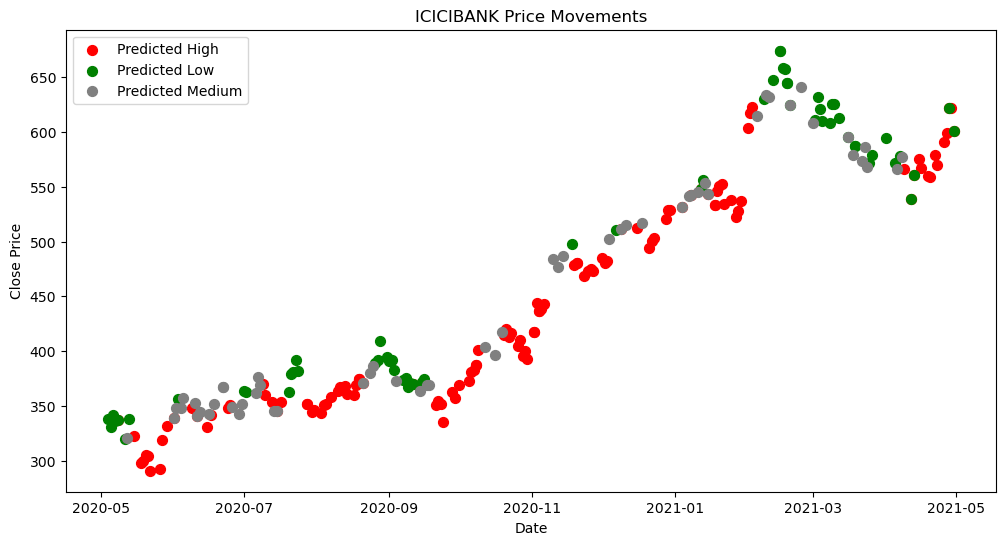

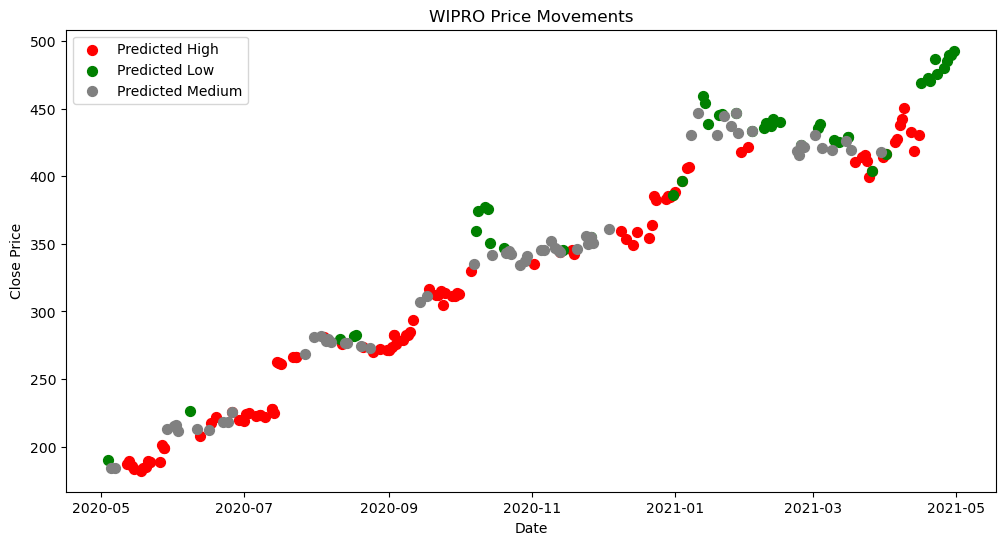

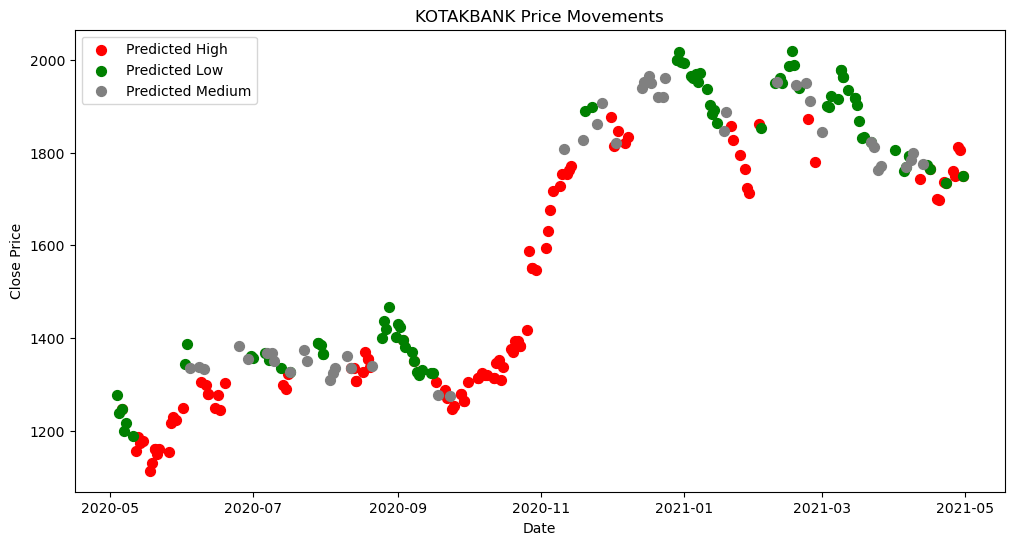

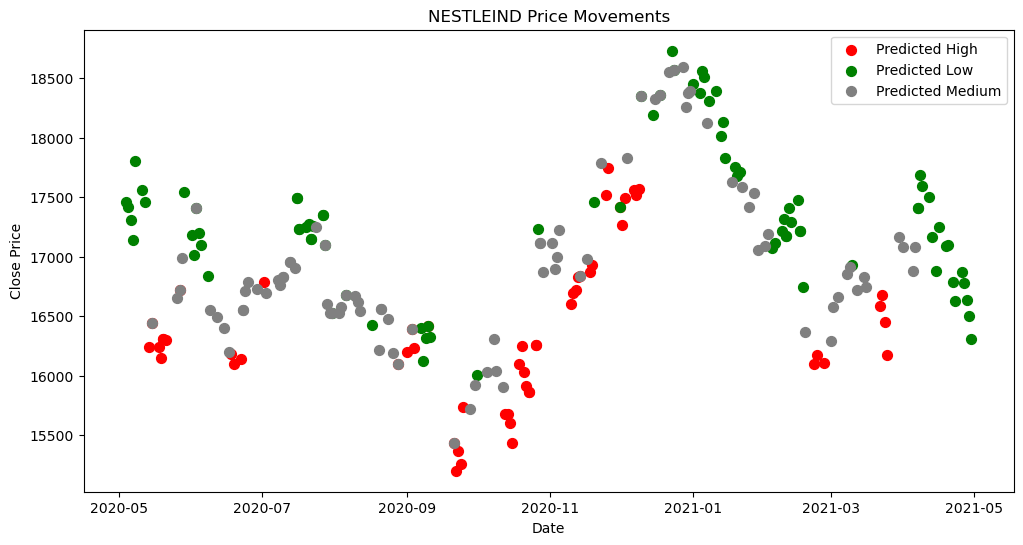

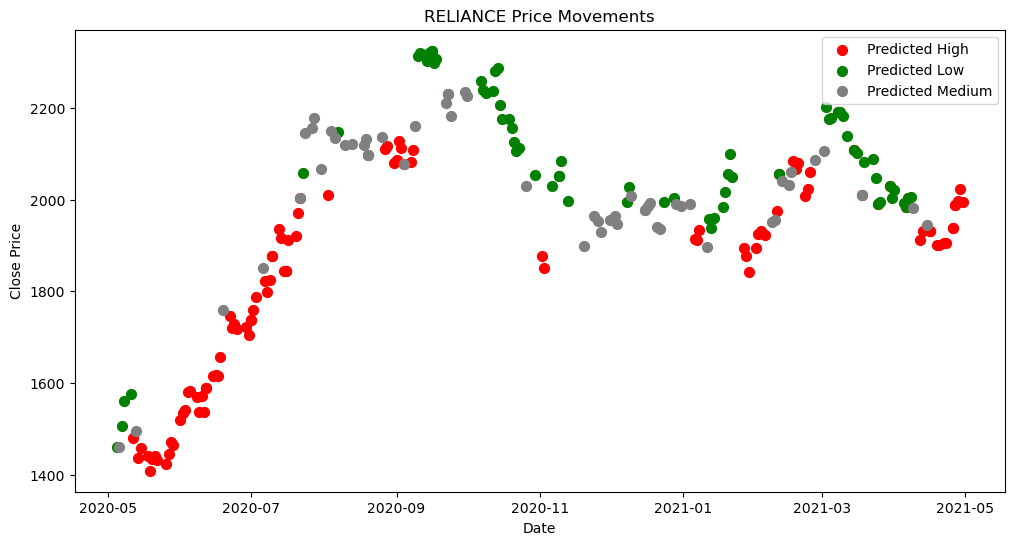

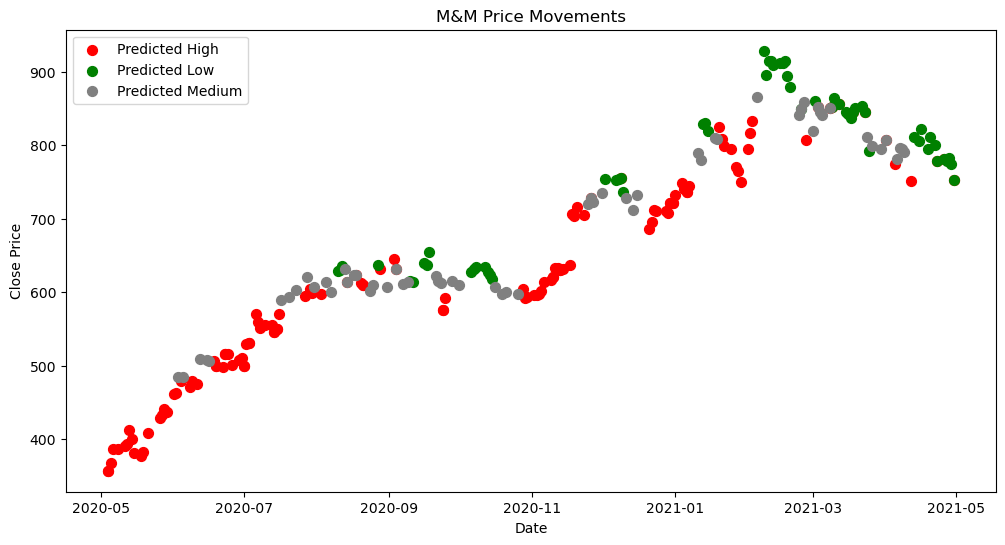

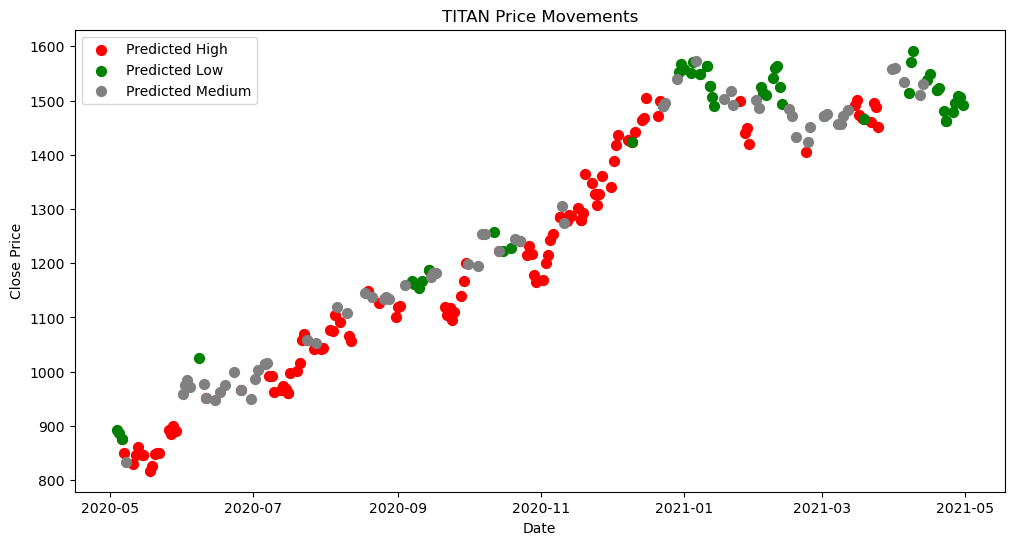

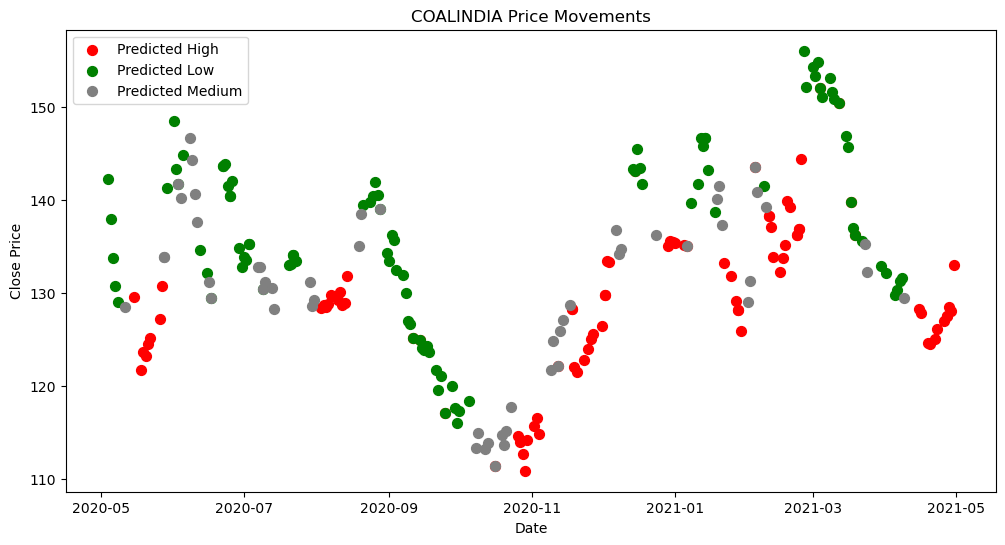

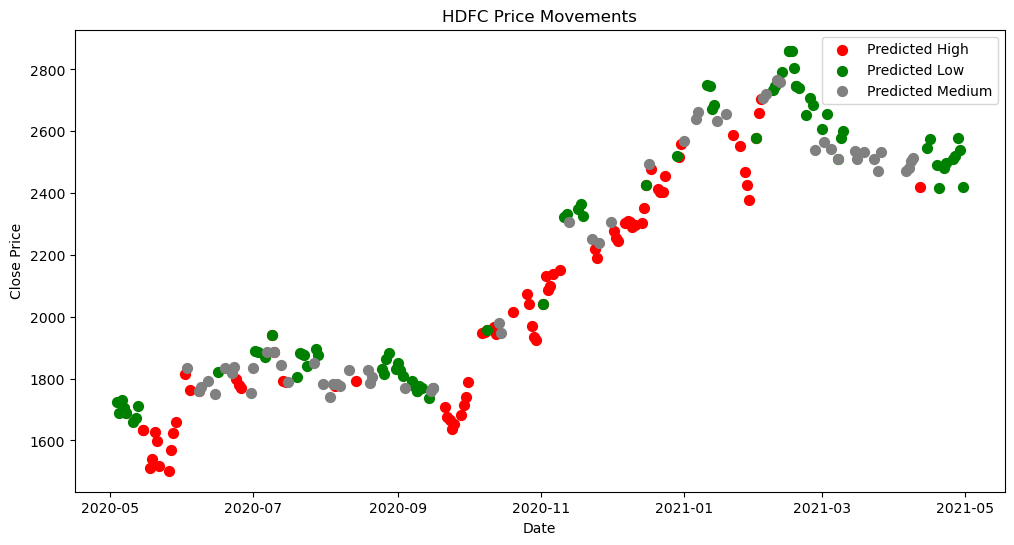

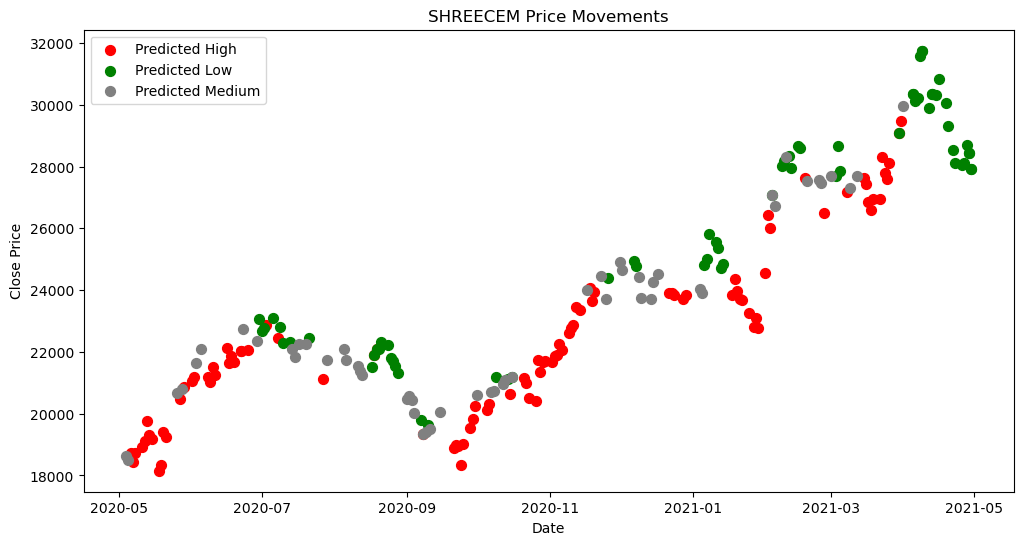

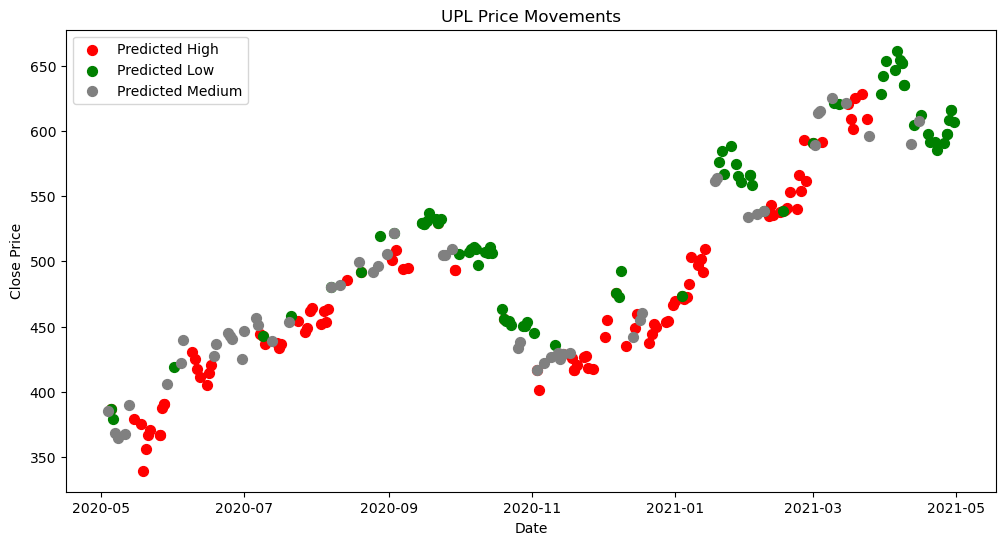

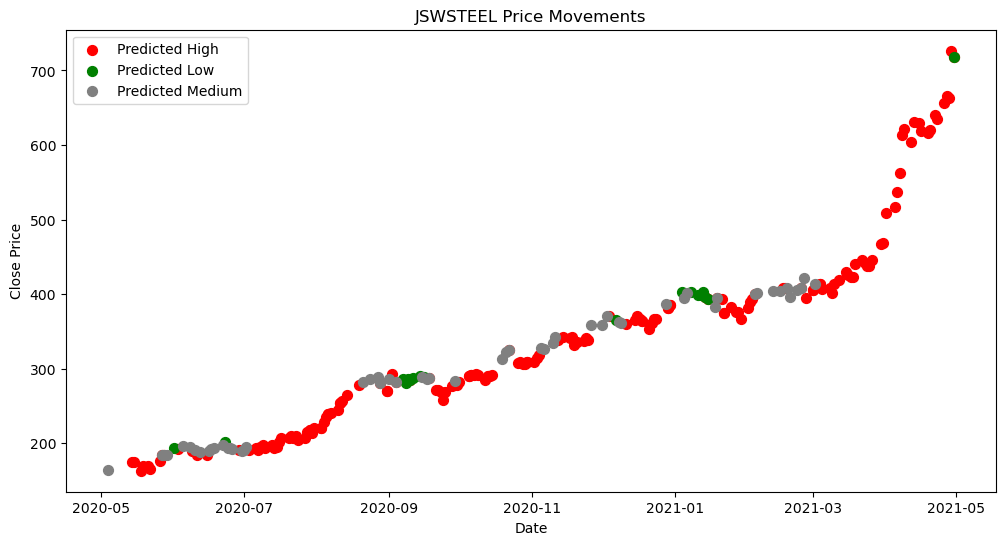

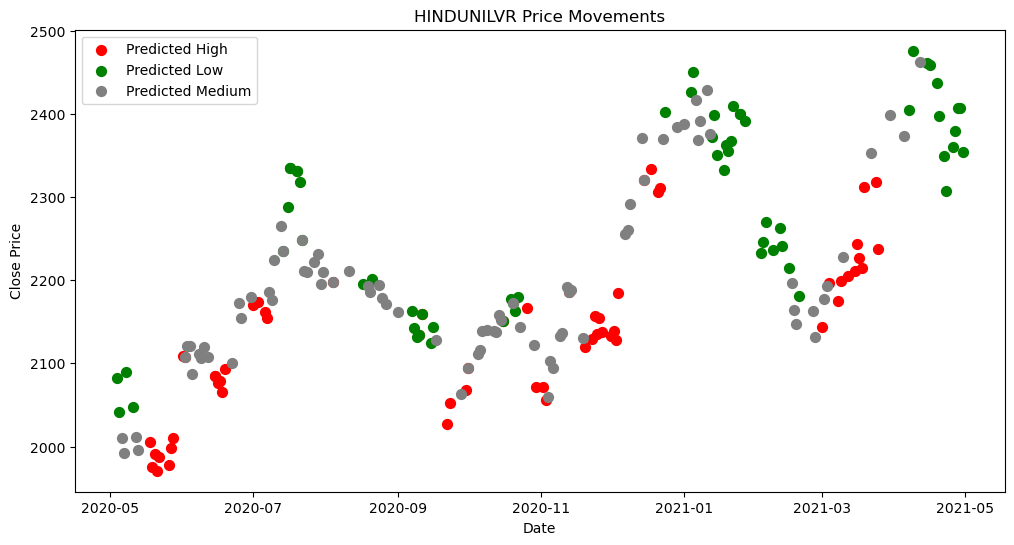

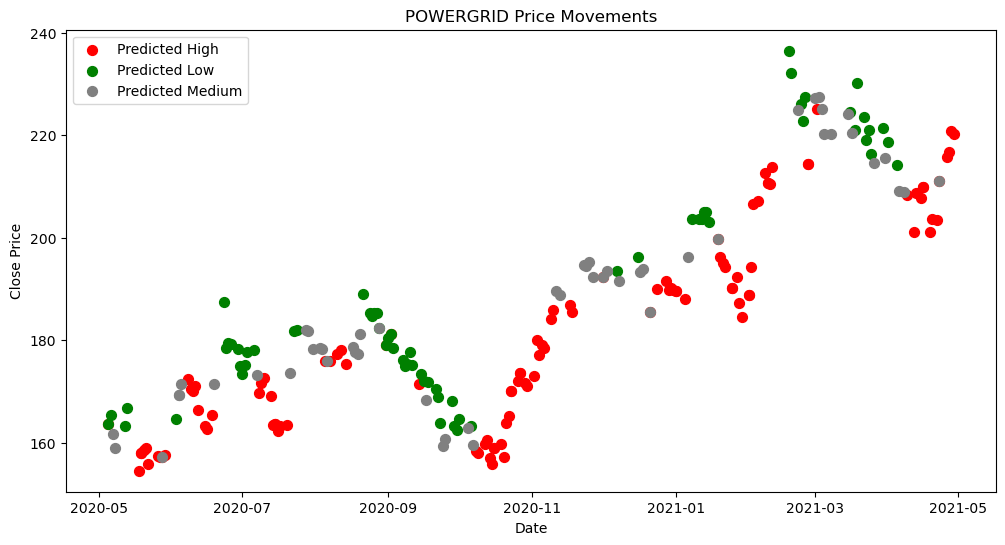

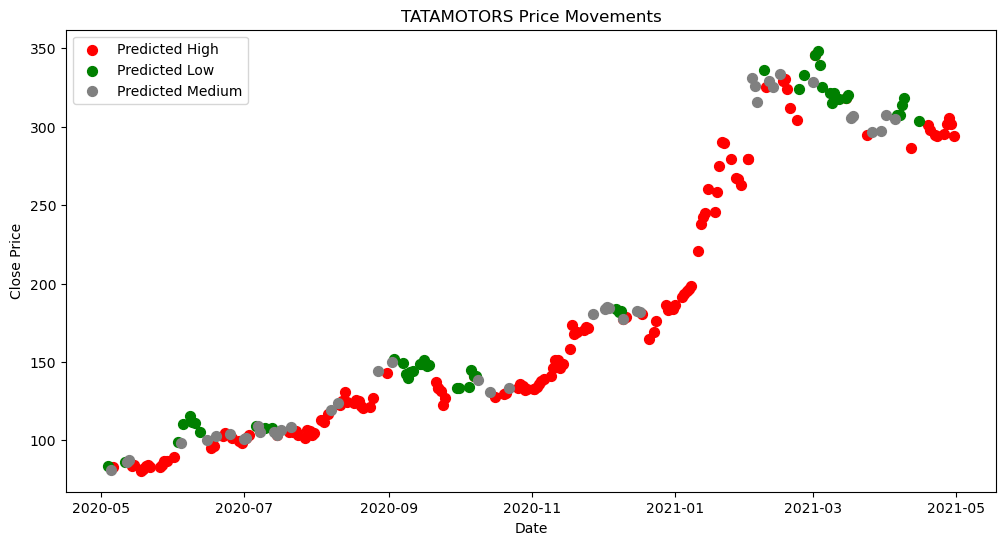

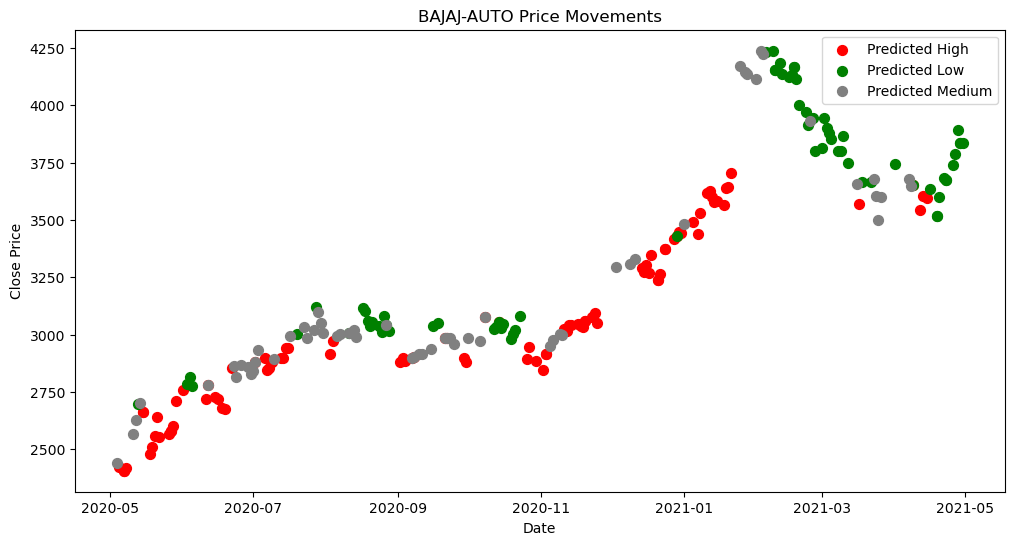

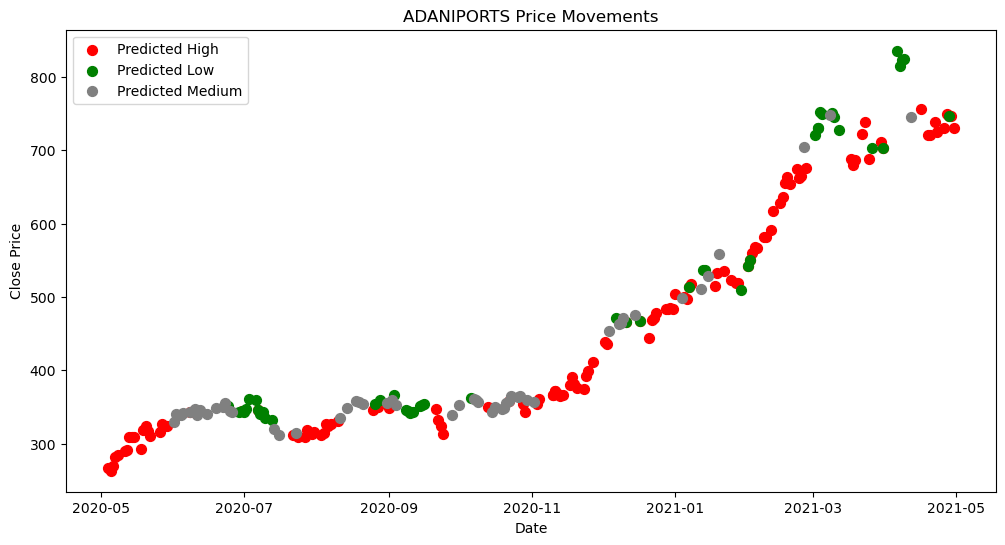

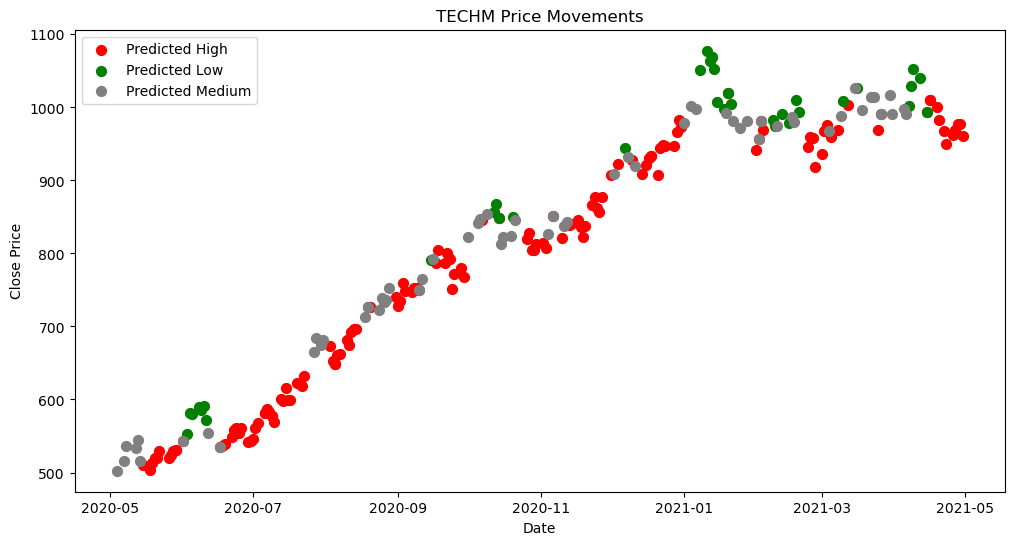

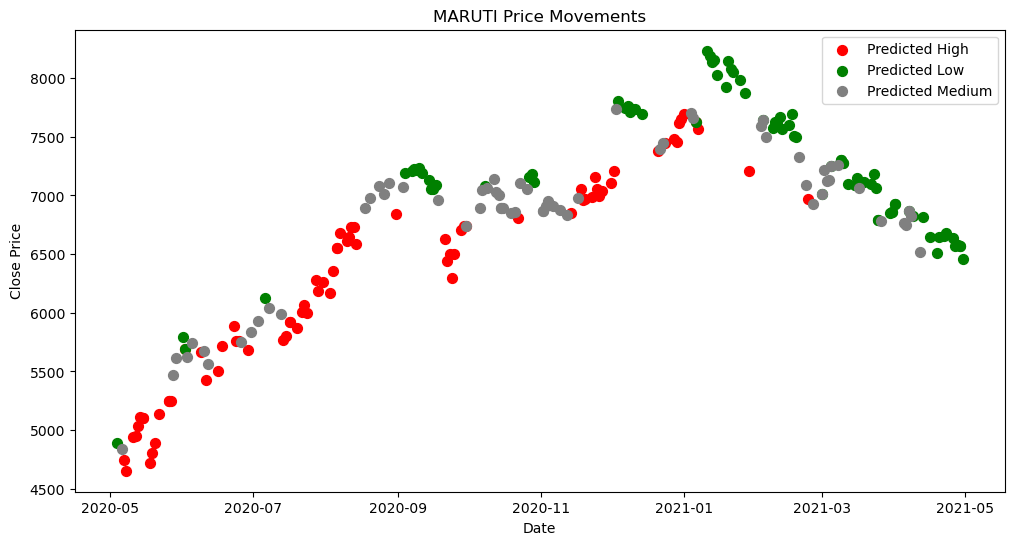

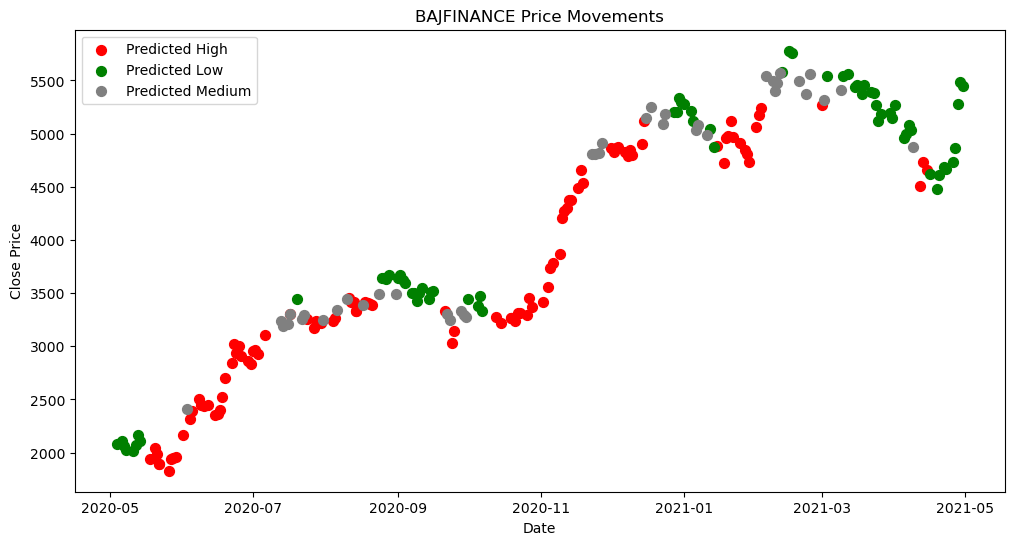

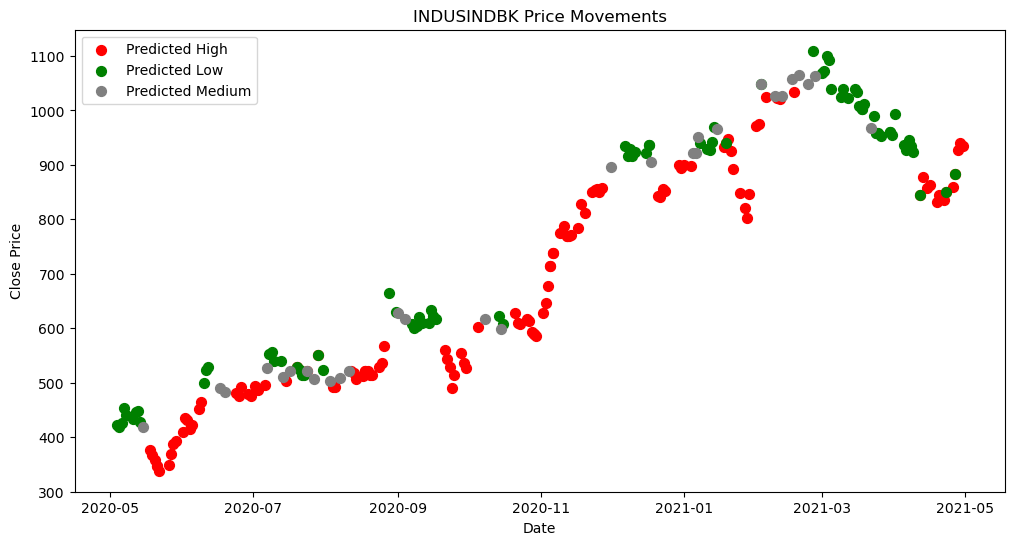

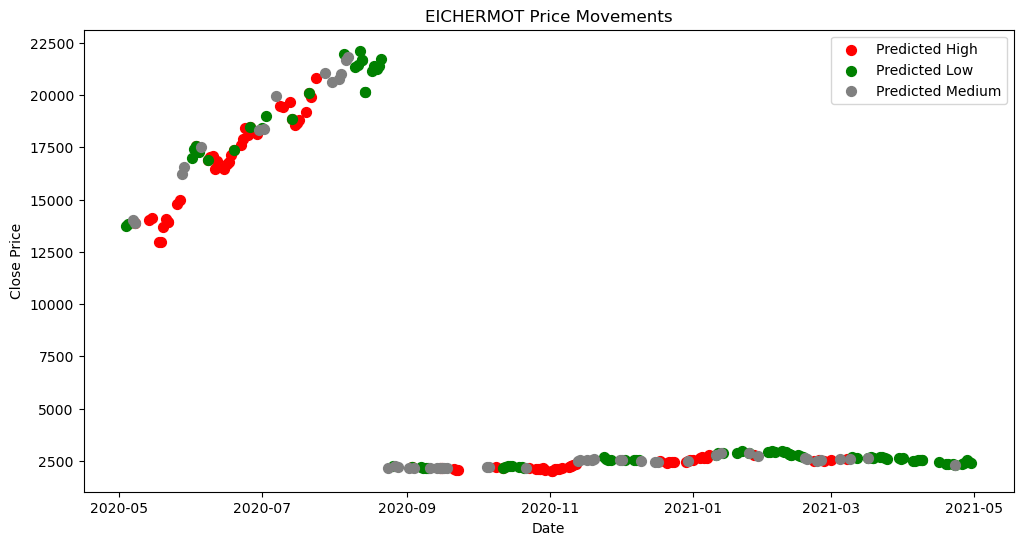

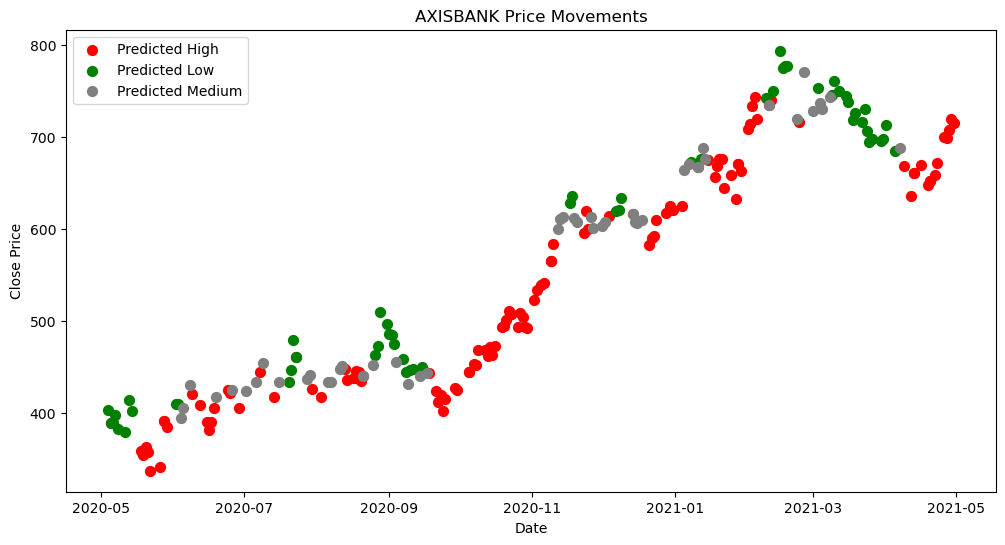

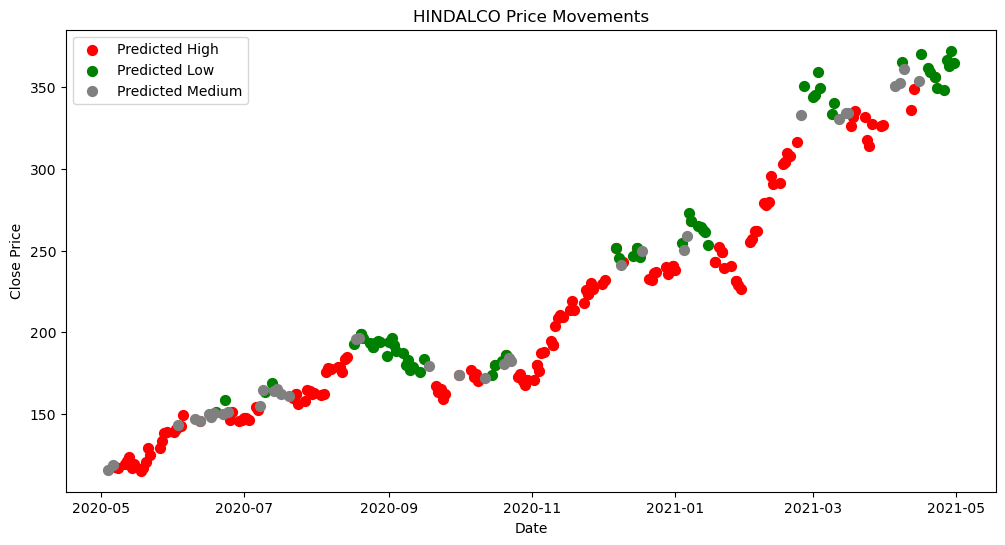

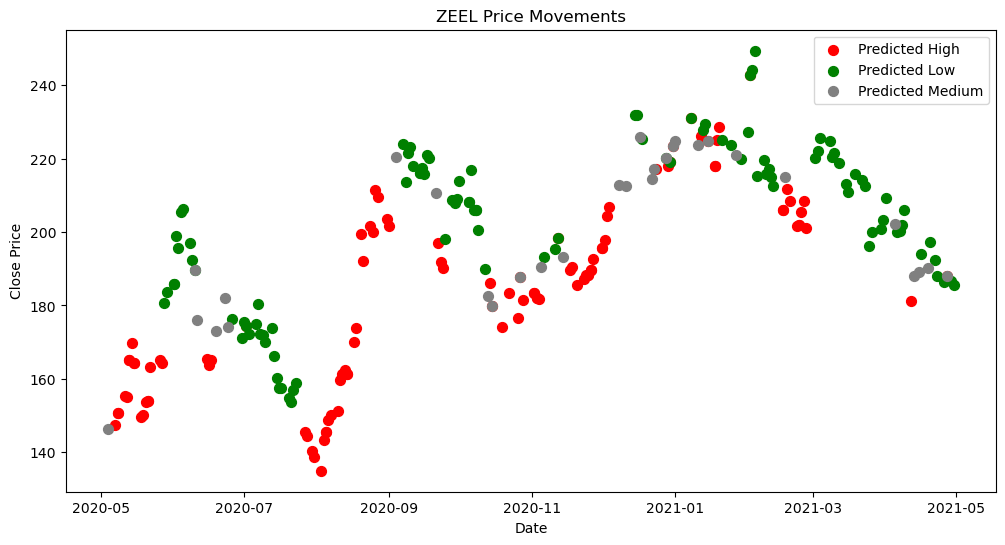

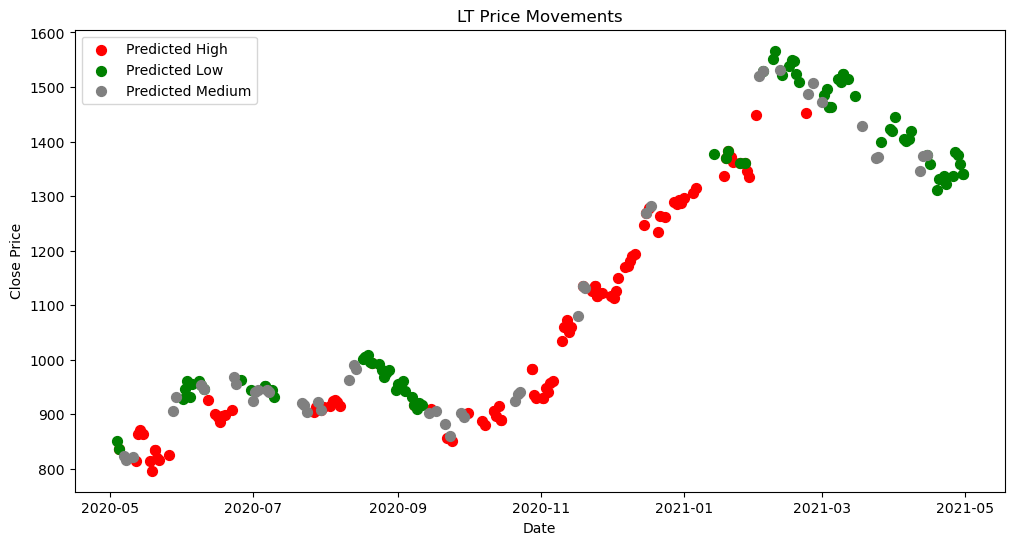

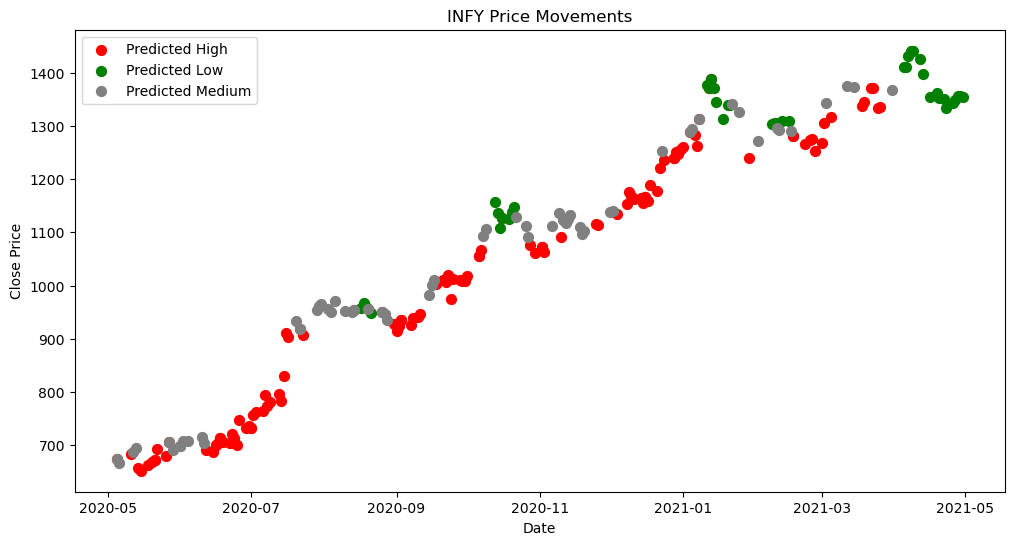

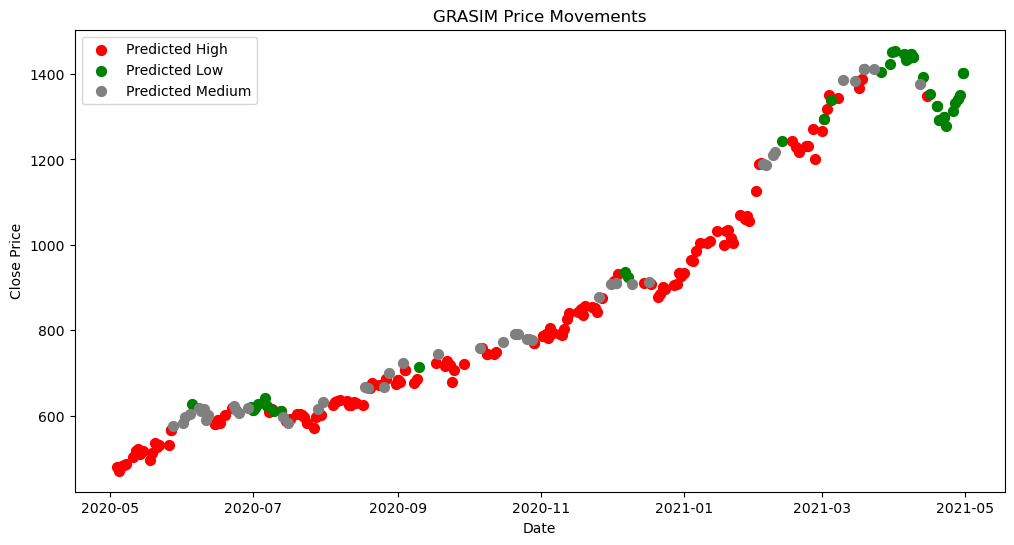

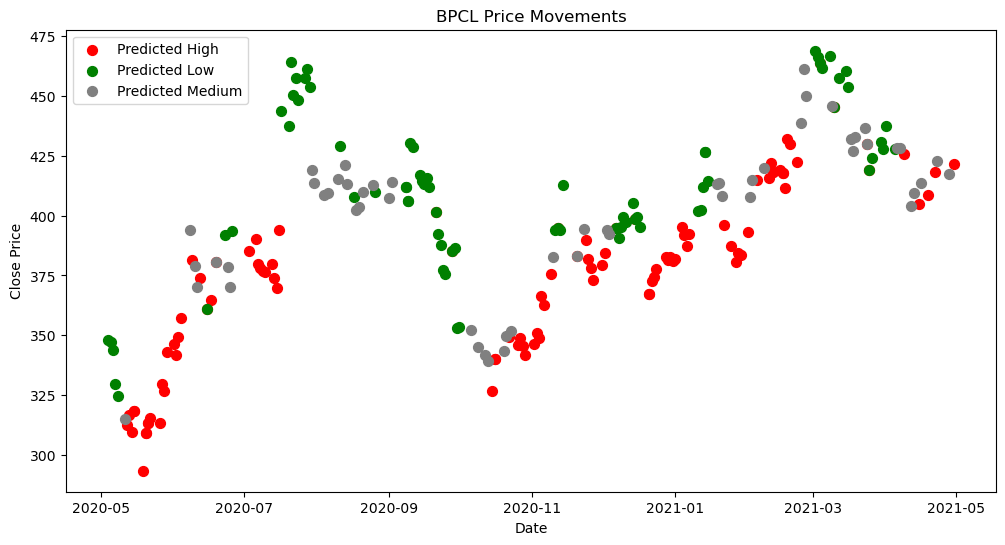

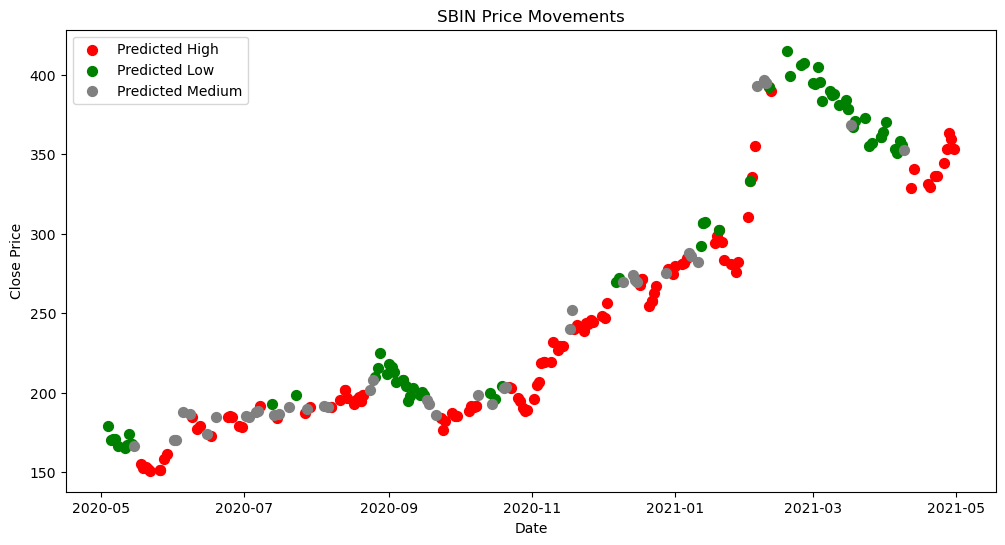

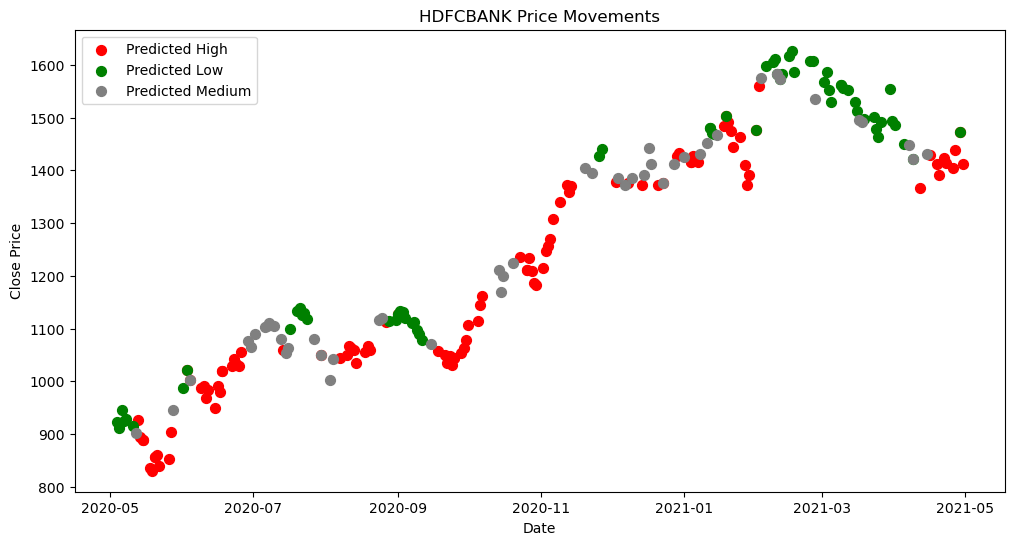

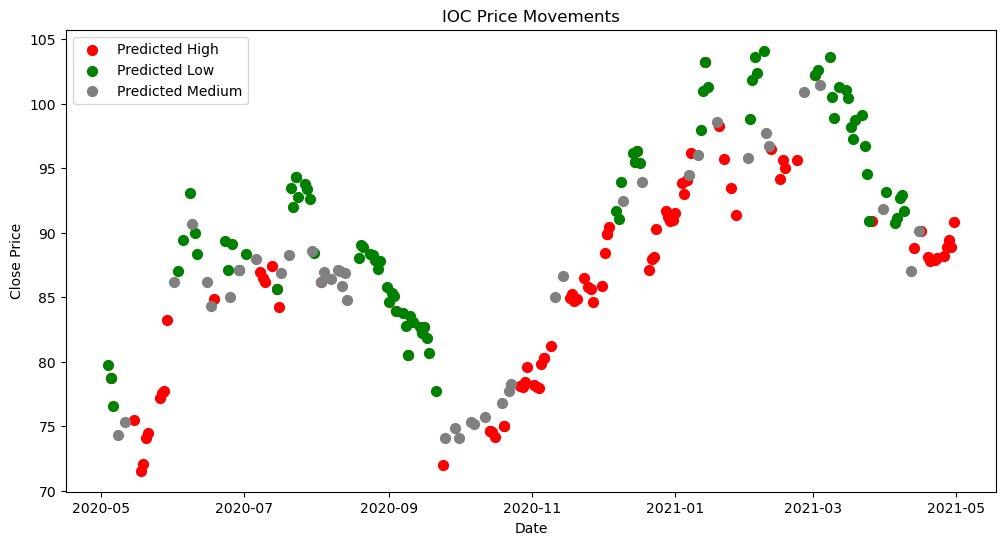

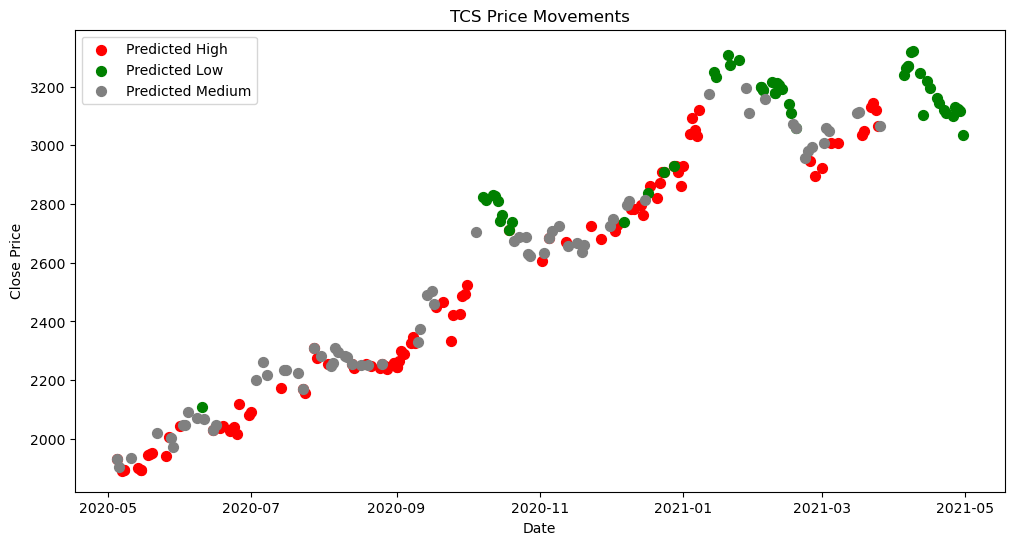

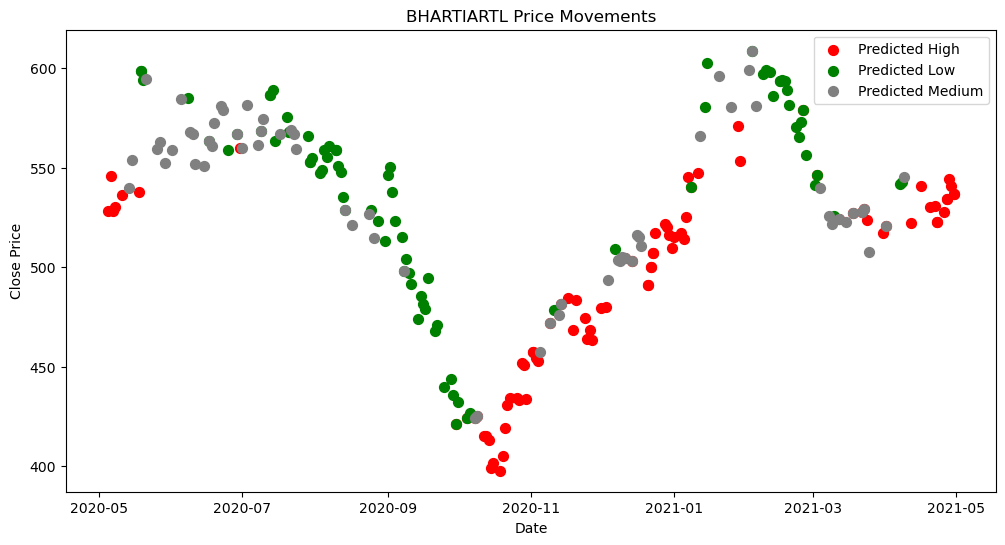

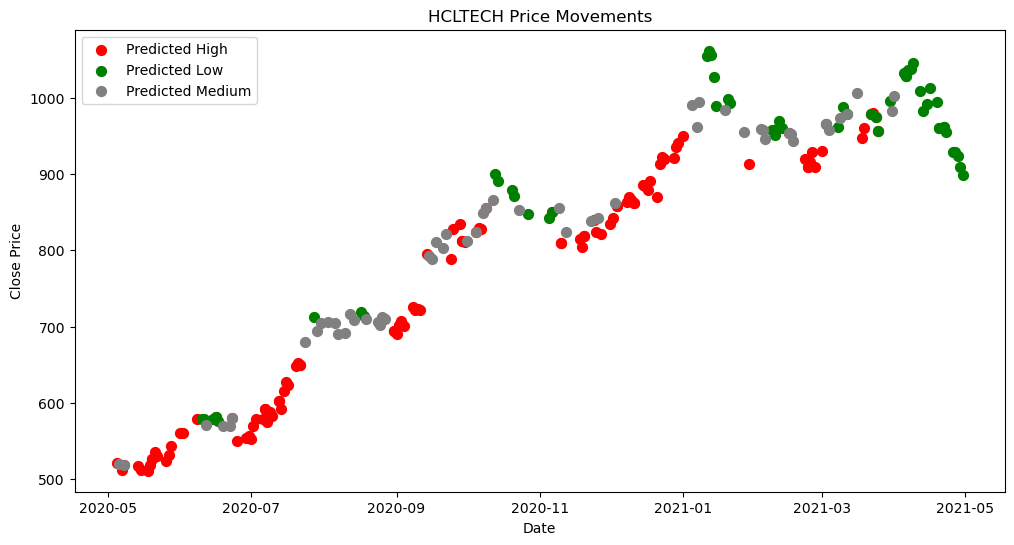

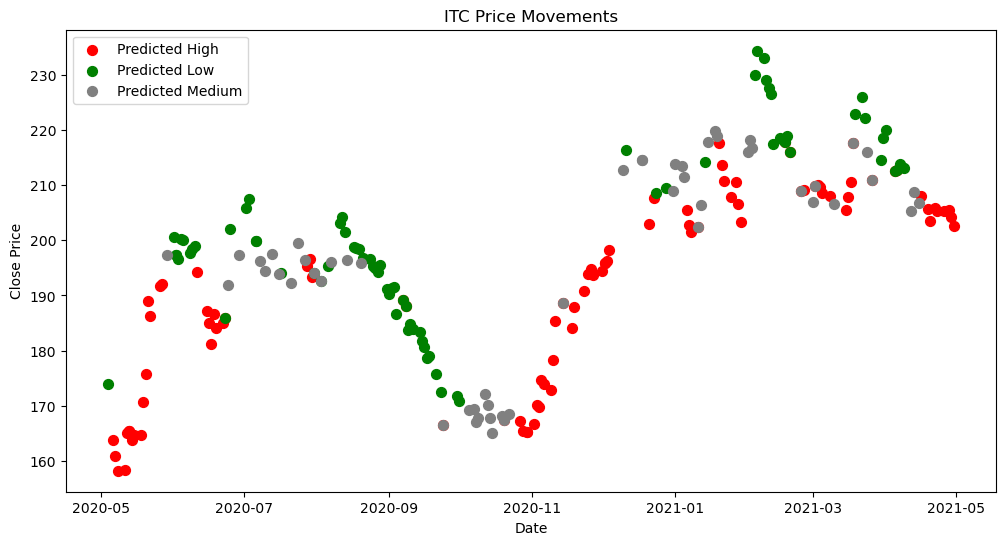

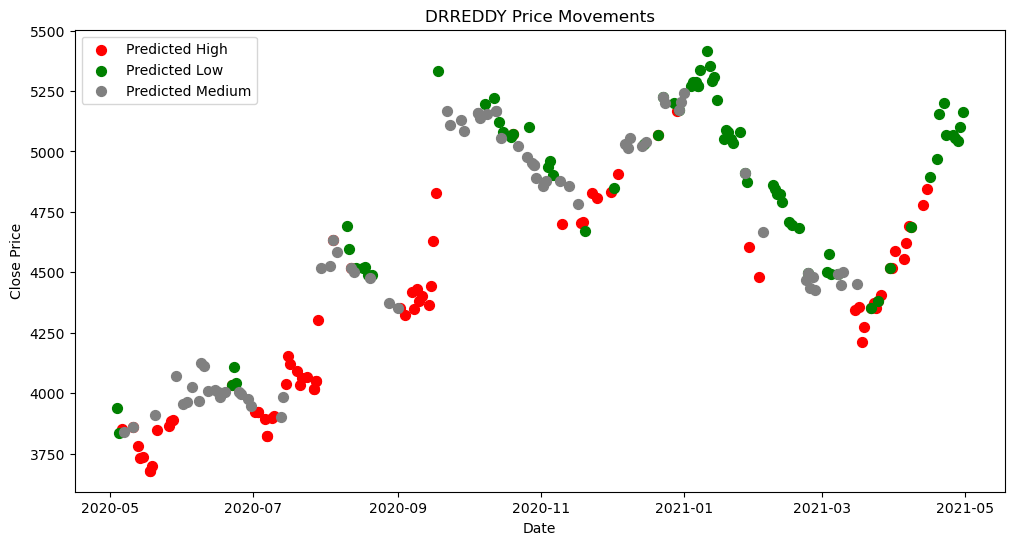

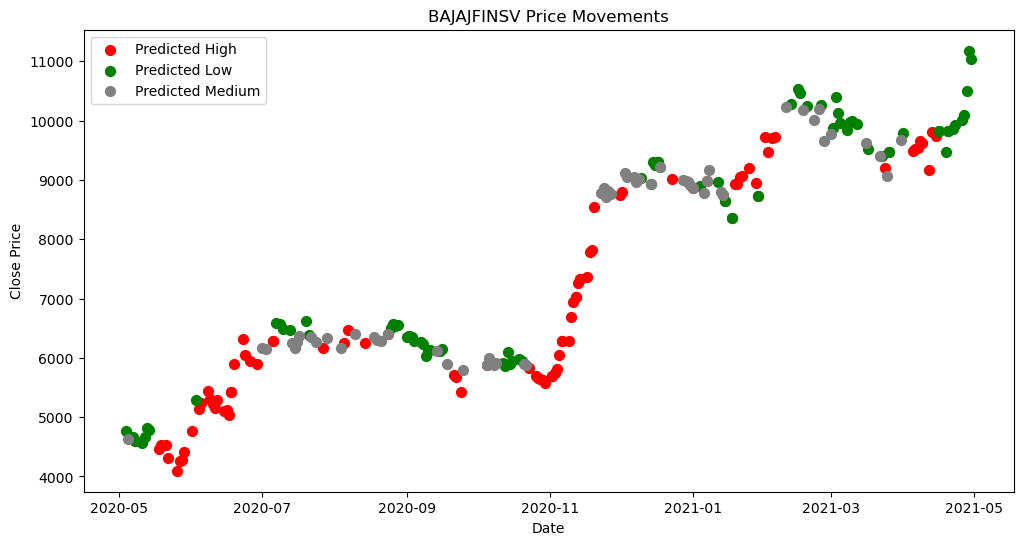

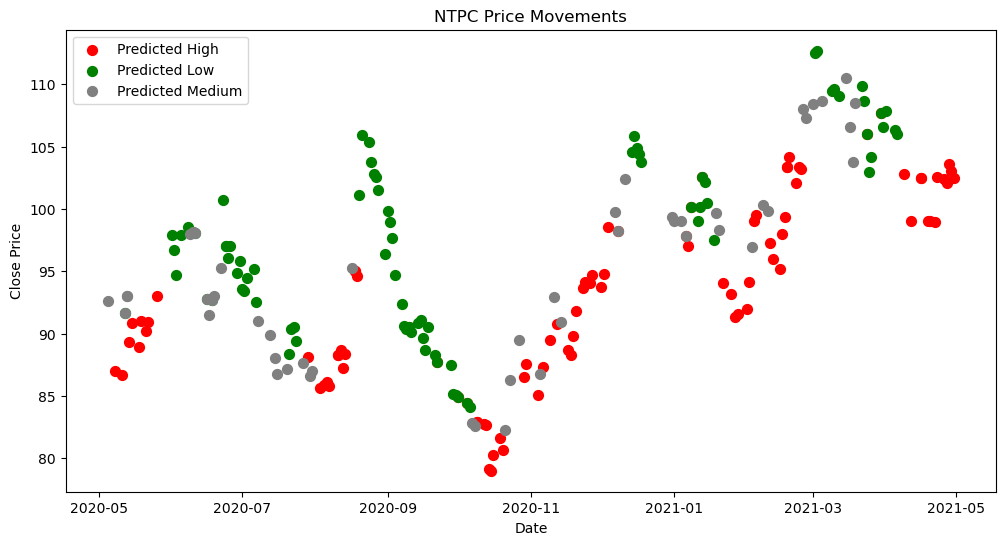

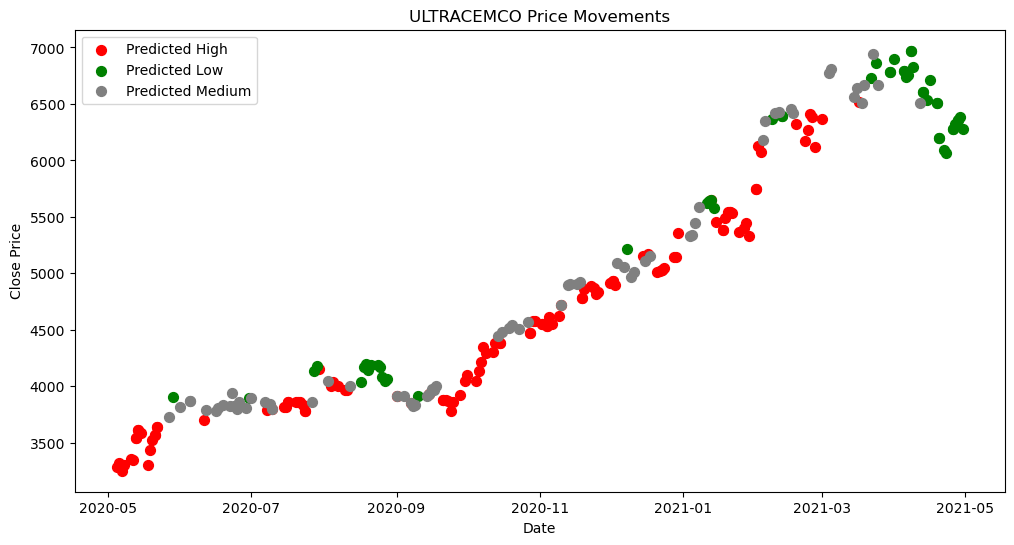

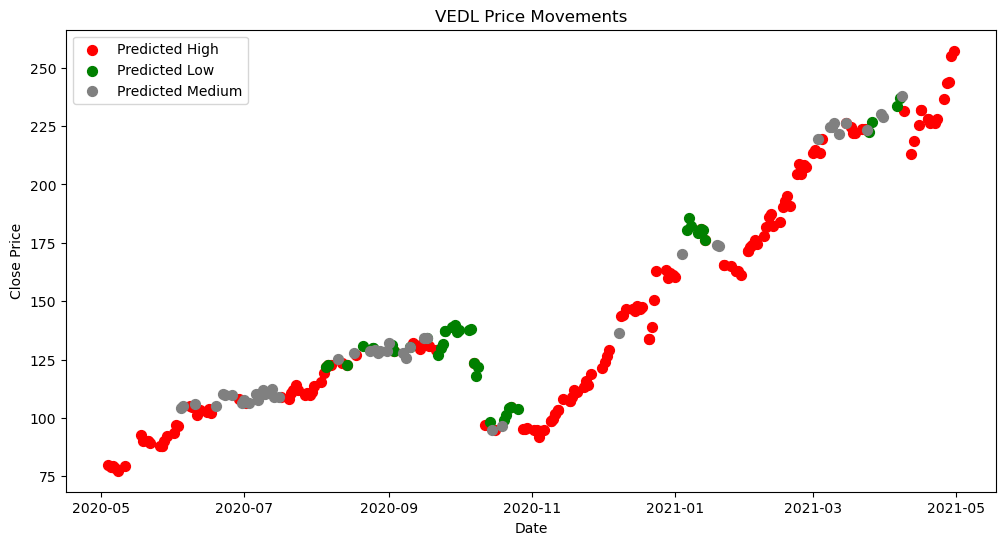

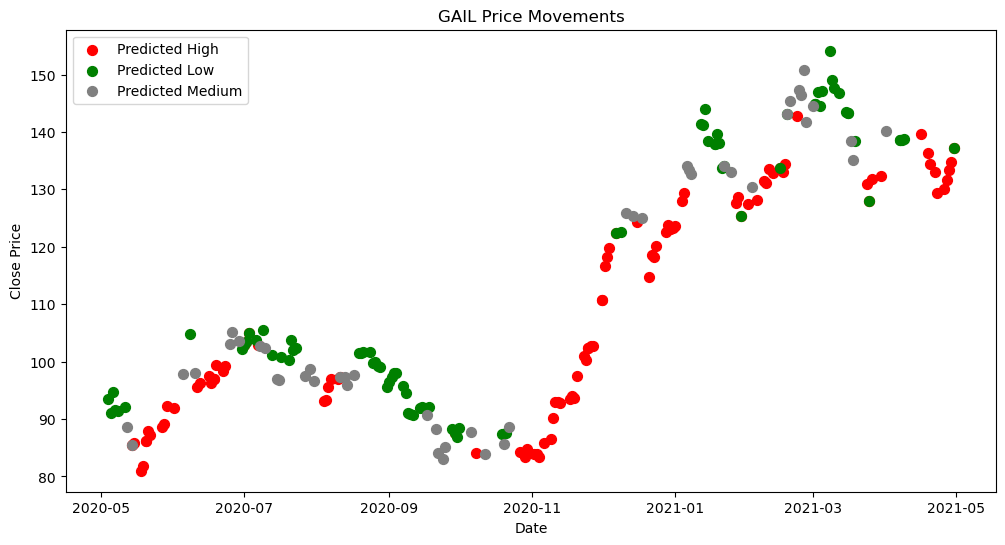

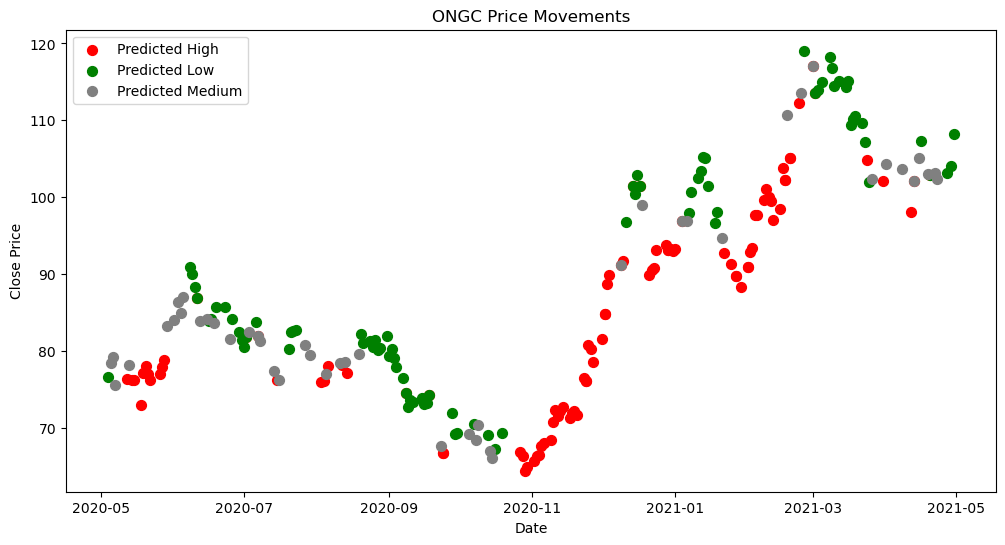

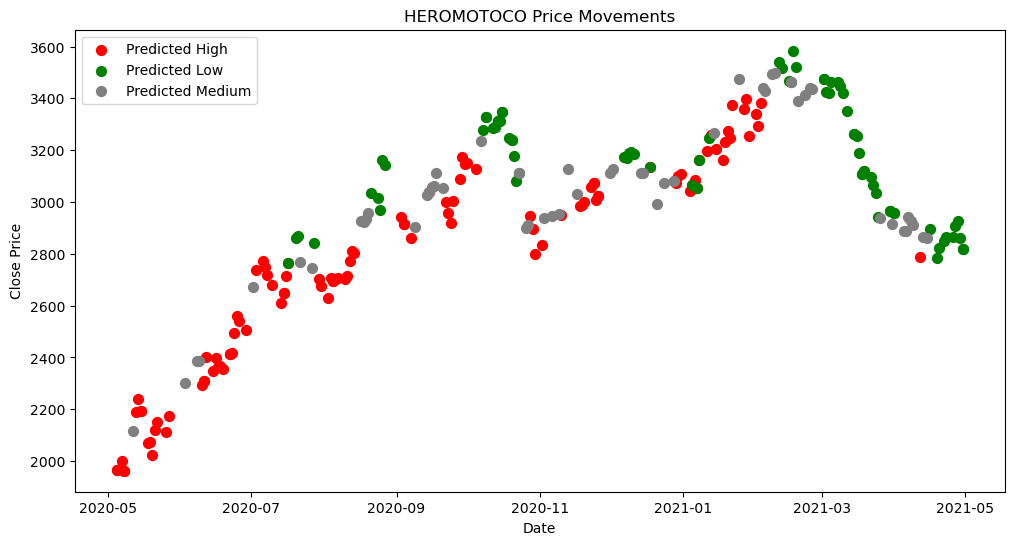

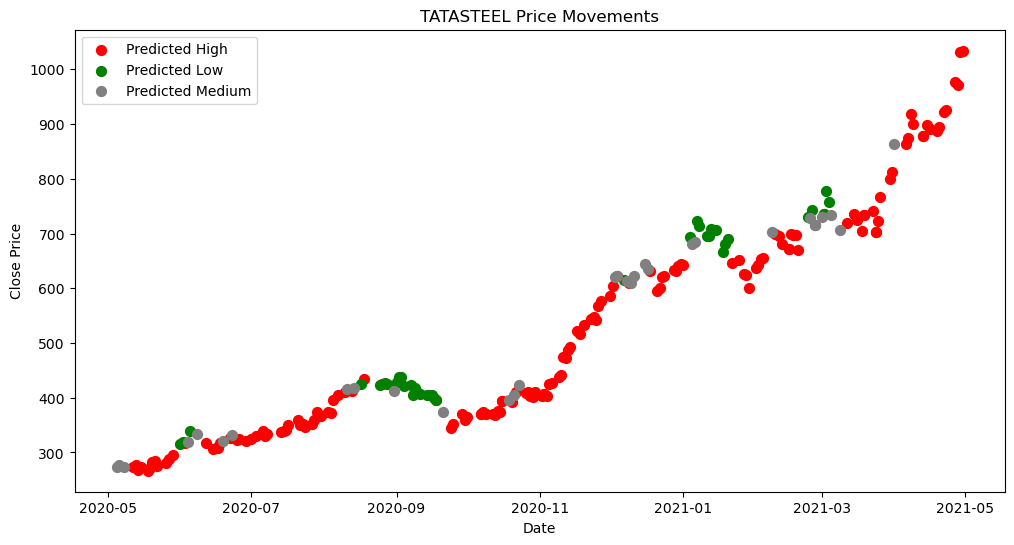

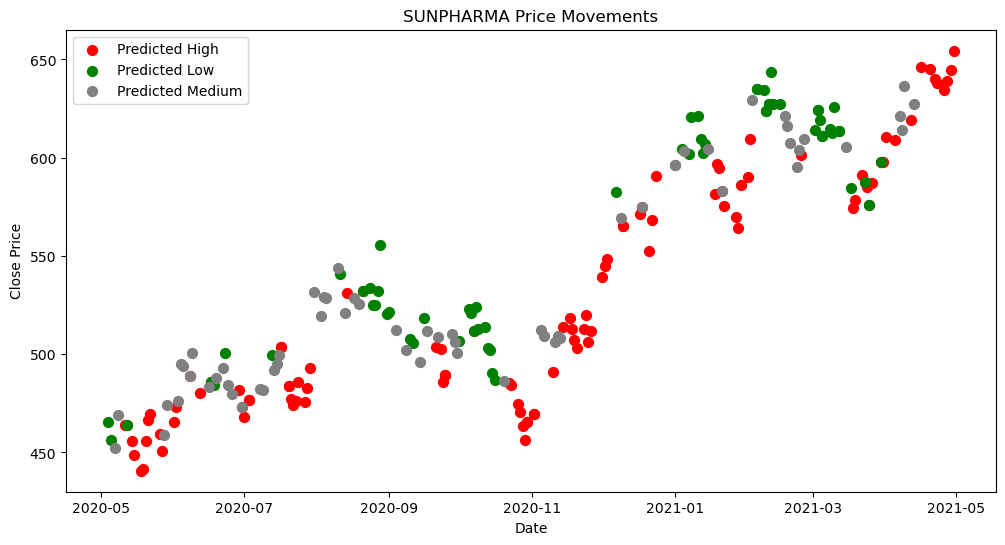

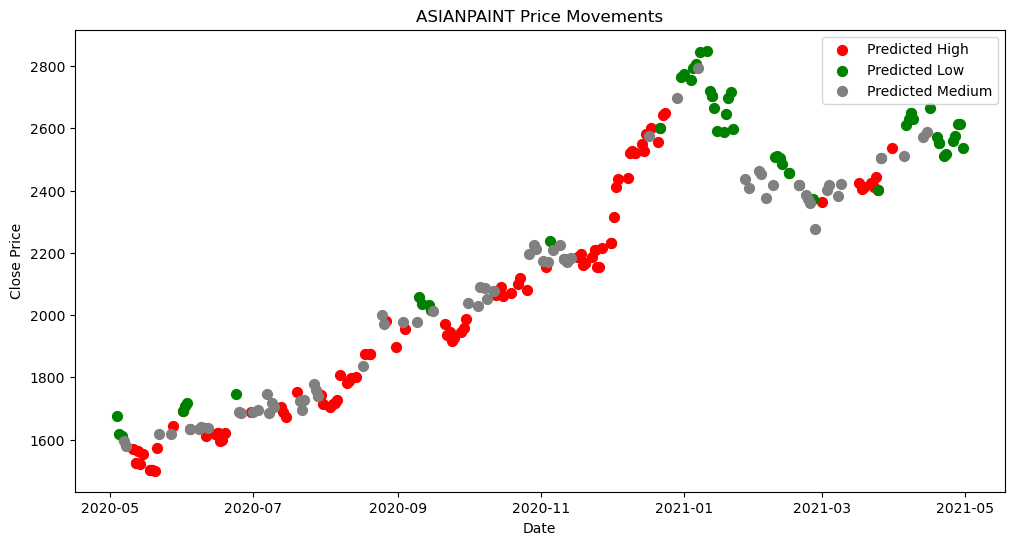

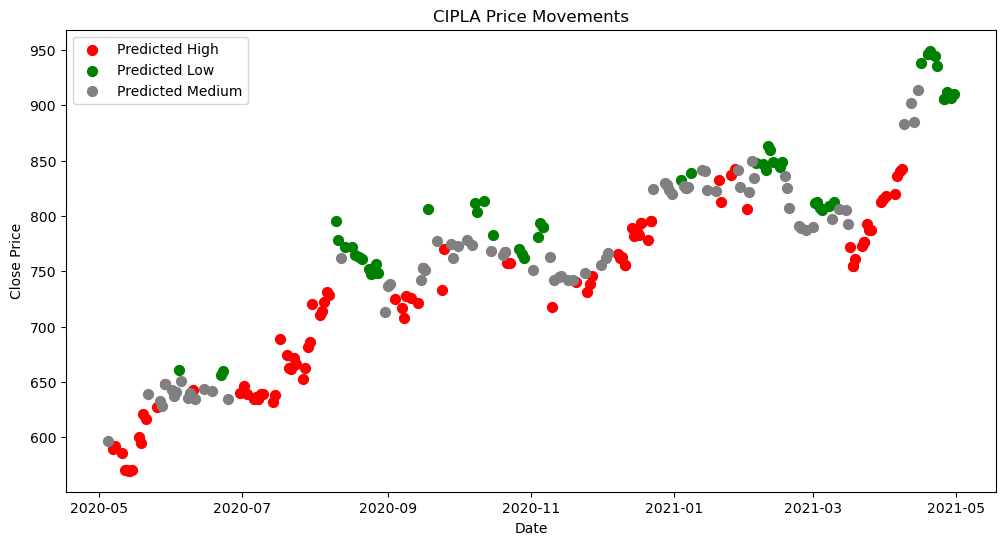

In [ ]:
def visualize_price_movements(dataset, predictions, title, classes):
    # Convert 'Date' to datetime if not already
    #dataset['Date'] = pd.to_datetime(dataset['Date'])

    # Filter data for the last one year
    one_year_ago = dataset['Date'].max() - pd.Timedelta(days=365)
    dataset = dataset[dataset['Date'] > one_year_ago]
    predictions = predictions[dataset.index]  # Ensure predictions align with the filtered data

    # Transform numeric predictions back to class labels
    class_predictions = classes[predictions]  # Direct use of the pre-fetched class names

    fig, ax = plt.subplots(figsize=(12, 6))
    color_map = {classes[i]: color for i, color in enumerate(['red', 'green', 'grey'])}  # Mapping classes to colors

    # Plot only the predictions as scatter points
    for class_name in np.unique(class_predictions):
        idx = np.where(class_predictions == class_name)[0]
        ax.scatter(dataset.iloc[idx]['Date'], dataset.iloc[idx]['Close'], c=color_map[class_name], label=f'Predicted {class_name}', s=50)

    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()
    plt.show()

# predictions are stored in 'Predicted_Movement' and already encoded numerically
data['Predicted_Movement'] = np.concatenate([y_pred_train, y_pred_test])  # Ensure you transform these if needed

# Visualize for each stock
for symbol in data['Symbol'].unique():
    symbol_data = data[data['Symbol'] == symbol]
    predictions = symbol_data['Predicted_Movement']
    visualize_price_movements(symbol_data, predictions, f"{symbol} Price Movements", classes)

In [ ]:
#clean_df['Daily_Return'] = clean_df['Close'].pct_change(fill_method=None)
#clean_df['MA7'] = clean_df['Close'].rolling(window=7).mean().shift(1)
#clean_df['MA30'] = clean_df['Close'].rolling(window=30).mean().shift(1)
#clean_df['Volatility'] = clean_df['Daily_Return'].rolling(window=30).std().shift(1)

## Testing model on completely new stock - Britannia

In [ ]:
data.Symbol.unique()

array(['ICICIBANK', 'WIPRO', 'KOTAKBANK', 'NESTLEIND', 'RELIANCE', 'M&M',
       'TITAN', 'COALINDIA', 'HDFC', 'SHREECEM', 'UPL', 'JSWSTEEL',
       'HINDUNILVR', 'POWERGRID', 'TATAMOTORS', 'BAJAJ-AUTO',
       'ADANIPORTS', 'TECHM', 'MARUTI', 'BAJFINANCE', 'INDUSINDBK',
       'EICHERMOT', 'AXISBANK', 'HINDALCO', 'ZEEL', 'LT', 'INFY',
       'GRASIM', 'BPCL', 'SBIN', 'HDFCBANK', 'IOC', 'TCS', 'BHARTIARTL',
       'HCLTECH', 'ITC', 'DRREDDY', 'BAJAJFINSV', 'NTPC', 'ULTRACEMCO',
       'VEDL', 'GAIL', 'ONGC', 'HEROMOTOCO', 'TATASTEEL', 'SUNPHARMA',
       'ASIANPAINT', 'CIPLA'], dtype=object)

In [ ]:
britannia_df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                float64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
Symbol_encoded          int64
Future_Close          float64
Price_Change_%        float64
Price_Movement         object
dtype: object

In [ ]:
britannia_df.Price_Movement.value_counts()

Price_Movement
Medium    1395
High       692
Low        511
Name: count, dtype: int64

             Date     Symbol Price_Movement Predicted (Original)
44     2010-11-04  BRITANNIA         Medium               Medium
71     2010-11-05  BRITANNIA            Low                  Low
140    2010-11-08  BRITANNIA            Low                  Low
187    2010-11-09  BRITANNIA            Low                  Low
216    2010-11-10  BRITANNIA            Low                  Low
...           ...        ...            ...                  ...
139187 2021-04-26  BRITANNIA            Low                  Low
139249 2021-04-27  BRITANNIA            Low                  Low
139317 2021-04-28  BRITANNIA            Low                  Low
139343 2021-04-29  BRITANNIA            Low                  Low
139430 2021-04-30  BRITANNIA            Low                  Low

[2598 rows x 4 columns]
Classification Report for Britania Stock Data:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       692
           1       0.97      1.00      

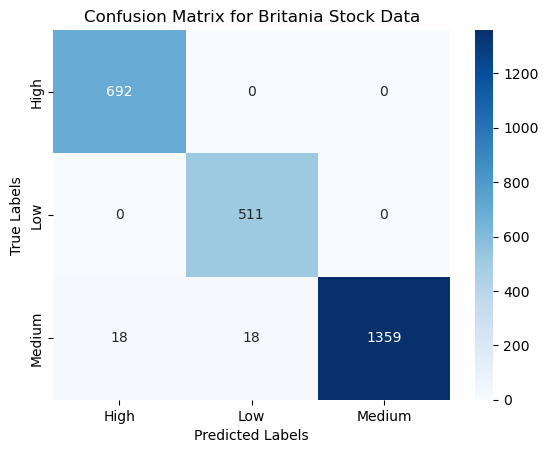

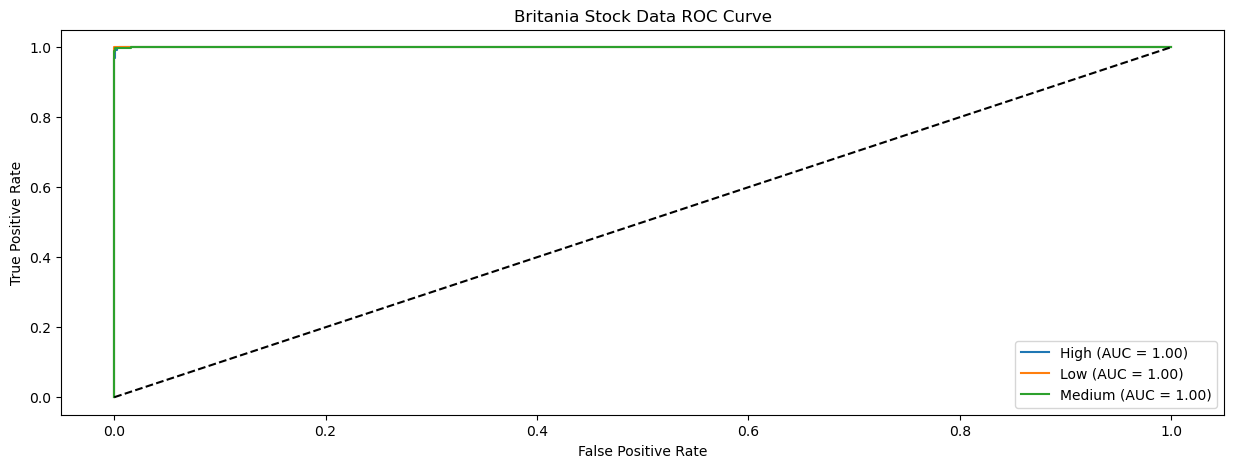

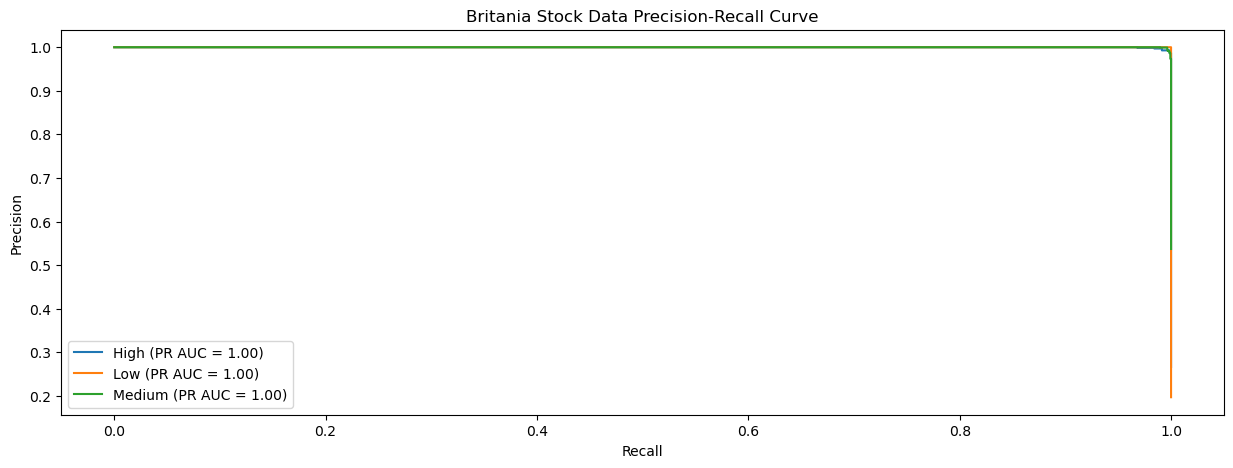

In [ ]:
# Preprocess the Britania data
britannia_df['Date'] = pd.to_datetime(britannia_df['Date'])  # Ensure Date is in datetime format
britannia_df.sort_values('Date', inplace=True)  # Sort by date if not already sorted

# Drop unnecessary columns and select numeric features
X_britannia = britannia_df.drop(columns=['Price_Movement', 'Symbol', 'Date'])
X_britannia = X_britannia.select_dtypes(include=[np.number])  # Select numeric columns

# Encode the target variable (if exists in the data)
if 'Price_Movement' in britannia_df.columns:
    y_britannia = britannia_df['Price_Movement']
    y_britannia_encoded = label_encoder.transform(y_britannia)  # Encode the target variable
else:
    y_britannia = None
    y_britannia_encoded = None

# Scale the features using the same scaler used for training data
X_britannia_scaled = scaler.transform(X_britannia)

# Predictions
y_britannia_pred = lr_model.predict(X_britannia_scaled)
y_britannia_pred_proba = lr_model.predict_proba(X_britannia_scaled)

# Add Actual vs Predicted Values to a DataFrame
if y_britannia_encoded is not None:
    britannia_results = britannia_df[['Date', 'Symbol', 'Price_Movement']].copy()
    britannia_results['Actual (Encoded)'] = y_britannia_encoded
    britannia_results['Predicted (Encoded)'] = y_britannia_pred
    britannia_results['Predicted (Original)'] = label_encoder.inverse_transform(y_britannia_pred)
    print(britannia_results[['Date', 'Symbol', 'Price_Movement', 'Predicted (Original)']])  # Show the first few rows of the DataFrame


    # Print classification report
    print("Classification Report for Britania Stock Data:")
    print(classification_report(y_britannia_encoded, y_britannia_pred))

    # Confusion Matrix
    plot_confusion_matrix(y_britannia_encoded, y_britannia_pred, "Confusion Matrix for Britania Stock Data")

    # ROC and PR Curves
    plot_roc_pr_curves(y_britannia_encoded, y_britannia_pred_proba, "Britania Stock Data", class_names)

# If ground truth is not available:
else:
    print("No ground truth (Price_Movement) available for Britania stock data.")
    britannia_results = britannia_df[['Date', 'Symbol']].copy()
    britannia_results['Predicted (Original)'] = label_encoder.inverse_transform(y_britannia_pred)
    print(britannia_results.head())  # Show the first few rows of the DataFrame

    # Save results to a CSV file (optional)
    britannia_results.to_csv('britannia_predictions_only.csv', index=False)



## Clustering K-means

In [ ]:
cluster_data = clean_df.copy()

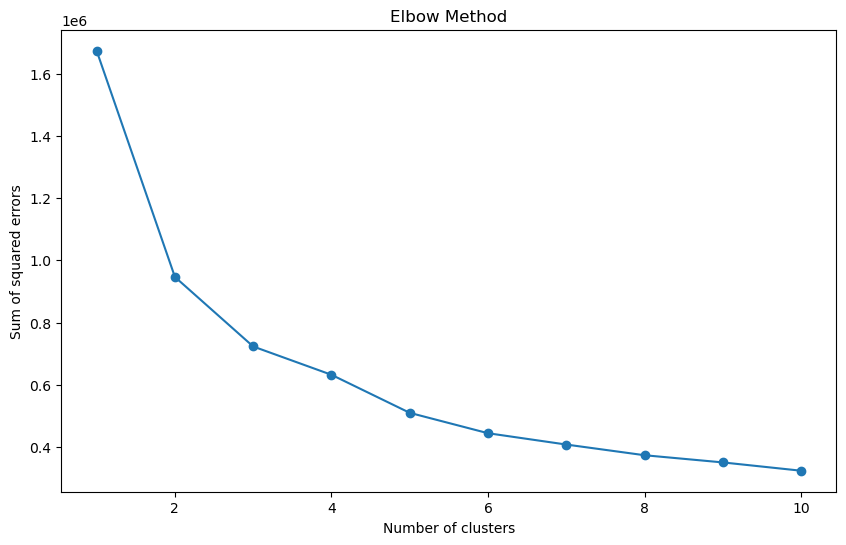

            Symbol  Cluster
0       BHARTIARTL        0
1       BHARTIARTL        0
2       BHARTIARTL        0
3       BHARTIARTL        0
4       BHARTIARTL        2
...            ...      ...
139444  BAJFINANCE        0
139445  BAJFINANCE        2
139446  BAJFINANCE        2
139447  BAJFINANCE        2
139448  BAJFINANCE        2

[139449 rows x 2 columns]


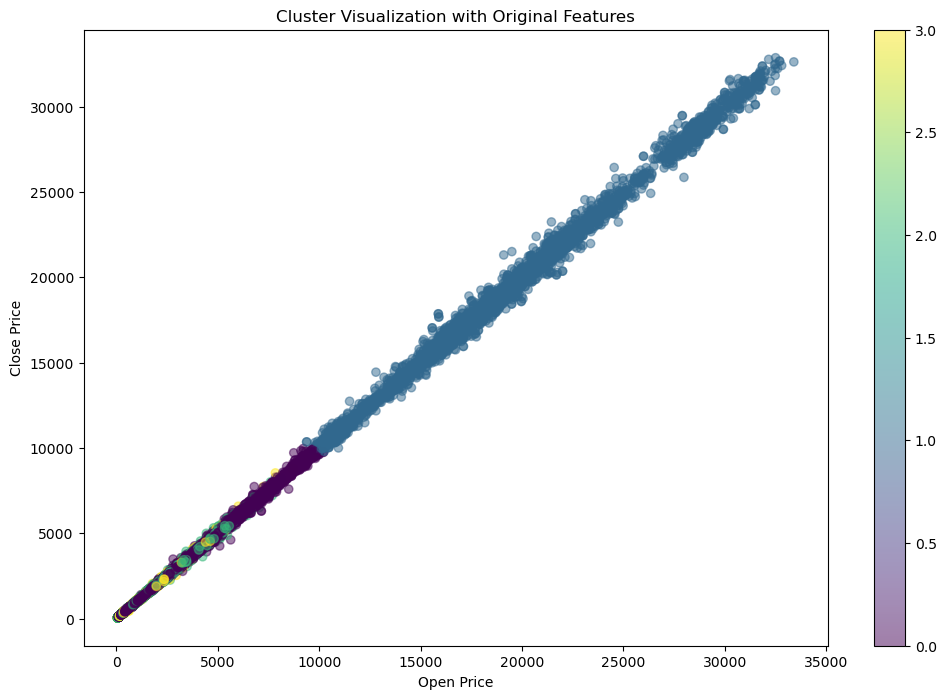

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Select features for clustering and ensure all are numeric
feature_columns = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
features = cluster_data[feature_columns]

# Handle missing values
features = features.dropna()

# Convert all columns to float type to avoid type errors
for col in feature_columns:
    features[col] = pd.to_numeric(features[col], errors='coerce')

# Handle any NaN values after conversion (if any)
features = features.dropna()

# Scale the features
scaler_kmeans = StandardScaler()
scaled_features = scaler_kmeans.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

# Fit K-means using the optimal number of clusters (e.g., 3)
optimal_k = 4  # Change this value based on your elbow plot result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels back to the original DataFrame
cluster_data['Cluster'] = cluster_labels

# Check types and convert if necessary before grouping
cluster_data[feature_columns] = cluster_data[feature_columns].apply(pd.to_numeric)


# Analyzing and displaying stocks in each cluster
print(cluster_data.groupby('Cluster'))  # Display average values for each cluster

# Optional: Display stocks with their cluster labels
print(cluster_data[['Symbol', 'Cluster']])

# Example: Plotting using 'Open' and 'Close' prices directly
plt.figure(figsize=(12, 8))
scatter = plt.scatter(cluster_data['Open'], cluster_data['Close'], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('Cluster Visualization with Original Features')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.colorbar(scatter)
plt.show()


In [ ]:
# Group stocks by clusters and display unique symbols
stocks_by_cluster = cluster_data.groupby('Cluster')['Symbol'].apply(lambda x: list(x.unique()))
print(stocks_by_cluster)

print(cluster_data.groupby('Cluster')['Symbol'].nunique())

Cluster
0    [BHARTIARTL, TATASTEEL, TITAN, M&M, COALINDIA,...
1    [NESTLEIND, BAJAJFINSV, BAJFINANCE, EICHERMOT,...
2    [BHARTIARTL, TATASTEEL, TITAN, M&M, COALINDIA,...
3    [BHARTIARTL, TATASTEEL, TITAN, M&M, COALINDIA,...
Name: Symbol, dtype: object
Cluster
0    49
1     5
2    47
3    45
Name: Symbol, dtype: int64


In [ ]:
# Analyze average values for each feature in clusters
cluster_summary = cluster_data.groupby('Cluster')[feature_columns].mean()
print(cluster_summary)

           Prev Close          Open          High           Low          Last  \
Cluster                                                                         
0         1513.129563   1514.490008   1532.579468   1495.246424   1513.249200   
1        18305.706587  18338.415666  18596.745345  18051.804254  18312.539548   
2          654.699958    655.385625    666.475486    643.954754    655.174754   
3          655.744202    651.797814    669.943922    636.423085    654.219674   

                Close          VWAP        Volume      Turnover  \
Cluster                                                           
0         1513.382931   1514.045459  1.466509e+06  1.212718e+14   
1        18318.225109  18320.587764  7.531836e+04  1.344910e+14   
2          655.158244    655.448350  8.999553e+06  3.995838e+14   
3          653.993302    653.684865  4.417797e+07  1.829753e+15   

                Trades  Deliverable Volume  %Deliverble  
Cluster                                             